In [2]:
from concurrent.futures import TimeoutError
from google.cloud import pubsub_v1

from collections import Counter
from collections import deque

import os
import json
import sys
import re
import time

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

import requests

In [3]:
MSGLIST = []

#project_id = 'stingray-295922'
#subscription_id = 'stringray-intelligence-dev' 
def callback(message: pubsub_v1.subscriber.message.Message) -> None:
    global MSGLIST

    data = message.data.decode()
    dict = json.loads(data)
    MSGLIST.append(dict)

    message.ack()
    
def word_count_hashtags(text):
    count_hashtags = Counter()
    for x in text:
        for hash_tag in re.findall('#(\w+)', x):
            count_hashtags[hash_tag.casefold()] += 1
    
    return count_hashtags

def preprocess(str):
    str = remove_forward(str)
    str = remove_url(str)
    str = remove_reply(str)
    
    return str

def remove_emojis(str):
    emojis = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    try:
        str = emojis.sub(r'', str)
        return str
    except:
        return str

def remove_forward(str):
    try:
        str = re.sub(r'//@.+?:', '', str)
        return str
    except:
        return str
    
def remove_url(str):
    try:
        str = re.sub(r"http\S+", '', str)
        return str
    except:
        return str

def remove_reply(str):
    try:
        str = re.sub(r'回复@.+?:', '', str)
        return str
    except:
        return str


In [4]:
def convert_counter_to_dict(counter):
    counterDict = {}
    for pair in list(counter):
        counterDict[pair[0]] = pair[1]
    
    return counterDict

def update_count(totalDict, newDict):
    for key in newDict:
        if key in totalDict:
            totalDict['key'] += newDict['key']
        else:
            totalDict['key'] = newDict['key'] 
    

In [5]:
def pull_count():
    
    global MSGLIST
    wordCounter = Counter()

    t = int(time.time()) + 30
    while (time.time() <= t): 
        
        textList = []
        subscriber = pubsub_v1.SubscriberClient()
        subscription_path = 'projects/stingray-295922/subscriptions/stingray-intelligence-dev'
        timeout = 1.5
        flow_control = pubsub_v1.types.FlowControl(max_messages=100)
        streaming_pull_future = subscriber.subscribe(subscription_path, callback=callback, flow_control=flow_control)

        with subscriber:
            try:
                streaming_pull_future.result(timeout=timeout)
            except TimeoutError:
                streaming_pull_future.cancel()  # Trigger the shutdown.
                streaming_pull_future.result()  # Block until the shutdown is complete.

        for msg in MSGLIST:
            if 'status' in msg['text'].keys():
                text = msg['text']['status']['text']
                text = preprocess(text)
                textList.append(text)
            elif 'comment' in msg['text'].keys():
                text = msg['text']['comment']['status']['text']
                text = preprocess(text)
                textList.append(text)

        wordCounter += word_count_hashtags(textList)
        
        MSGLIST = []
        textList = []
    
    return wordCounter

Initial: [('肖战', 134), ('刘雨昕这就是街舞5', 110), ('宋亚轩法国娇兰时代代言人', 91), ('微博视界大会', 90), ('宋亚轩', 89), ('肖战工作室', 60), ('刘雨昕法国希思黎睿秀护发品牌代言人', 54), ('成毅应渊帝君', 53), ('来袭', 53), ('into1新歌天上不会掉馅饼上线', 53), ('左航', 52), ('into1天上不会掉馅饼好魔性', 50), ('雷朋大中华区品牌代言人刘雨昕', 41), ('微光荣耀入围作品', 40), ('时代少年团周边中转站', 38), ('into1天上不会掉馅饼甩饼舞', 34), ('成毅沉香如屑', 31), ('肖战时影', 30), ('任嘉伦', 29), ('微光荣耀入围影视音乐', 28), ('刘宇0824生日快乐', 28), ('光遇陪玩', 26), ('左航zh', 25), ('santa', 25), ('多在干什么', 25), ('肖战玉骨遥', 24), ('鞠婧祎', 24), ('肖战bubly微笑趣泡代言人', 23), ('巴黎欧莱雅美发代言人杨洋', 22), ('微光荣耀入围人物', 22), ('每日一善', 22), ('沉香如屑', 17), ('微光荣耀推荐', 16), ('成毅', 16), ('朱志鑫', 15), ('天猫小黑盒', 14), ('jjy', 13), ('肖战肖春生', 13), ('时代少年团代言法国娇兰', 12), ('严浩翔', 12), ('刘耀文法国娇兰时代代言人', 12), ('热爱', 12), ('星汉灿烂', 11), ('你是我的荣耀开播一周年', 11), ('龚俊', 10), ('任嘉伦请君', 10), ('护肤双效我都要', 10), ('sky光遇', 9), ('肖战顾魏', 9), ('丁程鑫', 9)]

Initial: [('Xiao Zhan', 134), ('Liu Yuxin This is Street Dance 5', 110), ('Song Yaxuan French Jiao Lan era spokesperson', 91), ('Weibo Vision Conference',

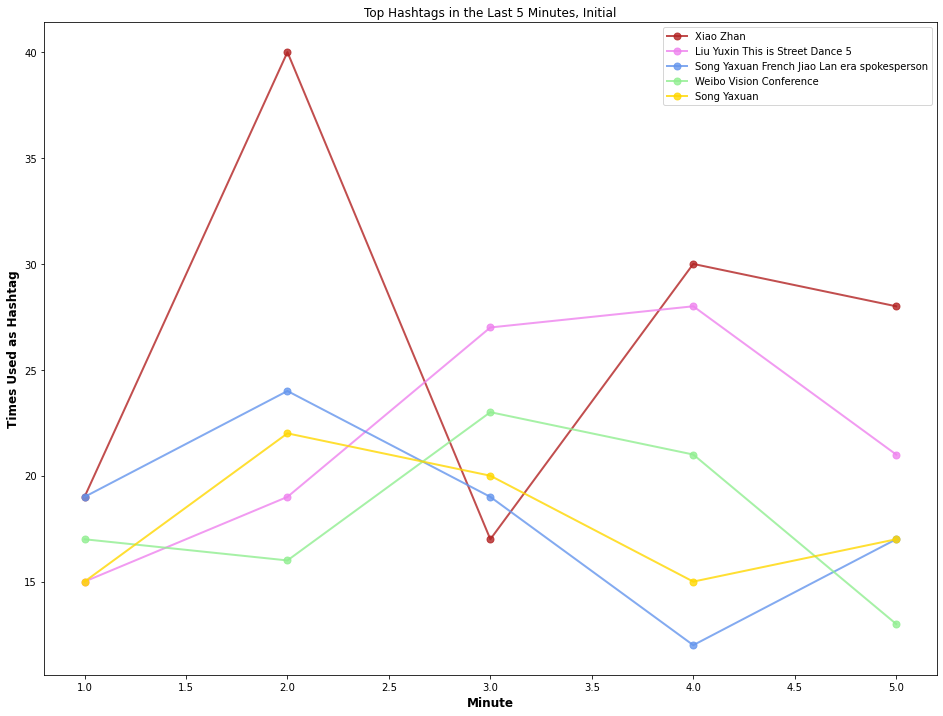

Update 1: [('肖战', 145), ('刘雨昕这就是街舞5', 110), ('微博视界大会', 97), ('宋亚轩', 97), ('宋亚轩法国娇兰时代代言人', 91), ('肖战工作室', 61), ('into1新歌天上不会掉馅饼上线', 55), ('来袭', 54), ('左航', 53), ('into1天上不会掉馅饼好魔性', 52), ('刘雨昕法国希思黎睿秀护发品牌代言人', 50), ('雷朋大中华区品牌代言人刘雨昕', 47), ('微光荣耀入围作品', 46), ('成毅应渊帝君', 45), ('时代少年团周边中转站', 36), ('into1天上不会掉馅饼甩饼舞', 35), ('肖战时影', 32), ('刘宇0824生日快乐', 31), ('任嘉伦', 30), ('每日一善', 29), ('肖战玉骨遥', 27), ('santa', 26), ('多在干什么', 26), ('成毅沉香如屑', 25), ('左航zh', 25), ('微光荣耀入围人物', 25), ('微光荣耀入围影视音乐', 23), ('沉香如屑', 23), ('朱志鑫', 20), ('肖战肖春生', 19), ('鞠婧祎', 18), ('光遇陪玩', 17), ('微光荣耀推荐', 17), ('肖战bubly微笑趣泡代言人', 16), ('成毅', 16), ('刘耀文法国娇兰时代代言人', 16), ('护肤双效我都要', 16), ('天猫小黑盒', 15), ('肖战梦中的那片海', 15), ('阳光信用', 15), ('巴黎欧莱雅美发代言人杨洋', 14), ('热烈round1贴片预告', 14), ('时代少年团代言法国娇兰', 13), ('countonlove倚爱之名', 13), ('严浩翔', 12), ('热爱', 12), ('张极', 12), ('星汉灿烂', 11), ('你是我的荣耀开播一周年', 11), ('xz', 11)]

Update 1: [('Xiao Zhan', 145), ('Liu Yuxin This is Street Dance 5', 110), ('Weibo Vision Conference', 97), ('Song Yaxuan', 97), (

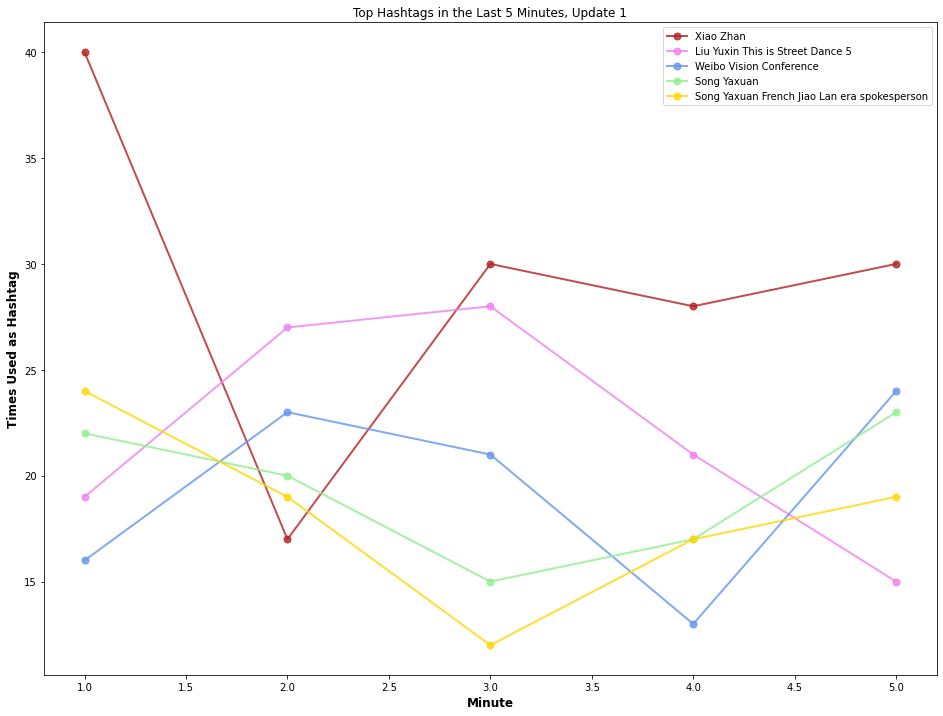

Update 2: [('肖战', 118), ('刘雨昕这就是街舞5', 110), ('微博视界大会', 100), ('宋亚轩', 88), ('宋亚轩法国娇兰时代代言人', 76), ('into1新歌天上不会掉馅饼上线', 70), ('into1天上不会掉馅饼好魔性', 68), ('刘雨昕法国希思黎睿秀护发品牌代言人', 59), ('左航', 57), ('来袭', 51), ('肖战工作室', 50), ('微光荣耀入围作品', 46), ('雷朋大中华区品牌代言人刘雨昕', 45), ('into1天上不会掉馅饼甩饼舞', 42), ('刘宇0824生日快乐', 42), ('成毅应渊帝君', 36), ('santa', 34), ('多在干什么', 34), ('时代少年团周边中转站', 31), ('任嘉伦', 31), ('左航zh', 27), ('微光荣耀入围影视音乐', 27), ('微光荣耀入围人物', 24), ('每日一善', 24), ('成毅沉香如屑', 23), ('巴黎欧莱雅美发代言人杨洋', 22), ('鞠婧祎', 22), ('天猫小黑盒', 22), ('微光荣耀推荐', 22), ('护肤双效我都要', 22), ('肖战玉骨遥', 20), ('肖战时影', 20), ('朱志鑫', 20), ('肖战肖春生', 19), ('肖战梦中的那片海', 19), ('沉香如屑', 19), ('countonlove倚爱之名', 19), ('时代少年团代言法国娇兰', 18), ('光遇陪玩', 16), ('肖战bubly微笑趣泡代言人', 16), ('你是我的荣耀开播一周年', 16), ('张极', 16), ('成毅', 15), ('自由释爱', 15), ('阳光信用', 15), ('热烈round1贴片预告', 14), ('严浩翔', 13), ('刘耀文法国娇兰时代代言人', 13), ('互评', 13), ('热爱', 12)]

Update 2: [('Xiao Zhan', 118), ('Liu Yuxin This is Street Dance 5', 110), ('Weibo Vision Conference', 100), ('Song Yaxuan', 88),

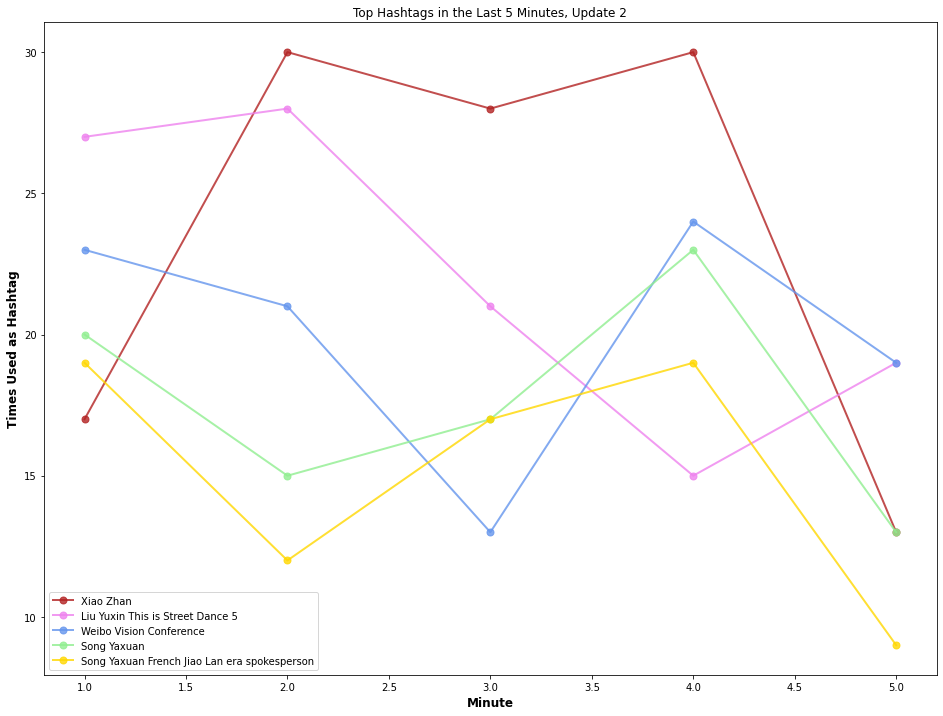

Update 3: [('肖战', 118), ('刘雨昕这就是街舞5', 96), ('微博视界大会', 90), ('宋亚轩', 86), ('宋亚轩法国娇兰时代代言人', 67), ('into1新歌天上不会掉馅饼上线', 65), ('into1天上不会掉馅饼好魔性', 64), ('肖战工作室', 51), ('刘宇0824生日快乐', 51), ('雷朋大中华区品牌代言人刘雨昕', 50), ('左航', 49), ('来袭', 44), ('微光荣耀入围作品', 43), ('into1天上不会掉馅饼甩饼舞', 42), ('刘雨昕法国希思黎睿秀护发品牌代言人', 40), ('时代少年团周边中转站', 34), ('santa', 30), ('多在干什么', 30), ('成毅应渊帝君', 29), ('任嘉伦', 28), ('肖战时影', 25), ('微光荣耀入围人物', 25), ('肖战肖春生', 25), ('护肤双效我都要', 24), ('热烈round1贴片预告', 23), ('肖战梦中的那片海', 23), ('左航zh', 21), ('天猫小黑盒', 21), ('光遇陪玩', 20), ('肖战玉骨遥', 20), ('微光荣耀入围影视音乐', 20), ('朱志鑫', 20), ('时代少年团代言法国娇兰', 19), ('成毅沉香如屑', 18), ('鞠婧祎', 18), ('每日一善', 18), ('严浩翔', 18), ('肖战bubly微笑趣泡代言人', 16), ('微光荣耀推荐', 16), ('你是我的荣耀开播一周年', 16), ('张极', 16), ('countonlove倚爱之名', 15), ('阳光信用', 15), ('巴黎欧莱雅美发代言人杨洋', 14), ('成毅', 13), ('刘耀文法国娇兰时代代言人', 13), ('互评', 13), ('自由释爱', 11), ('xz', 11), ('2022', 11)]

Update 3: [('Xiao Zhan', 118), ('Liu Yuxin This is Street Dance 5', 96), ('Weibo Vision Conference', 90), ('Song Yaxuan', 86), ('S

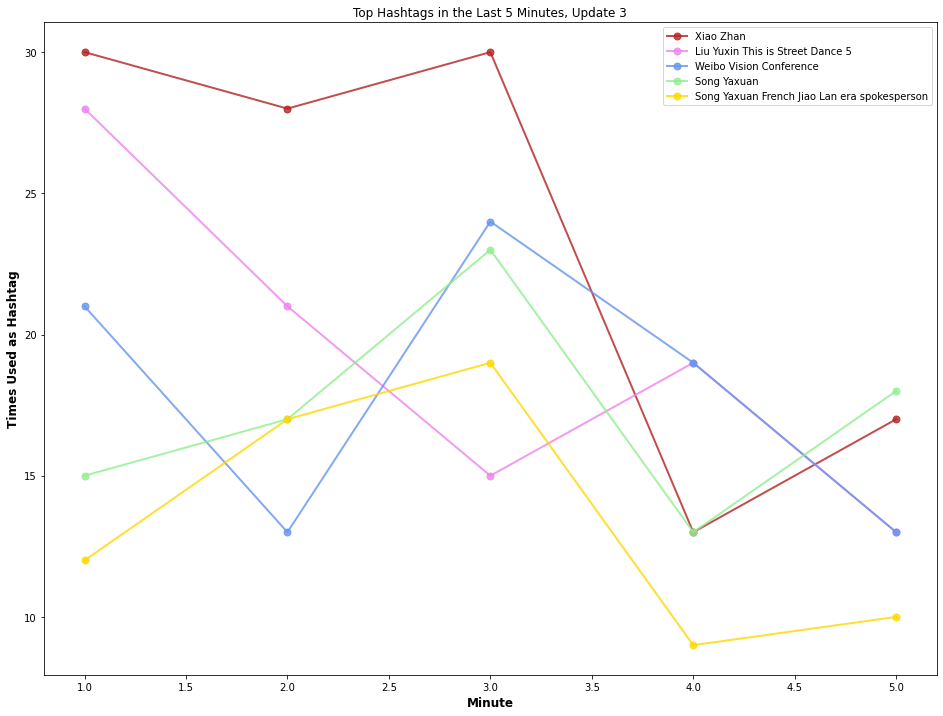

Update 4: [('肖战', 101), ('刘雨昕这就是街舞5', 95), ('宋亚轩', 94), ('微博视界大会', 89), ('宋亚轩法国娇兰时代代言人', 76), ('into1新歌天上不会掉馅饼上线', 64), ('into1天上不会掉馅饼好魔性', 64), ('雷朋大中华区品牌代言人刘雨昕', 56), ('刘宇0824生日快乐', 51), ('肖战工作室', 46), ('来袭', 45), ('微光荣耀入围作品', 42), ('into1天上不会掉馅饼甩饼舞', 40), ('成毅应渊帝君', 38), ('刘雨昕法国希思黎睿秀护发品牌代言人', 35), ('左航', 34), ('任嘉伦', 32), ('santa', 30), ('多在干什么', 30), ('肖战时影', 27), ('时代少年团周边中转站', 26), ('成毅沉香如屑', 25), ('光遇陪玩', 25), ('微光荣耀入围人物', 25), ('热烈round1贴片预告', 23), ('护肤双效我都要', 23), ('肖战玉骨遥', 21), ('鞠婧祎', 21), ('微光荣耀入围影视音乐', 20), ('肖战肖春生', 20), ('成毅', 20), ('肖战梦中的那片海', 19), ('严浩翔', 18), ('天猫小黑盒', 17), ('朱志鑫', 16), ('张极', 16), ('时代少年团代言法国娇兰', 15), ('countonlove倚爱之名', 15), ('微光荣耀推荐', 14), ('每日一善', 14), ('你是我的荣耀开播一周年', 14), ('左航zh', 13), ('任嘉伦请君', 13), ('当代年轻人矛盾的日常', 12), ('肖战bubly微笑趣泡代言人', 11), ('自由释爱', 11), ('阳光信用', 11), ('xz', 11), ('马嘉祺', 11), ('2022', 11)]

Update 4: [('Xiao Zhan', 101), ('Liu Yuxin This is Street Dance 5', 95), ('Song Yaxuan', 94), ('Weibo Vision Conference', 89), ('Song Yaxu

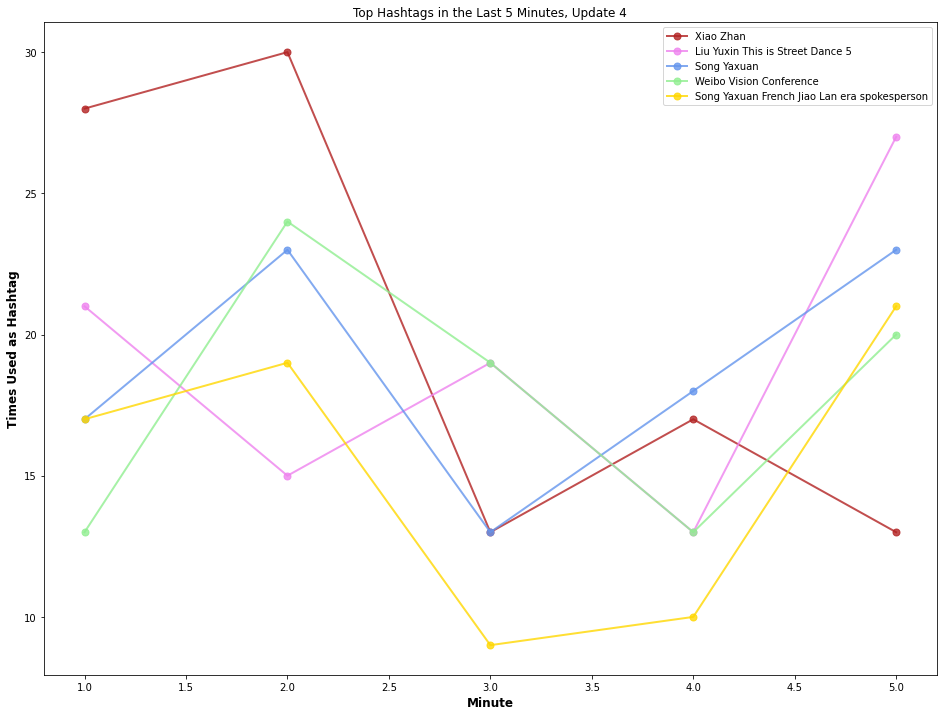

Update 5: [('刘雨昕这就是街舞5', 99), ('宋亚轩', 98), ('肖战', 97), ('微博视界大会', 93), ('宋亚轩法国娇兰时代代言人', 80), ('into1新歌天上不会掉馅饼上线', 68), ('into1天上不会掉馅饼好魔性', 68), ('雷朋大中华区品牌代言人刘雨昕', 54), ('来袭', 49), ('刘宇0824生日快乐', 48), ('微光荣耀入围作品', 45), ('肖战工作室', 43), ('into1天上不会掉馅饼甩饼舞', 39), ('左航', 37), ('刘雨昕法国希思黎睿秀护发品牌代言人', 37), ('成毅应渊帝君', 33), ('santa', 32), ('多在干什么', 32), ('肖战时影', 31), ('时代少年团周边中转站', 30), ('任嘉伦', 30), ('光遇陪玩', 25), ('微光荣耀入围人物', 25), ('热烈round1贴片预告', 24), ('护肤双效我都要', 23), ('肖战玉骨遥', 22), ('成毅沉香如屑', 21), ('肖战肖春生', 20), ('微光荣耀入围影视音乐', 19), ('肖战梦中的那片海', 19), ('成毅', 19), ('微光荣耀推荐', 18), ('左航zh', 17), ('天猫小黑盒', 17), ('张极', 16), ('鞠婧祎', 15), ('时代少年团代言法国娇兰', 15), ('马嘉祺', 15), ('喻言寻找w计划', 13), ('bubly微笑趣泡', 12), ('当代年轻人矛盾的日常', 12), ('肖战bubly微笑趣泡代言人', 11), ('任嘉伦请君', 11), ('xz', 11), ('2022', 11), ('每日一善', 10), ('严浩翔', 10), ('countonlove倚爱之名', 10), ('sky光遇黑市', 10), ('微光荣耀五大类别推荐重磅开启', 10)]

Update 5: [('Liu Yuxin This is Street Dance 5', 99), ('Song Yaxuan', 98), ('Xiao Zhan', 97), ('Weibo Vision Conference', 93)

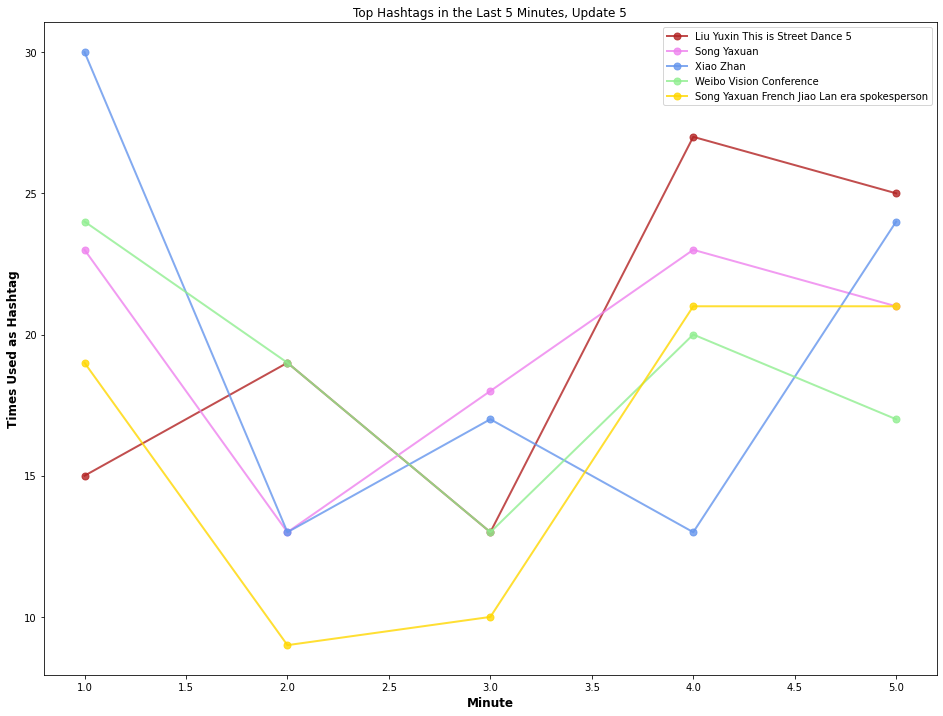

Update 6: [('刘雨昕这就是街舞5', 106), ('肖战', 101), ('宋亚轩', 92), ('微博视界大会', 81), ('宋亚轩法国娇兰时代代言人', 76), ('into1新歌天上不会掉馅饼上线', 70), ('into1天上不会掉馅饼好魔性', 68), ('雷朋大中华区品牌代言人刘雨昕', 55), ('刘宇0824生日快乐', 49), ('肖战工作室', 48), ('来袭', 44), ('刘雨昕法国希思黎睿秀护发品牌代言人', 42), ('成毅应渊帝君', 37), ('左航', 36), ('into1天上不会掉馅饼甩饼舞', 36), ('微光荣耀入围作品', 34), ('时代少年团周边中转站', 32), ('santa', 32), ('多在干什么', 32), ('光遇陪玩', 30), ('肖战时影', 29), ('任嘉伦', 23), ('微光荣耀入围影视音乐', 23), ('护肤双效我都要', 23), ('成毅沉香如屑', 22), ('鞠婧祎', 22), ('微光荣耀入围人物', 22), ('成毅', 19), ('肖战玉骨遥', 18), ('肖战bubly微笑趣泡代言人', 18), ('热烈round1贴片预告', 18), ('天猫小黑盒', 18), ('左航zh', 17), ('肖战肖春生', 16), ('严浩翔', 16), ('刘雨昕', 15), ('微光荣耀推荐', 13), ('喻言寻找w计划', 13), ('肖战梦中的那片海', 12), ('赵丽颖许半夏', 12), ('bubly微笑趣泡', 12), ('当代年轻人矛盾的日常', 12), ('任嘉伦请君', 11), ('时代少年团代言法国娇兰', 10), ('每日一善', 10), ('娇兰第二代双效精华', 10), ('杨紫小夭', 10), ('杨紫', 10), ('赵丽颖沈璃', 10), ('你是我的荣耀开播一周年', 9)]

Update 6: [('Liu Yuxin This is Street Dance 5', 106), ('Xiao Zhan', 101), ('Song Yaxuan', 92), ('Weibo Vision Conference', 81), ('

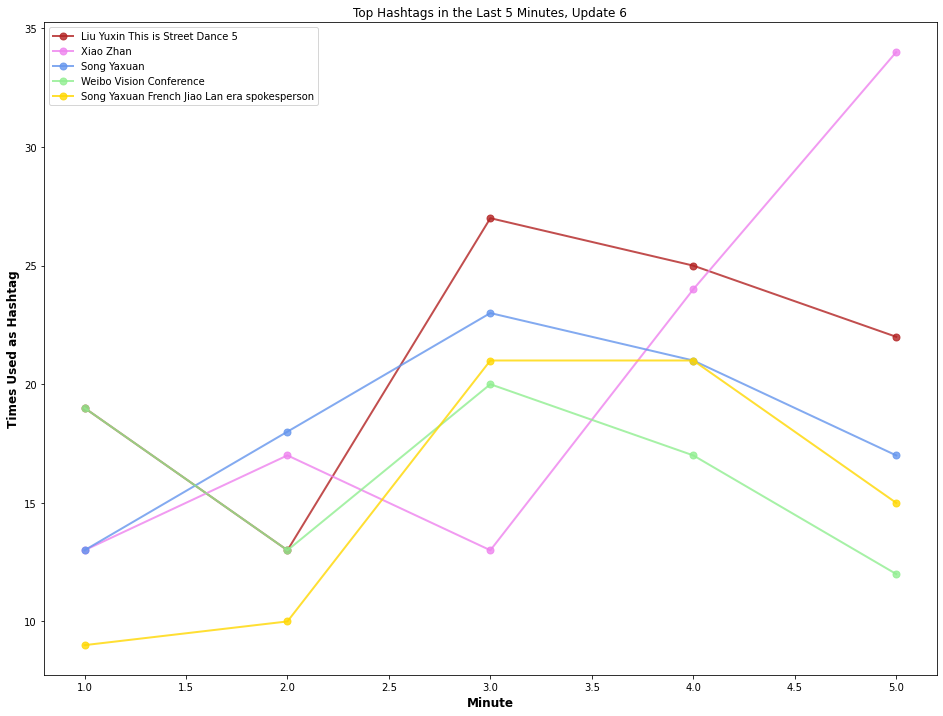

Update 7: [('肖战', 116), ('刘雨昕这就是街舞5', 109), ('宋亚轩', 93), ('宋亚轩法国娇兰时代代言人', 82), ('微博视界大会', 74), ('雷朋大中华区品牌代言人刘雨昕', 61), ('into1新歌天上不会掉馅饼上线', 51), ('into1天上不会掉馅饼好魔性', 48), ('刘宇0824生日快乐', 48), ('肖战工作室', 47), ('来袭', 41), ('刘雨昕法国希思黎睿秀护发品牌代言人', 38), ('微光荣耀入围作品', 37), ('成毅应渊帝君', 35), ('肖战时影', 34), ('左航', 31), ('时代少年团周边中转站', 31), ('into1天上不会掉馅饼甩饼舞', 29), ('光遇陪玩', 28), ('护肤双效我都要', 26), ('肖战玉骨遥', 25), ('成毅沉香如屑', 23), ('任嘉伦', 21), ('天猫小黑盒', 19), ('santa', 19), ('多在干什么', 19), ('每日一善', 19), ('刘雨昕', 19), ('肖战bubly微笑趣泡代言人', 18), ('鞠婧祎', 18), ('微光荣耀入围人物', 18), ('热烈round1贴片预告', 18), ('马嘉祺', 16), ('左航zh', 14), ('吴宣仪蒙面舞王', 14), ('吴宣仪五选一演唱会', 14), ('沉香如屑', 14), ('微光荣耀入围影视音乐', 13), ('成毅', 13), ('喻言寻找w计划', 13), ('肖战肖春生', 12), ('赵丽颖许半夏', 12), ('bubly微笑趣泡', 12), ('心疼时代少年团', 12), ('当代年轻人矛盾的日常', 12), ('时代少年团代言法国娇兰', 11), ('任嘉伦请君', 11), ('严浩翔', 11), ('朱志鑫', 11), ('娇兰第二代双效精华', 11)]

Update 7: [('Xiao Zhan', 116), ('Liu Yuxin This is Street Dance 5', 109), ('Song Yaxuan', 93), ('Song Yaxuan French Jiao Lan era spo

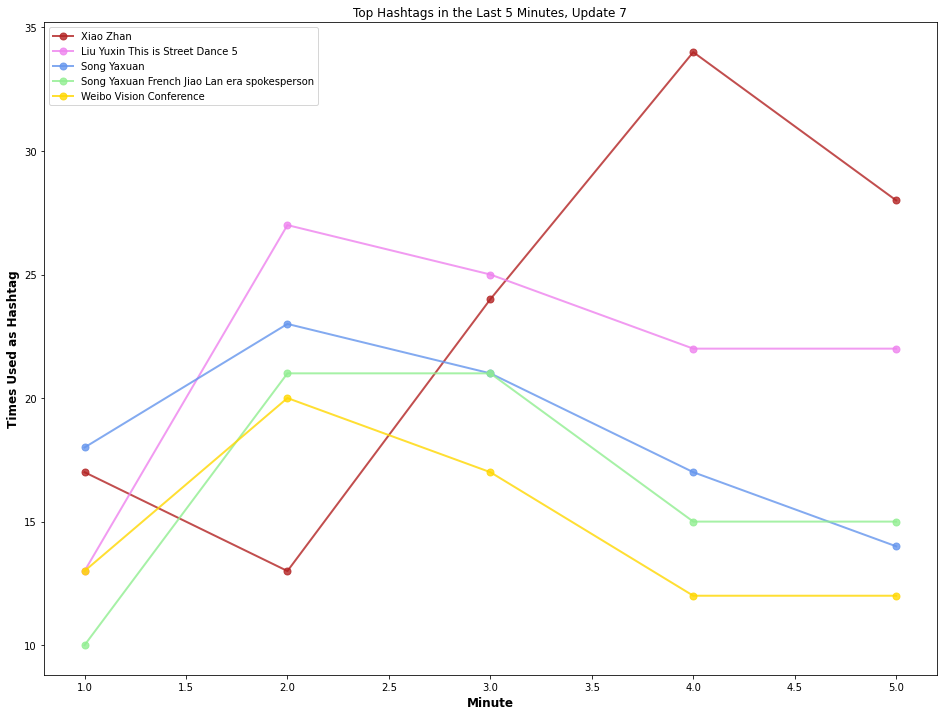

Update 8: [('肖战', 121), ('刘雨昕这就是街舞5', 111), ('宋亚轩', 98), ('宋亚轩法国娇兰时代代言人', 87), ('微博视界大会', 75), ('雷朋大中华区品牌代言人刘雨昕', 57), ('into1新歌天上不会掉馅饼上线', 47), ('来袭', 46), ('into1天上不会掉馅饼好魔性', 44), ('刘雨昕法国希思黎睿秀护发品牌代言人', 43), ('肖战工作室', 43), ('刘宇0824生日快乐', 42), ('微光荣耀入围作品', 40), ('肖战时影', 36), ('成毅应渊帝君', 35), ('时代少年团周边中转站', 31), ('肖战玉骨遥', 30), ('into1天上不会掉馅饼甩饼舞', 30), ('左航', 27), ('成毅沉香如屑', 27), ('每日一善', 27), ('光遇陪玩', 25), ('护肤双效我都要', 23), ('吴宣仪蒙面舞王', 22), ('吴宣仪五选一演唱会', 22), ('马嘉祺', 20), ('刘雨昕', 20), ('santa', 19), ('多在干什么', 19), ('任嘉伦', 18), ('微光荣耀入围影视音乐', 17), ('天猫小黑盒', 17), ('肖战bubly微笑趣泡代言人', 16), ('阳光信用', 16), ('左航zh', 14), ('鞠婧祎', 14), ('朱志鑫', 14), ('沉香如屑', 14), ('成毅', 13), ('微光荣耀入围人物', 12), ('心疼时代少年团', 12), ('当代年轻人矛盾的日常', 12), ('娇兰第二代双效精华', 11), ('丁程鑫', 11), ('刘雨昕首张个人专辑xanadu', 10), ('热烈round1贴片预告', 9), ('sky光遇黑市', 9), ('黄明昊', 9), ('微光荣耀推荐', 8), ('任嘉伦请君', 8)]

Update 8: [('Xiao Zhan', 121), ('Liu Yuxin This is Street Dance 5', 111), ('Song Yaxuan', 98), ('Song Yaxuan French Jiao Lan era spokesperso

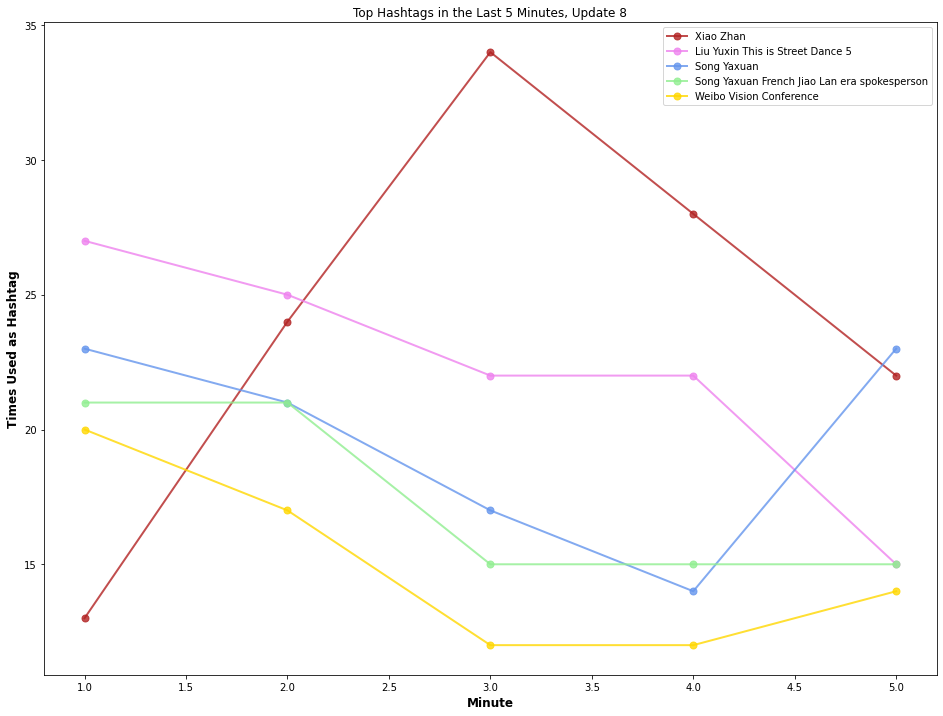

Update 9: [('肖战', 125), ('刘雨昕这就是街舞5', 101), ('宋亚轩', 93), ('宋亚轩法国娇兰时代代言人', 85), ('微博视界大会', 70), ('迪丽热巴安旎', 60), ('迪丽热巴公诉精英', 60), ('雷朋大中华区品牌代言人刘雨昕', 54), ('刘宇0824生日快乐', 45), ('来袭', 42), ('微光荣耀入围作品', 42), ('刘雨昕法国希思黎睿秀护发品牌代言人', 37), ('肖战工作室', 37), ('时代少年团周边中转站', 36), ('into1新歌天上不会掉馅饼上线', 36), ('左航', 33), ('into1天上不会掉馅饼好魔性', 32), ('成毅应渊帝君', 31), ('肖战时影', 31), ('每日一善', 30), ('肖战玉骨遥', 27), ('刘雨昕', 27), ('吴宣仪蒙面舞王', 26), ('吴宣仪五选一演唱会', 26), ('成毅沉香如屑', 25), ('into1天上不会掉馅饼甩饼舞', 25), ('阳光信用', 22), ('护肤双效我都要', 21), ('光遇陪玩', 20), ('天猫小黑盒', 20), ('心疼时代少年团', 17), ('沉香如屑', 17), ('肖战bubly微笑趣泡代言人', 16), ('任嘉伦', 15), ('马嘉祺', 15), ('丁程鑫', 15), ('左航zh', 14), ('微光荣耀入围影视音乐', 12), ('santa', 11), ('多在干什么', 11), ('朱志鑫', 11), ('娇兰第二代双效精华', 11), ('刘雨昕首张个人专辑xanadu', 10), ('微光荣耀入围人物', 9), ('热烈round1贴片预告', 9), ('sky光遇黑市', 9), ('杨紫颜淡', 9), ('王者荣耀', 9), ('王俊凯', 9), ('任嘉伦请君', 8)]

Update 9: [('Xiao Zhan', 125), ('Liu Yuxin This is Street Dance 5', 101), ('Song Yaxuan', 93), ('Song Yaxuan French Jiao Lan era spokesperson

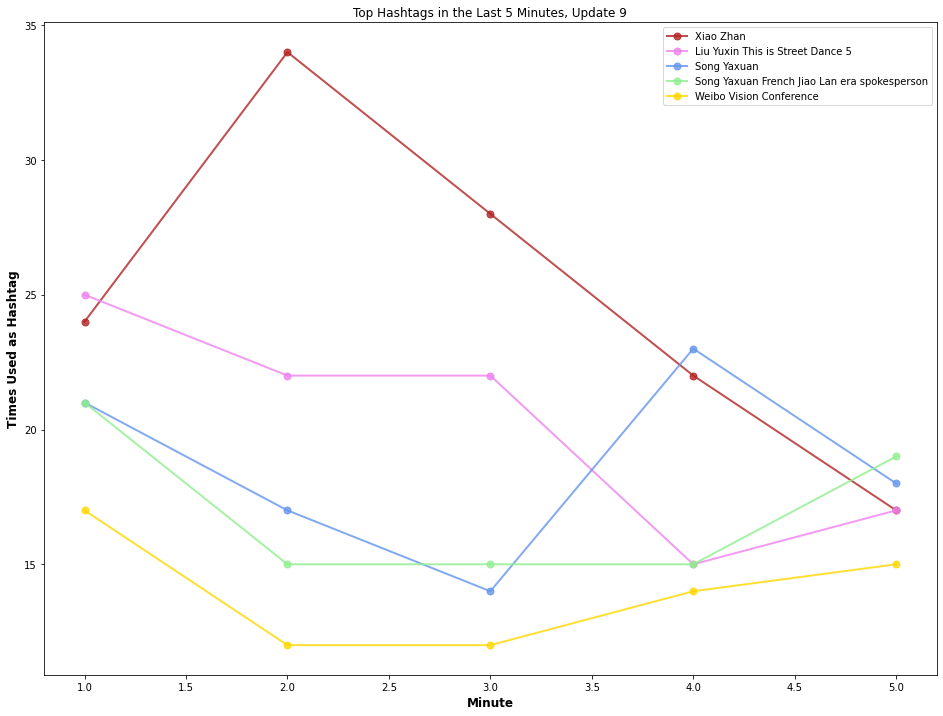

Update 10: [('迪丽热巴安旎', 151), ('迪丽热巴公诉精英', 150), ('肖战', 129), ('宋亚轩', 101), ('刘雨昕这就是街舞5', 97), ('宋亚轩法国娇兰时代代言人', 76), ('微博视界大会', 68), ('雷朋大中华区品牌代言人刘雨昕', 63), ('刘宇0824生日快乐', 49), ('微光荣耀入围作品', 45), ('来袭', 43), ('肖战工作室', 37), ('时代少年团周边中转站', 37), ('每日一善', 36), ('成毅应渊帝君', 35), ('刘雨昕', 35), ('into1新歌天上不会掉馅饼上线', 30), ('左航', 29), ('成毅沉香如屑', 29), ('吴宣仪蒙面舞王', 28), ('吴宣仪五选一演唱会', 28), ('肖战玉骨遥', 27), ('护肤双效我都要', 27), ('into1天上不会掉馅饼好魔性', 26), ('阳光信用', 26), ('刘雨昕法国希思黎睿秀护发品牌代言人', 24), ('天猫小黑盒', 24), ('肖战时影', 22), ('沉香如屑', 22), ('心疼时代少年团', 21), ('光遇陪玩', 19), ('into1天上不会掉馅饼甩饼舞', 19), ('丁程鑫', 19), ('肖战bubly微笑趣泡代言人', 15), ('朱志鑫', 15), ('娇兰第二代双效精华', 15), ('尽兴生活', 12), ('鞠婧祎', 11), ('时代少年团代言法国娇兰', 11), ('严浩翔', 11), ('马嘉祺', 11), ('左航zh', 10), ('任嘉伦', 10), ('刘雨昕首张个人专辑xanadu', 10), ('微光荣耀入围人物', 9), ('王者荣耀', 9), ('王俊凯', 9), ('微光荣耀入围影视音乐', 8), ('肖战梦中的那片海', 8), ('你是我的荣耀开播一周年', 8)]

Update 10: [('Dilige Baran', 151), ('Diligeba sues the elite', 150), ('Xiao Zhan', 129), ('Song Yaxuan', 101), ('Liu Yuxin This is Stre

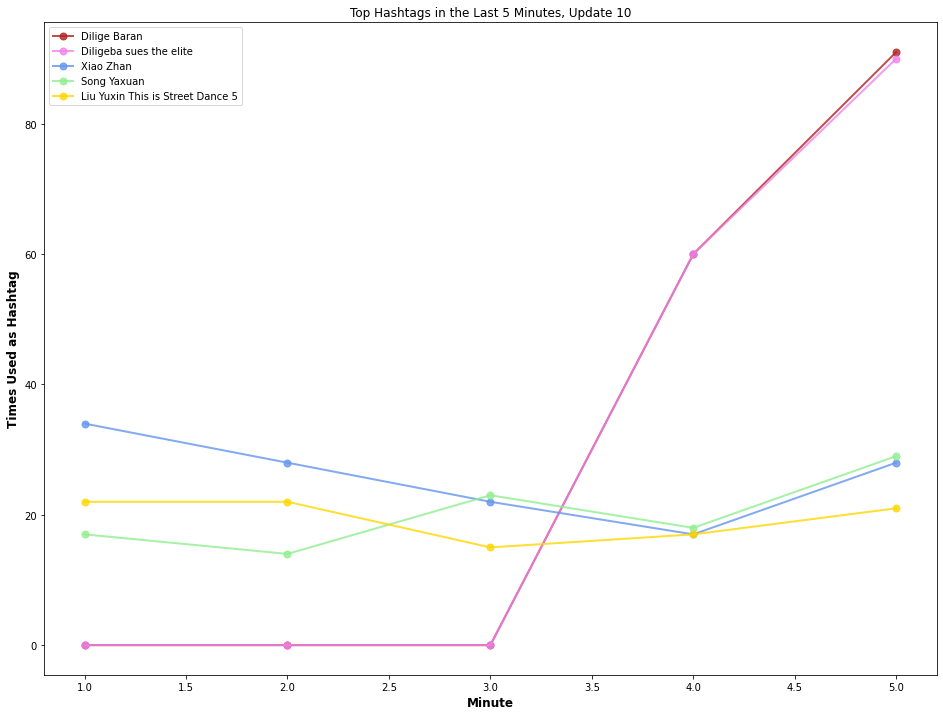

Update 11: [('迪丽热巴安旎', 297), ('迪丽热巴公诉精英', 294), ('刘雨昕这就是街舞5', 138), ('肖战', 126), ('宋亚轩', 98), ('宋亚轩法国娇兰时代代言人', 77), ('微博视界大会', 76), ('雷朋大中华区品牌代言人刘雨昕', 69), ('刘雨昕法国希思黎睿秀护发品牌代言人', 52), ('刘宇0824生日快乐', 52), ('微光荣耀入围作品', 50), ('来袭', 49), ('时代少年团周边中转站', 42), ('成毅应渊帝君', 41), ('into1新歌天上不会掉馅饼上线', 41), ('护肤双效我都要', 38), ('刘雨昕', 38), ('肖战工作室', 37), ('into1天上不会掉馅饼好魔性', 36), ('天猫小黑盒', 34), ('成毅沉香如屑', 29), ('肖战玉骨遥', 29), ('每日一善', 29), ('左航', 26), ('into1天上不会掉馅饼甩饼舞', 26), ('时代少年团代言法国娇兰', 24), ('吴宣仪蒙面舞王', 24), ('吴宣仪五选一演唱会', 24), ('肖战时影', 23), ('娇兰第二代双效精华', 22), ('阳光信用', 21), ('沉香如屑', 20), ('光遇陪玩', 19), ('任嘉伦', 19), ('丁程鑫', 19), ('马嘉祺', 17), ('心疼时代少年团', 16), ('成毅', 15), ('朱志鑫', 15), ('鞠婧祎', 13), ('尽兴生活', 12), ('刘耀文', 12), ('任嘉伦请君', 11), ('刘雨昕康维他全球代言人', 11), ('微光荣耀入围人物', 10), ('肖战梦中的那片海', 10), ('santa', 10), ('多在干什么', 10), ('微光荣耀入围影视音乐', 9), ('王者荣耀', 9)]

Update 11: [('Dilige Baran', 297), ('Diligeba sues the elite', 294), ('Liu Yuxin This is Street Dance 5', 138), ('Xiao Zhan', 126), ('Song Yaxuan', 98

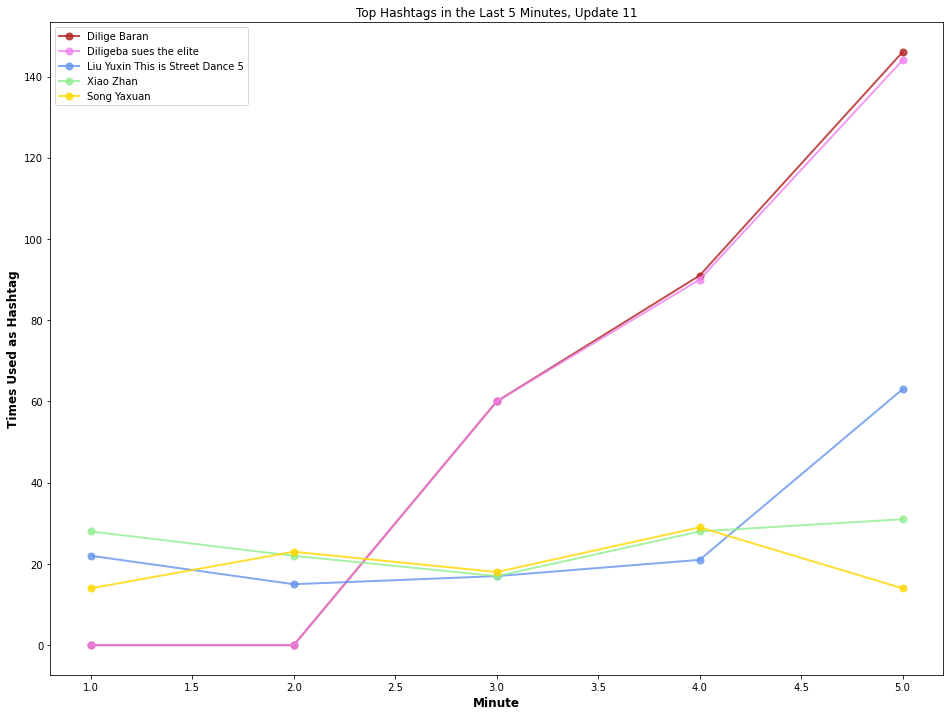

Update 12: [('迪丽热巴安旎', 391), ('迪丽热巴公诉精英', 388), ('刘雨昕这就是街舞5', 153), ('肖战', 131), ('宋亚轩', 109), ('宋亚轩法国娇兰时代代言人', 82), ('微博视界大会', 81), ('雷朋大中华区品牌代言人刘雨昕', 70), ('刘雨昕法国希思黎睿秀护发品牌代言人', 67), ('微光荣耀入围作品', 51), ('into1新歌天上不会掉馅饼上线', 51), ('刘宇0824生日快乐', 51), ('来袭', 50), ('肖战工作室', 47), ('时代少年团周边中转站', 46), ('into1天上不会掉馅饼好魔性', 46), ('成毅应渊帝君', 40), ('护肤双效我都要', 37), ('刘雨昕', 37), ('左航', 34), ('天猫小黑盒', 34), ('吴宣仪蒙面舞王', 31), ('吴宣仪五选一演唱会', 31), ('into1天上不会掉馅饼甩饼舞', 29), ('肖战玉骨遥', 28), ('每日一善', 26), ('时代少年团代言法国娇兰', 24), ('成毅沉香如屑', 23), ('肖战时影', 23), ('娇兰第二代双效精华', 23), ('任嘉伦', 22), ('沉香如屑', 22), ('鞠婧祎', 21), ('成毅', 20), ('丁程鑫', 19), ('santa', 18), ('多在干什么', 18), ('微光荣耀入围人物', 17), ('光遇陪玩', 16), ('肖战梦中的那片海', 16), ('阳光信用', 15), ('严浩翔', 13), ('心疼时代少年团', 12), ('刘耀文', 12), ('任嘉伦请君', 11), ('星汉灿烂', 11), ('jjy', 11), ('刘雨昕康维他全球代言人', 11), ('热爱', 11), ('马嘉祺', 10)]

Update 12: [('Dilige Baran', 391), ('Diligeba sues the elite', 388), ('Liu Yuxin This is Street Dance 5', 153), ('Xiao Zhan', 131), ('Song Yaxuan', 109), ('

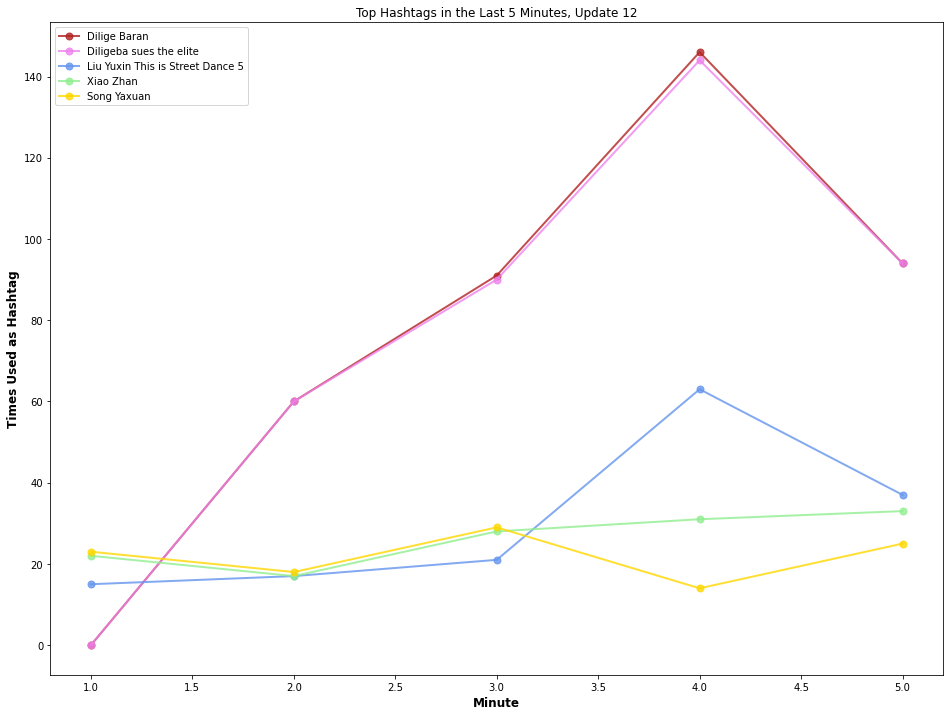

Update 13: [('迪丽热巴安旎', 483), ('迪丽热巴公诉精英', 480), ('刘雨昕这就是街舞5', 161), ('肖战', 133), ('宋亚轩', 109), ('宋亚轩法国娇兰时代代言人', 91), ('微博视界大会', 82), ('雷朋大中华区品牌代言人刘雨昕', 79), ('刘雨昕法国希思黎睿秀护发品牌代言人', 68), ('into1新歌天上不会掉馅饼上线', 61), ('into1天上不会掉馅饼好魔性', 56), ('刘宇0824生日快乐', 56), ('肖战工作室', 50), ('微光荣耀入围作品', 49), ('来袭', 48), ('时代少年团周边中转站', 46), ('左航', 42), ('护肤双效我都要', 40), ('天猫小黑盒', 38), ('成毅应渊帝君', 36), ('into1天上不会掉馅饼甩饼舞', 31), ('刘雨昕', 31), ('时代少年团代言法国娇兰', 29), ('肖战玉骨遥', 28), ('任嘉伦', 28), ('娇兰第二代双效精华', 28), ('微光荣耀入围人物', 25), ('每日一善', 24), ('肖战时影', 23), ('吴宣仪蒙面舞王', 23), ('吴宣仪五选一演唱会', 23), ('santa', 23), ('多在干什么', 23), ('沉香如屑', 22), ('鞠婧祎', 21), ('成毅', 21), ('丁程鑫', 21), ('成毅沉香如屑', 19), ('肖战梦中的那片海', 19), ('阳光信用', 18), ('严浩翔', 13), ('心疼时代少年团', 13), ('尽兴生活', 12), ('刘耀文', 12), ('左航zh', 12), ('光遇陪玩', 11), ('任嘉伦请君', 11), ('countonlove倚爱之名', 11), ('自由释爱', 11), ('jjy', 11)]

Update 13: [('Dilige Baran', 483), ('Diligeba sues the elite', 480), ('Liu Yuxin This is Street Dance 5', 161), ('Xiao Zhan', 133), ('Song Yaxuan', 1

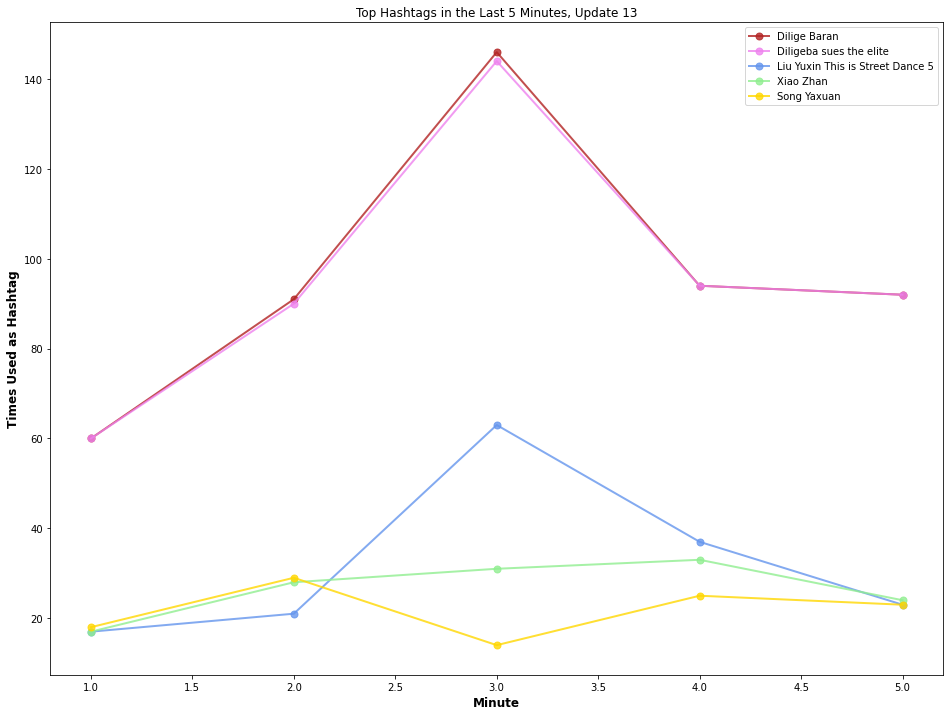

Update 14: [('迪丽热巴安旎', 529), ('迪丽热巴公诉精英', 526), ('刘雨昕这就是街舞5', 162), ('肖战', 139), ('宋亚轩', 104), ('微博视界大会', 89), ('宋亚轩法国娇兰时代代言人', 84), ('雷朋大中华区品牌代言人刘雨昕', 77), ('刘雨昕法国希思黎睿秀护发品牌代言人', 71), ('肖战工作室', 60), ('into1新歌天上不会掉馅饼上线', 60), ('into1天上不会掉馅饼好魔性', 56), ('刘宇0824生日快乐', 56), ('来袭', 54), ('微光荣耀入围作品', 50), ('时代少年团周边中转站', 47), ('护肤双效我都要', 47), ('天猫小黑盒', 44), ('左航', 43), ('肖战玉骨遥', 37), ('时代少年团代言法国娇兰', 36), ('娇兰第二代双效精华', 35), ('肖战时影', 33), ('into1天上不会掉馅饼甩饼舞', 32), ('成毅应渊帝君', 31), ('鞠婧祎', 31), ('微光荣耀入围人物', 31), ('任嘉伦', 29), ('每日一善', 26), ('沉香如屑', 26), ('刘雨昕', 24), ('santa', 23), ('多在干什么', 23), ('成毅', 21), ('肖战梦中的那片海', 19), ('吴宣仪蒙面舞王', 19), ('吴宣仪五选一演唱会', 19), ('阳光信用', 19), ('jjy', 19), ('丁程鑫', 17), ('成毅沉香如屑', 15), ('2022', 15), ('微光荣耀五大类别推荐重磅开启', 15), ('心疼时代少年团', 14), ('任嘉伦请君', 13), ('严浩翔', 13), ('尽兴生活', 12), ('刘耀文', 12), ('左航zh', 12), ('鞠婧祎魏枝', 12)]

Update 14: [('Dilige Baran', 529), ('Diligeba sues the elite', 526), ('Liu Yuxin This is Street Dance 5', 162), ('Xiao Zhan', 139), ('Song Yaxuan', 1

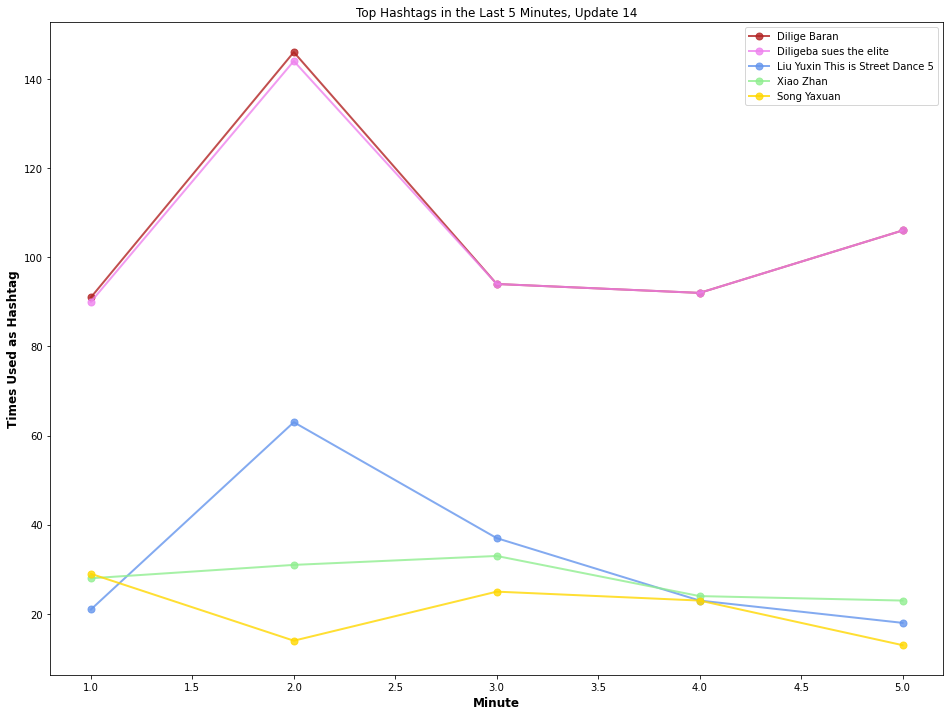

Update 15: [('迪丽热巴安旎', 438), ('迪丽热巴公诉精英', 436), ('刘雨昕这就是街舞5', 160), ('肖战', 122), ('宋亚轩', 96), ('微博视界大会', 93), ('宋亚轩法国娇兰时代代言人', 90), ('刘雨昕法国希思黎睿秀护发品牌代言人', 80), ('雷朋大中华区品牌代言人刘雨昕', 65), ('左航', 56), ('肖战工作室', 55), ('into1新歌天上不会掉馅饼上线', 54), ('刘宇0824生日快乐', 53), ('来袭', 51), ('into1天上不会掉馅饼好魔性', 50), ('微光荣耀入围作品', 48), ('护肤双效我都要', 48), ('时代少年团周边中转站', 47), ('天猫小黑盒', 47), ('into1天上不会掉馅饼甩饼舞', 38), ('肖战玉骨遥', 37), ('肖战时影', 37), ('微光荣耀入围人物', 37), ('时代少年团代言法国娇兰', 35), ('娇兰第二代双效精华', 35), ('成毅应渊帝君', 34), ('任嘉伦', 32), ('鞠婧祎', 27), ('沉香如屑', 27), ('成毅', 25), ('每日一善', 23), ('santa', 23), ('多在干什么', 23), ('刘雨昕', 22), ('左航zh', 21), ('2022', 18), ('微光荣耀五大类别推荐重磅开启', 18), ('成毅沉香如屑', 16), ('肖战梦中的那片海', 15), ('阳光信用', 15), ('jjy', 14), ('任嘉伦请君', 13), ('丁程鑫', 13), ('吴宣仪蒙面舞王', 12), ('吴宣仪五选一演唱会', 12), ('鞠婧祎魏枝', 12), ('赵露思月升沧海', 12), ('热爱', 11), ('微光荣耀推荐', 11), ('心疼时代少年团', 10)]

Update 15: [('Dilige Baran', 438), ('Diligeba sues the elite', 436), ('Liu Yuxin This is Street Dance 5', 160), ('Xiao Zhan', 122), ('Song Yaxuan

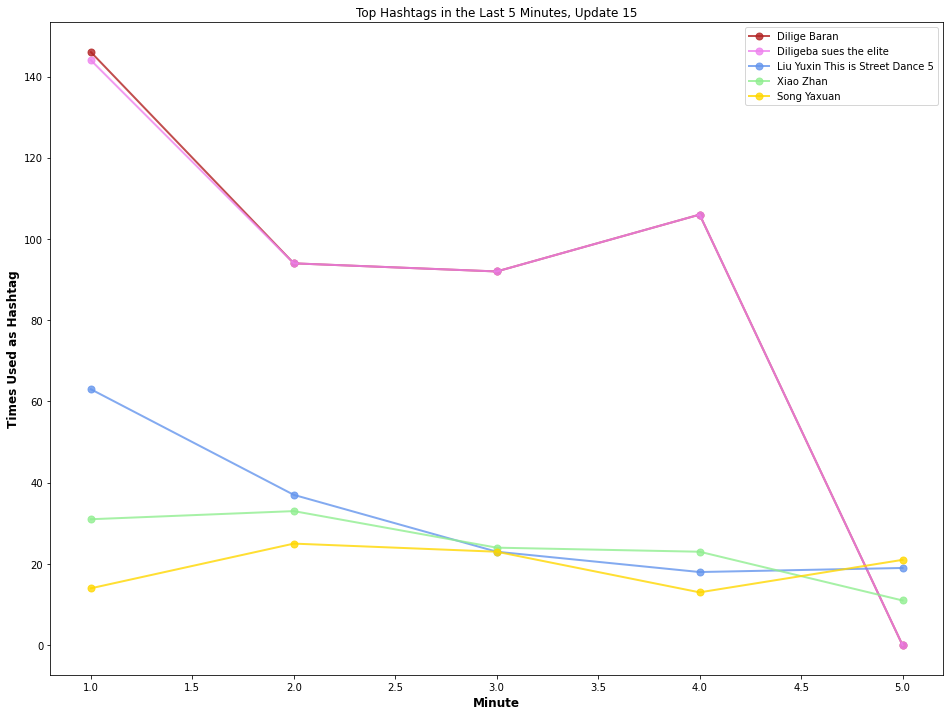

Update 16: [('迪丽热巴安旎', 292), ('迪丽热巴公诉精英', 292), ('刘雨昕这就是街舞5', 108), ('肖战', 106), ('宋亚轩', 102), ('微博视界大会', 91), ('宋亚轩法国娇兰时代代言人', 84), ('雷朋大中华区品牌代言人刘雨昕', 55), ('刘宇0824生日快乐', 52), ('肖战工作室', 50), ('左航', 48), ('微光荣耀入围作品', 45), ('来袭', 44), ('时代少年团周边中转站', 44), ('刘雨昕法国希思黎睿秀护发品牌代言人', 42), ('天猫小黑盒', 37), ('护肤双效我都要', 37), ('微光荣耀入围人物', 34), ('into1新歌天上不会掉馅饼上线', 31), ('每日一善', 31), ('into1天上不会掉馅饼好魔性', 30), ('肖战时影', 30), ('into1天上不会掉馅饼甩饼舞', 29), ('肖战玉骨遥', 28), ('时代少年团代言法国娇兰', 27), ('娇兰第二代双效精华', 27), ('任嘉伦', 23), ('成毅应渊帝君', 22), ('沉香如屑', 22), ('阳光信用', 21), ('左航zh', 21), ('刘雨昕', 19), ('鞠婧祎', 18), ('2022', 18), ('微光荣耀五大类别推荐重磅开启', 18), ('微光荣耀推荐', 17), ('jjy', 14), ('成毅沉香如屑', 13), ('成毅', 13), ('严浩翔', 13), ('丁程鑫', 13), ('星汉灿烂', 13), ('santa', 13), ('多在干什么', 13), ('肖战梦中的那片海', 12), ('吴宣仪蒙面舞王', 12), ('吴宣仪五选一演唱会', 12), ('鞠婧祎魏枝', 12), ('赵露思月升沧海', 12), ('心疼时代少年团', 10)]

Update 16: [('Dilige Baran', 292), ('Diligeba sues the elite', 292), ('Liu Yuxin This is Street Dance 5', 108), ('Xiao Zhan', 106), ('Song Yaxua

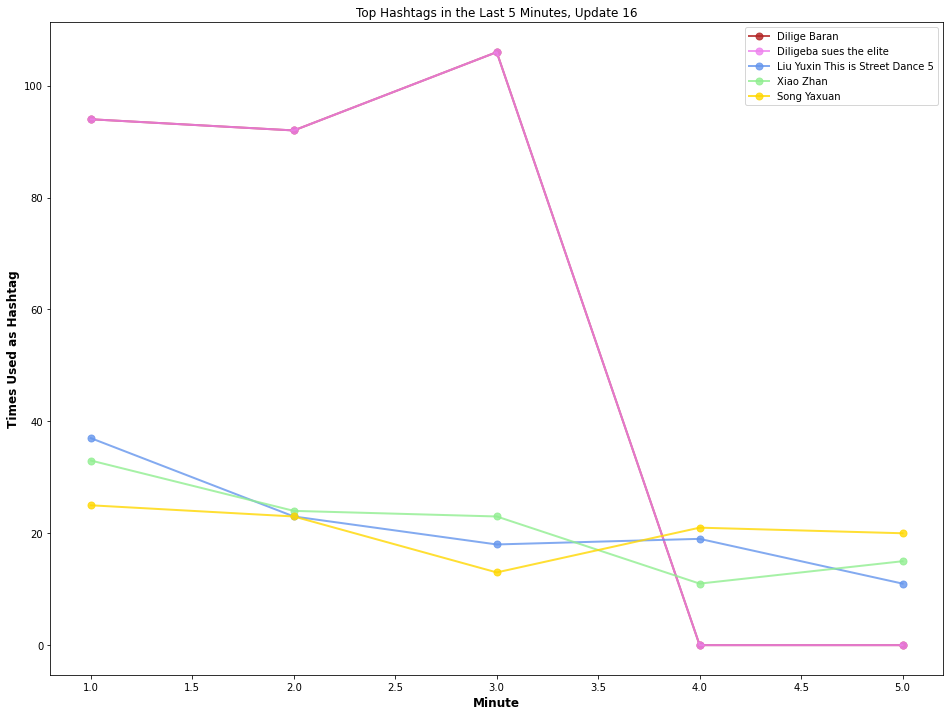

Update 17: [('迪丽热巴安旎', 198), ('迪丽热巴公诉精英', 198), ('刘雨昕这就是街舞5', 101), ('宋亚轩', 94), ('肖战', 91), ('微博视界大会', 91), ('宋亚轩法国娇兰时代代言人', 75), ('雷朋大中华区品牌代言人刘雨昕', 54), ('刘宇0824生日快乐', 51), ('微光荣耀入围作品', 45), ('来袭', 43), ('肖战工作室', 40), ('时代少年团周边中转站', 40), ('左航', 37), ('天猫小黑盒', 37), ('护肤双效我都要', 37), ('微光荣耀入围人物', 35), ('刘雨昕法国希思黎睿秀护发品牌代言人', 34), ('肖战时影', 30), ('时代少年团代言法国娇兰', 30), ('娇兰第二代双效精华', 28), ('任嘉伦', 25), ('每日一善', 25), ('肖战玉骨遥', 22), ('2022', 22), ('微光荣耀五大类别推荐重磅开启', 22), ('阳光信用', 21), ('成毅应渊帝君', 20), ('into1天上不会掉馅饼甩饼舞', 20), ('微光荣耀推荐', 17), ('刘雨昕', 16), ('into1新歌天上不会掉馅饼上线', 14), ('into1天上不会掉馅饼好魔性', 14), ('巴黎欧莱雅美发代言人杨洋', 14), ('成毅沉香如屑', 13), ('沉香如屑', 13), ('左航zh', 13), ('countonlove倚爱之名', 12), ('杨紫小夭', 12), ('赵露思月升沧海', 12), ('任嘉伦无忧渡', 11), ('鞠婧祎', 10), ('心疼时代少年团', 10), ('尽兴生活', 10), ('我推荐斗罗大陆', 10), ('赵露思星汉灿烂', 10), ('赵露思程少商', 10), ('任嘉伦宣夜', 10), ('angelababy', 10), ('自由释爱', 9)]

Update 17: [('Dilige Baran', 198), ('Diligeba sues the elite', 198), ('Liu Yuxin This is Street Dance 5', 101), ('Song Ya

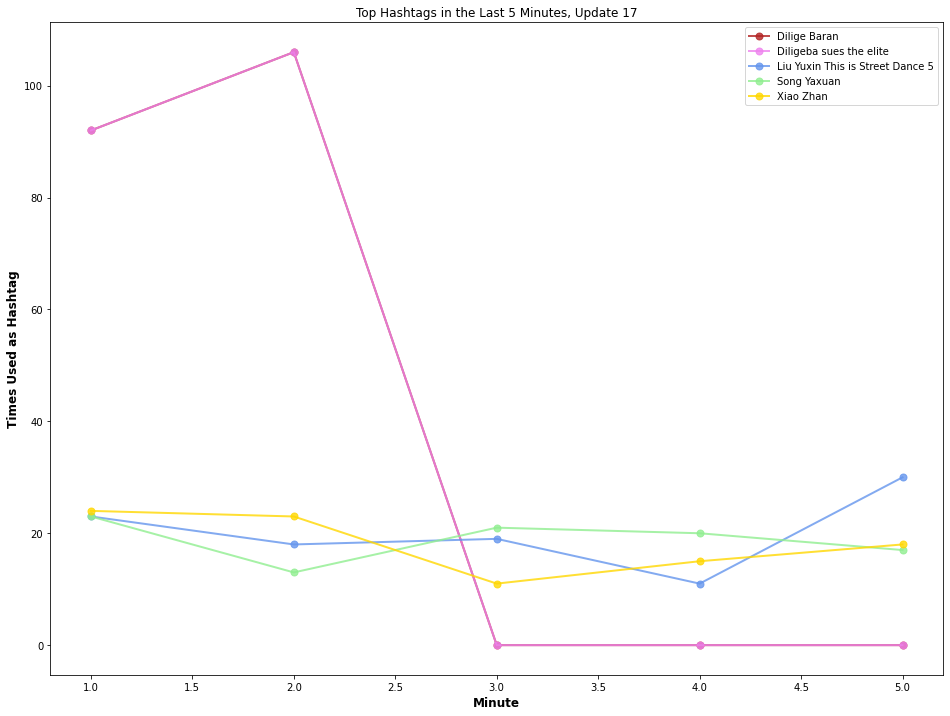

Update 18: [('刘雨昕这就是街舞5', 109), ('迪丽热巴安旎', 106), ('迪丽热巴公诉精英', 106), ('微博视界大会', 88), ('肖战', 83), ('宋亚轩', 81), ('宋亚轩法国娇兰时代代言人', 59), ('雷朋大中华区品牌代言人刘雨昕', 49), ('刘雨昕法国希思黎睿秀护发品牌代言人', 46), ('刘宇0824生日快乐', 45), ('微光荣耀入围作品', 44), ('来袭', 38), ('肖战工作室', 38), ('时代少年团周边中转站', 37), ('天猫小黑盒', 37), ('护肤双效我都要', 37), ('时代少年团代言法国娇兰', 31), ('左航', 29), ('任嘉伦', 29), ('娇兰第二代双效精华', 28), ('肖战时影', 27), ('微光荣耀入围人物', 27), ('成毅应渊帝君', 24), ('微光荣耀推荐', 23), ('巴黎欧莱雅美发代言人杨洋', 20), ('每日一善', 19), ('肖战玉骨遥', 17), ('阳光信用', 17), ('2022', 17), ('微光荣耀五大类别推荐重磅开启', 17), ('成毅沉香如屑', 16), ('刘雨昕', 16), ('into1天上不会掉馅饼甩饼舞', 13), ('鞠婧祎', 13), ('沉香如屑', 13), ('任嘉伦陆炎', 13), ('任嘉伦请君', 12), ('赵露思月升沧海', 12), ('严浩翔', 11), ('星汉灿烂', 11), ('任嘉伦无忧渡', 11), ('欧莱雅生姜洗护', 11), ('微光荣耀入围影视音乐', 11), ('时代少年团', 11), ('我推荐斗罗大陆', 10), ('赵露思星汉灿烂', 10), ('赵露思程少商', 10), ('任嘉伦宣夜', 10), ('angelababy', 10), ('青年演员尹浩宇', 10)]

Update 18: [('Liu Yuxin This is Street Dance 5', 109), ('Dilige Baran', 106), ('Diligeba sues the elite', 106), ('Weibo Vision Conference', 88)

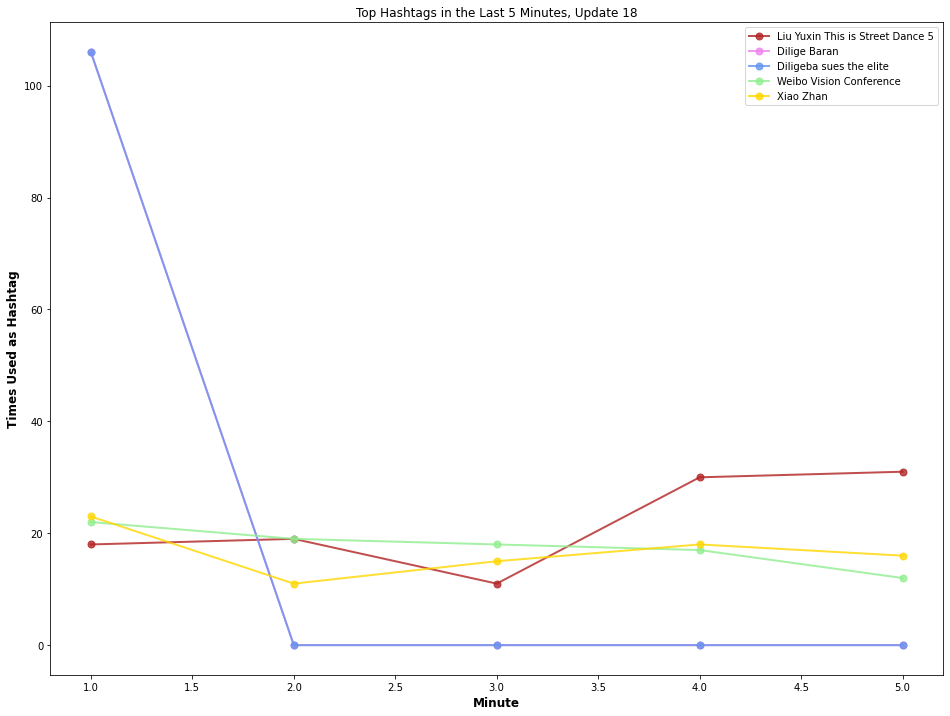

Update 19: [('刘雨昕这就是街舞5', 110), ('微博视界大会', 79), ('宋亚轩', 75), ('肖战', 72), ('宋亚轩法国娇兰时代代言人', 56), ('雷朋大中华区品牌代言人刘雨昕', 49), ('刘雨昕法国希思黎睿秀护发品牌代言人', 47), ('刘宇0824生日快乐', 44), ('微光荣耀入围作品', 38), ('时代少年团周边中转站', 38), ('天猫小黑盒', 37), ('护肤双效我都要', 37), ('来袭', 34), ('时代少年团代言法国娇兰', 33), ('肖战工作室', 30), ('任嘉伦', 29), ('娇兰第二代双效精华', 29), ('左航', 26), ('成毅应渊帝君', 24), ('微光荣耀推荐', 23), ('巴黎欧莱雅美发代言人杨洋', 22), ('微光荣耀入围人物', 21), ('刘雨昕', 20), ('赵露思月升沧海', 16), ('光遇陪玩', 15), ('2022', 15), ('微光荣耀五大类别推荐重磅开启', 15), ('微光荣耀入围影视音乐', 15), ('时代少年团', 15), ('任嘉伦陆炎', 14), ('任嘉伦无忧渡', 14), ('肖战时影', 13), ('任嘉伦宣夜', 13), ('朱志鑫', 12), ('成毅沉香如屑', 11), ('每日一善', 11), ('严浩翔', 11), ('星汉灿烂', 11), ('欧莱雅生姜洗护', 11), ('任嘉伦请君', 10), ('阳光信用', 10), ('赵露思星汉灿烂', 10), ('赵露思程少商', 10), ('angelababy', 10), ('青年演员尹浩宇', 10), ('into1天上不会掉馅饼甩饼舞', 9), ('沉香如屑', 9), ('尽兴生活', 9), ('左航zh', 9), ('尹浩宇五十公里桃花坞', 9)]

Update 19: [('Liu Yuxin This is Street Dance 5', 110), ('Weibo Vision Conference', 79), ('Song Yaxuan', 75), ('Xiao Zhan', 72), ('Song Yaxuan French Jiao 

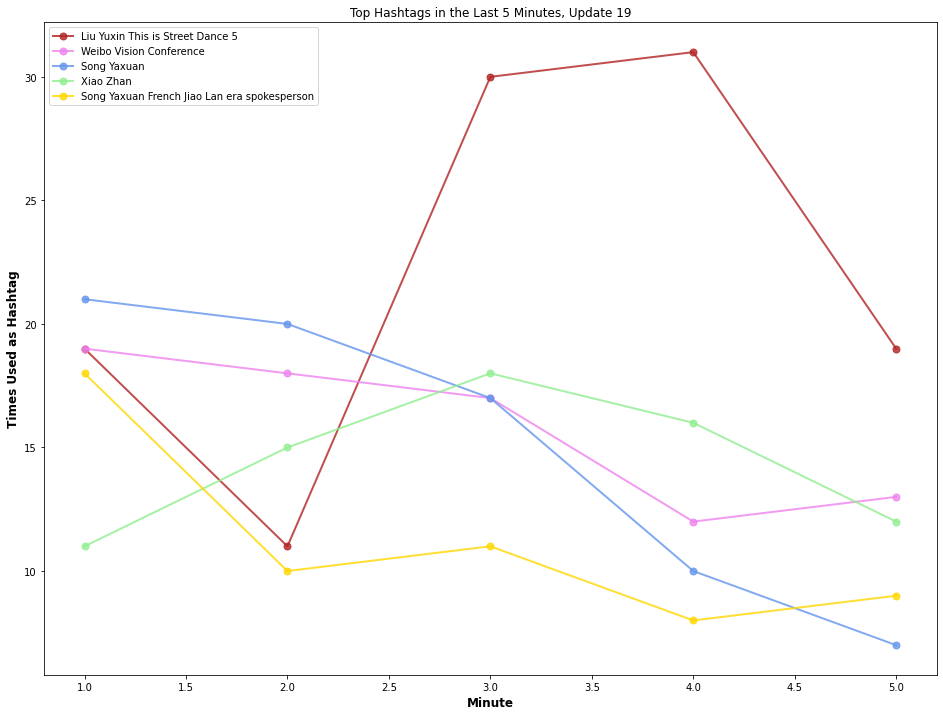

Update 20: [('刘雨昕这就是街舞5', 109), ('微博视界大会', 76), ('肖战', 70), ('宋亚轩', 66), ('雷朋大中华区品牌代言人刘雨昕', 57), ('宋亚轩法国娇兰时代代言人', 51), ('刘宇0824生日快乐', 46), ('刘雨昕法国希思黎睿秀护发品牌代言人', 44), ('时代少年团周边中转站', 40), ('来袭', 36), ('护肤双效我都要', 36), ('微光荣耀入围作品', 35), ('天猫小黑盒', 35), ('时代少年团代言法国娇兰', 35), ('任嘉伦', 34), ('娇兰第二代双效精华', 29), ('肖战工作室', 26), ('巴黎欧莱雅美发代言人杨洋', 25), ('成毅应渊帝君', 21), ('微光荣耀入围影视音乐', 20), ('微光荣耀入围人物', 19), ('时代少年团', 19), ('2022', 18), ('微光荣耀五大类别推荐重磅开启', 18), ('任嘉伦陆炎', 18), ('微光荣耀推荐', 17), ('热烈round1贴片预告', 17), ('光遇陪玩', 16), ('严浩翔', 16), ('吴宣仪蒙面舞王', 16), ('吴宣仪五选一演唱会', 16), ('青年演员尹浩宇', 15), ('任嘉伦请君', 14), ('刘雨昕', 14), ('阳光信用', 14), ('尽兴生活', 14), ('左航', 13), ('每日一善', 13), ('肖战bubly微笑趣泡代言人', 13), ('朱志鑫', 12), ('喻言寻找w计划', 12), ('任嘉伦无忧渡', 11), ('成毅沉香如屑', 10), ('任嘉伦宣夜', 10), ('angelababy', 10), ('肖战时影', 9), ('龚俊', 9), ('罗一舟听说很好吃', 9), ('罗一舟', 9), ('sky光遇黑市', 9)]

Update 20: [('Liu Yuxin This is Street Dance 5', 109), ('Weibo Vision Conference', 76), ('Xiao Zhan', 70), ('Song Yaxuan', 66), ('Leipeng Grand Middl

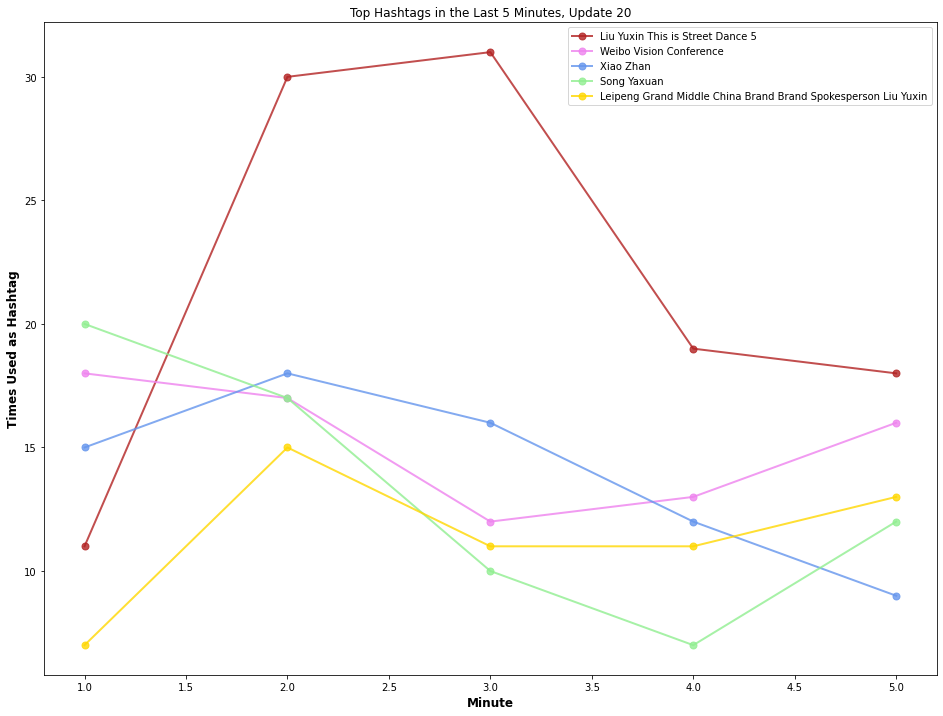

Update 21: [('刘雨昕这就是街舞5', 117), ('肖战', 80), ('微博视界大会', 74), ('雷朋大中华区品牌代言人刘雨昕', 58), ('刘雨昕法国希思黎睿秀护发品牌代言人', 55), ('宋亚轩', 51), ('宋亚轩法国娇兰时代代言人', 47), ('刘宇0824生日快乐', 46), ('任嘉伦', 45), ('来袭', 39), ('微光荣耀入围作品', 36), ('时代少年团周边中转站', 36), ('天猫小黑盒', 34), ('时代少年团代言法国娇兰', 34), ('护肤双效我都要', 34), ('巴黎欧莱雅美发代言人杨洋', 33), ('娇兰第二代双效精华', 27), ('成毅应渊帝君', 24), ('吴宣仪蒙面舞王', 24), ('吴宣仪五选一演唱会', 24), ('肖战工作室', 23), ('任嘉伦陆炎', 21), ('热烈round1贴片预告', 21), ('左航', 19), ('任嘉伦请君', 19), ('微光荣耀入围影视音乐', 19), ('时代少年团', 19), ('微光荣耀推荐', 17), ('任嘉伦无忧渡', 17), ('光遇陪玩', 16), ('微光荣耀入围人物', 16), ('刘雨昕', 14), ('成毅沉香如屑', 13), ('2022', 13), ('微光荣耀五大类别推荐重磅开启', 13), ('rogervivier品牌代言人任嘉伦', 13), ('肖战bubly微笑趣泡代言人', 13), ('青年演员尹浩宇', 12), ('朱志鑫', 12), ('喻言寻找w计划', 12), ('into1新歌天上不会掉馅饼上线', 12), ('into1天上不会掉馅饼好魔性', 12), ('严浩翔', 11), ('阳光信用', 11), ('尽兴生活', 11), ('欧莱雅生姜洗护', 11), ('任嘉伦宣夜', 10), ('任嘉伦嗨放派', 10), ('肖战时影', 9), ('sky光遇黑市', 9)]

Update 21: [('Liu Yuxin This is Street Dance 5', 117), ('Xiao Zhan', 80), ('Weibo Vision Conference', 74), ('L

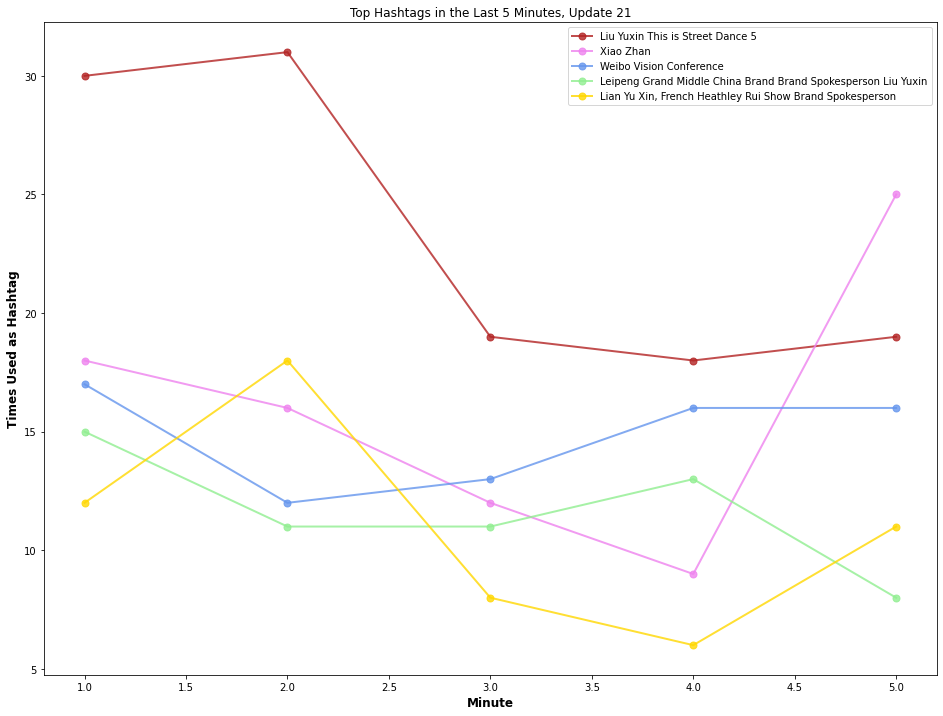

Update 22: [('刘雨昕这就是街舞5', 98), ('微博视界大会', 79), ('肖战', 72), ('宋亚轩', 55), ('宋亚轩法国娇兰时代代言人', 52), ('刘雨昕法国希思黎睿秀护发品牌代言人', 49), ('雷朋大中华区品牌代言人刘雨昕', 47), ('刘宇0824生日快乐', 45), ('来袭', 43), ('任嘉伦', 43), ('微光荣耀入围作品', 36), ('时代少年团周边中转站', 36), ('吴宣仪蒙面舞王', 34), ('吴宣仪五选一演唱会', 34), ('天猫小黑盒', 32), ('护肤双效我都要', 32), ('时代少年团代言法国娇兰', 31), ('成毅应渊帝君', 27), ('巴黎欧莱雅美发代言人杨洋', 26), ('娇兰第二代双效精华', 25), ('左航', 23), ('微光荣耀入围影视音乐', 23), ('肖战工作室', 22), ('热烈round1贴片预告', 21), ('每日一善', 19), ('任嘉伦请君', 19), ('成毅沉香如屑', 18), ('微光荣耀入围人物', 17), ('阳光信用', 17), ('微光荣耀推荐', 17), ('任嘉伦陆炎', 17), ('肖战bubly微笑趣泡代言人', 17), ('into1新歌天上不会掉馅饼上线', 17), ('光遇陪玩', 16), ('喻言寻找w计划', 16), ('into1天上不会掉馅饼好魔性', 16), ('时代少年团', 14), ('刘雨昕', 13), ('2022', 13), ('微光荣耀五大类别推荐重磅开启', 13), ('青年演员尹浩宇', 12), ('严浩翔', 11), ('尽兴生活', 11), ('rogervivier品牌代言人任嘉伦', 11), ('热爱', 11), ('王一博', 11), ('成毅', 11), ('任嘉伦无忧渡', 9), ('bubly微笑趣泡', 9), ('沉香如屑', 8)]

Update 22: [('Liu Yuxin This is Street Dance 5', 98), ('Weibo Vision Conference', 79), ('Xiao Zhan', 72), ('Song Yaxuan'

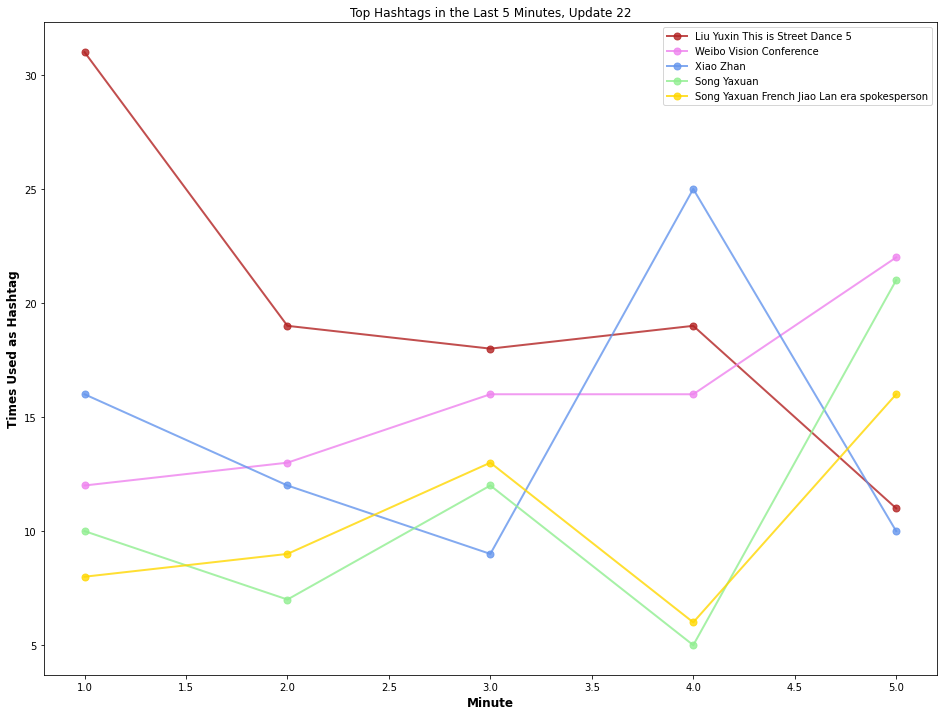

Update 23: [('迪丽热巴安旎', 132), ('迪丽热巴公诉精英', 132), ('刘雨昕这就是街舞5', 123), ('微博视界大会', 95), ('肖战', 93), ('雷朋大中华区品牌代言人刘雨昕', 68), ('宋亚轩法国娇兰时代代言人', 67), ('宋亚轩', 64), ('刘宇0824生日快乐', 58), ('来袭', 57), ('刘雨昕法国希思黎睿秀护发品牌代言人', 49), ('吴宣仪蒙面舞王', 49), ('吴宣仪五选一演唱会', 49), ('时代少年团周边中转站', 46), ('任嘉伦', 46), ('护肤双效我都要', 44), ('天猫小黑盒', 42), ('微光荣耀入围作品', 41), ('时代少年团代言法国娇兰', 40), ('into1新歌天上不会掉馅饼上线', 40), ('into1天上不会掉馅饼好魔性', 38), ('热烈round1贴片预告', 37), ('成毅应渊帝君', 36), ('娇兰第二代双效精华', 34), ('肖战工作室', 31), ('左航', 30), ('微光荣耀入围人物', 29), ('每日一善', 28), ('into1天上不会掉馅饼甩饼舞', 25), ('成毅沉香如屑', 23), ('光遇陪玩', 22), ('阳光信用', 22), ('巴黎欧莱雅美发代言人杨洋', 20), ('微光荣耀入围影视音乐', 20), ('成毅', 20), ('任嘉伦请君', 19), ('刘雨昕', 19), ('2022', 19), ('微光荣耀五大类别推荐重磅开启', 19), ('任嘉伦陆炎', 18), ('santa', 17), ('多在干什么', 17), ('肖战时影', 16), ('肖战bubly微笑趣泡代言人', 13), ('喻言寻找w计划', 13), ('sky光遇黑市', 12), ('微光荣耀推荐', 11), ('任嘉伦嗨放派', 11), ('王一博', 11), ('任嘉伦无忧渡', 9)]

Update 23: [('Dilige Baran', 132), ('Diligeba sues the elite', 132), ('Liu Yuxin This is Street Dance 5', 123), 

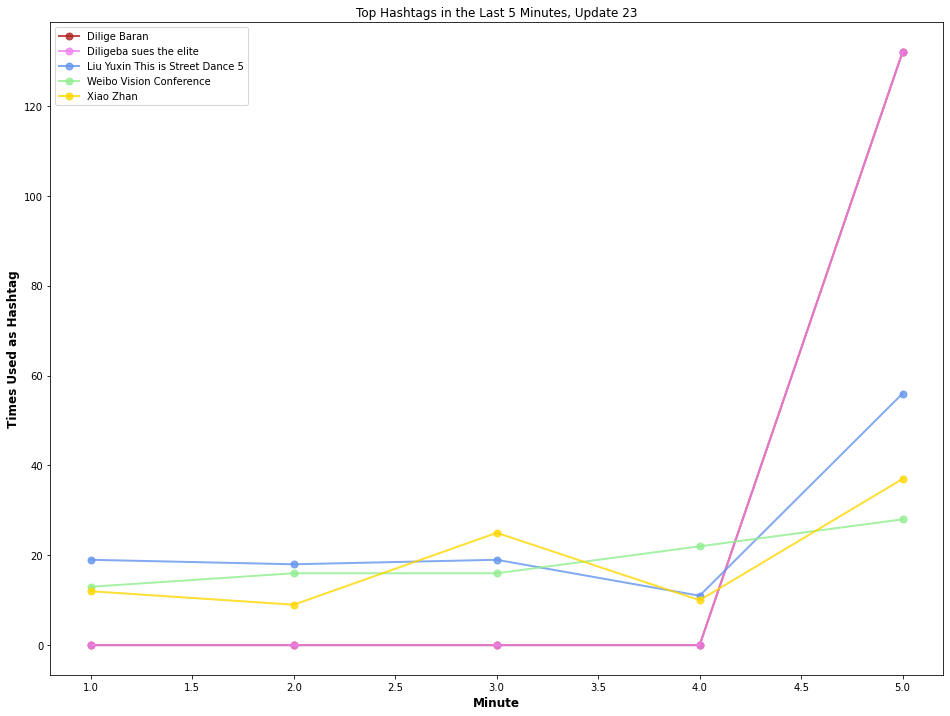

Update 24: [('迪丽热巴安旎', 382), ('迪丽热巴公诉精英', 382), ('刘雨昕这就是街舞5', 169), ('肖战', 111), ('微博视界大会', 105), ('宋亚轩法国娇兰时代代言人', 91), ('宋亚轩', 86), ('雷朋大中华区品牌代言人刘雨昕', 82), ('刘雨昕法国希思黎睿秀护发品牌代言人', 78), ('吴宣仪蒙面舞王', 75), ('吴宣仪五选一演唱会', 75), ('来袭', 64), ('刘宇0824生日快乐', 63), ('时代少年团周边中转站', 58), ('into1新歌天上不会掉馅饼上线', 56), ('into1天上不会掉馅饼好魔性', 54), ('任嘉伦', 50), ('护肤双效我都要', 49), ('微光荣耀入围作品', 48), ('天猫小黑盒', 47), ('时代少年团代言法国娇兰', 45), ('左航', 42), ('成毅应渊帝君', 38), ('肖战工作室', 37), ('娇兰第二代双效精华', 37), ('热烈round1贴片预告', 37), ('每日一善', 35), ('into1天上不会掉馅饼甩饼舞', 33), ('阳光信用', 29), ('刘雨昕', 28), ('微光荣耀入围人物', 25), ('微光荣耀入围影视音乐', 25), ('santa', 25), ('多在干什么', 25), ('成毅沉香如屑', 23), ('光遇陪玩', 22), ('青年演员尹浩宇', 21), ('成毅', 20), ('左航zh', 18), ('肖战时影', 16), ('2022', 16), ('微光荣耀五大类别推荐重磅开启', 16), ('sky光遇', 16), ('鞠婧祎', 15), ('任嘉伦请君', 15), ('热爱', 15), ('王一博', 15), ('巴黎欧莱雅美发代言人杨洋', 14), ('刘雨昕首张个人专辑xanadu', 14), ('肖战玉骨遥', 14)]

Update 24: [('Dilige Baran', 382), ('Diligeba sues the elite', 382), ('Liu Yuxin This is Street Dance 5', 169), ('Xiao 

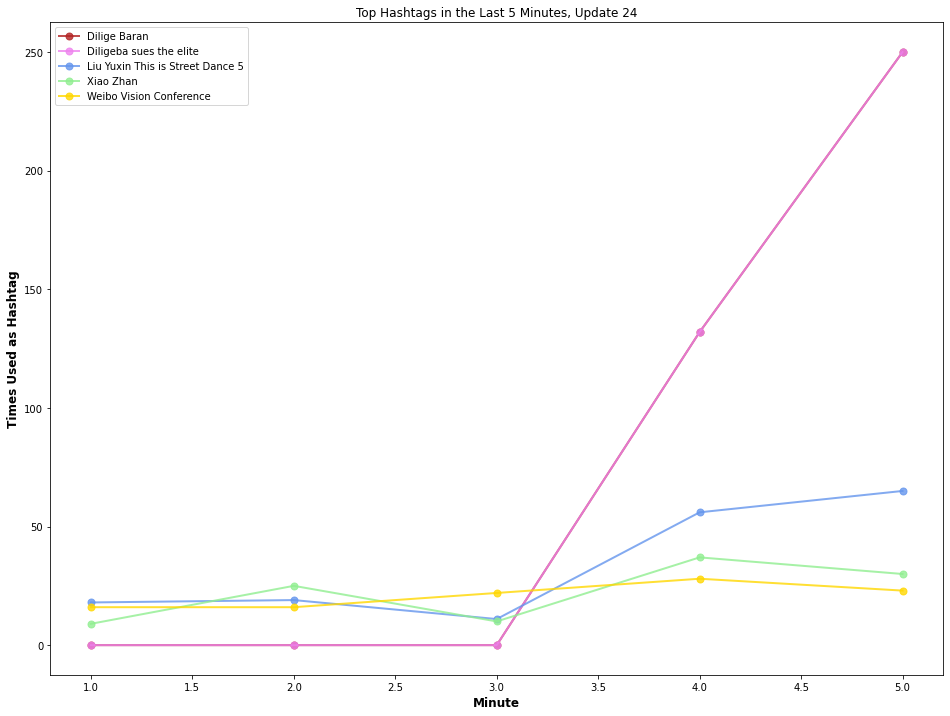

Update 25: [('迪丽热巴安旎', 612), ('迪丽热巴公诉精英', 612), ('刘雨昕这就是街舞5', 194), ('肖战', 129), ('微博视界大会', 119), ('宋亚轩法国娇兰时代代言人', 110), ('宋亚轩', 108), ('刘雨昕法国希思黎睿秀护发品牌代言人', 102), ('雷朋大中华区品牌代言人刘雨昕', 80), ('into1新歌天上不会掉馅饼上线', 78), ('吴宣仪蒙面舞王', 77), ('吴宣仪五选一演唱会', 77), ('into1天上不会掉馅饼好魔性', 76), ('来袭', 73), ('刘宇0824生日快乐', 68), ('时代少年团周边中转站', 60), ('微光荣耀入围作品', 55), ('左航', 52), ('成毅应渊帝君', 51), ('任嘉伦', 51), ('天猫小黑盒', 51), ('肖战工作室', 50), ('护肤双效我都要', 50), ('into1天上不会掉馅饼甩饼舞', 49), ('娇兰第二代双效精华', 40), ('时代少年团代言法国娇兰', 39), ('多在干什么', 37), ('santa', 36), ('成毅沉香如屑', 32), ('阳光信用', 31), ('每日一善', 30), ('微光荣耀入围影视音乐', 29), ('热烈round1贴片预告', 29), ('刘雨昕', 28), ('微光荣耀入围人物', 27), ('光遇陪玩', 25), ('左航zh', 25), ('鞠婧祎', 24), ('热爱', 23), ('肖战玉骨遥', 21), ('成毅', 20), ('巴黎欧莱雅美发代言人杨洋', 19), ('马嘉祺', 19), ('2022', 17), ('微光荣耀五大类别推荐重磅开启', 17), ('肖战时影', 16), ('sky光遇', 16), ('青年演员尹浩宇', 16), ('sky光遇黑市', 15), ('马嘉祺法国娇兰时代代言人', 13)]

Update 25: [('Dilige Baran', 612), ('Diligeba sues the elite', 612), ('Liu Yuxin This is Street Dance 5', 194), ('Xia

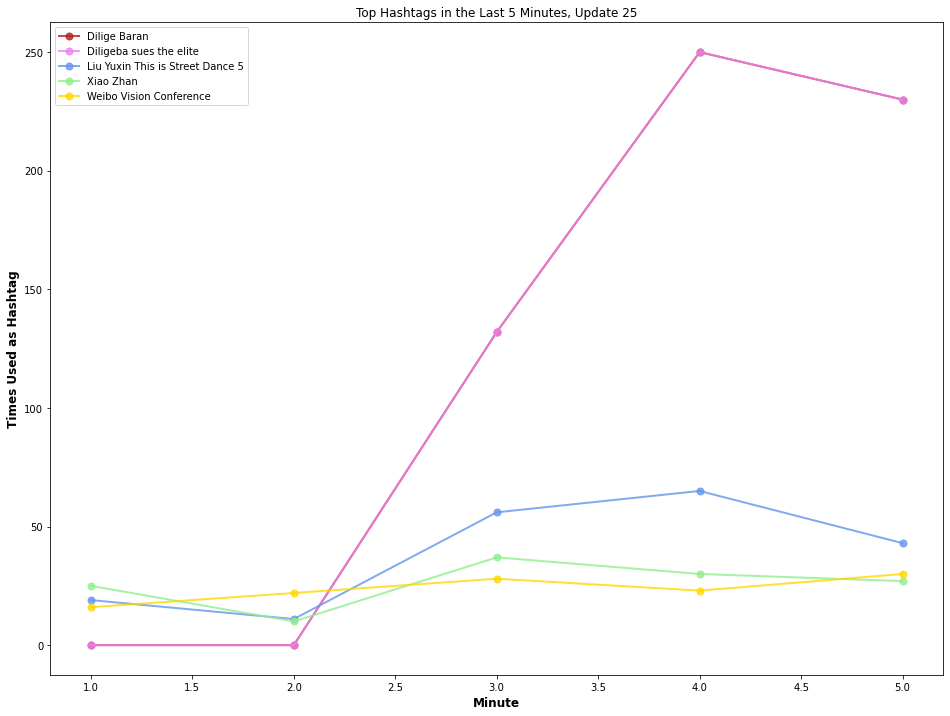

Update 26: [('迪丽热巴安旎', 818), ('迪丽热巴公诉精英', 818), ('刘雨昕这就是街舞5', 220), ('肖战', 140), ('宋亚轩法国娇兰时代代言人', 137), ('宋亚轩', 135), ('微博视界大会', 132), ('刘雨昕法国希思黎睿秀护发品牌代言人', 112), ('吴宣仪蒙面舞王', 98), ('吴宣仪五选一演唱会', 98), ('雷朋大中华区品牌代言人刘雨昕', 96), ('into1新歌天上不会掉馅饼上线', 82), ('来袭', 81), ('into1天上不会掉馅饼好魔性', 80), ('刘宇0824生日快乐', 69), ('时代少年团周边中转站', 68), ('微光荣耀入围作品', 64), ('肖战工作室', 61), ('护肤双效我都要', 58), ('天猫小黑盒', 56), ('左航', 54), ('成毅应渊帝君', 50), ('into1天上不会掉馅饼甩饼舞', 50), ('娇兰第二代双效精华', 47), ('时代少年团代言法国娇兰', 46), ('任嘉伦', 40), ('多在干什么', 39), ('刘雨昕', 38), ('santa', 38), ('每日一善', 36), ('鞠婧祎', 35), ('光遇陪玩', 34), ('微光荣耀入围人物', 33), ('微光荣耀入围影视音乐', 31), ('肖战玉骨遥', 30), ('阳光信用', 28), ('成毅沉香如屑', 26), ('sky光遇', 25), ('热烈round1贴片预告', 25), ('肖战时影', 24), ('严浩翔', 24), ('sky光遇黑市', 23), ('左航zh', 22), ('巴黎欧莱雅美发代言人杨洋', 21), ('马嘉祺法国娇兰时代代言人', 20), ('马嘉祺', 19), ('热爱', 18), ('2022', 17), ('微光荣耀五大类别推荐重磅开启', 17), ('丁程鑫', 17)]

Update 26: [('Dilige Baran', 818), ('Diligeba sues the elite', 818), ('Liu Yuxin This is Street Dance 5', 220), ('Xiao Z

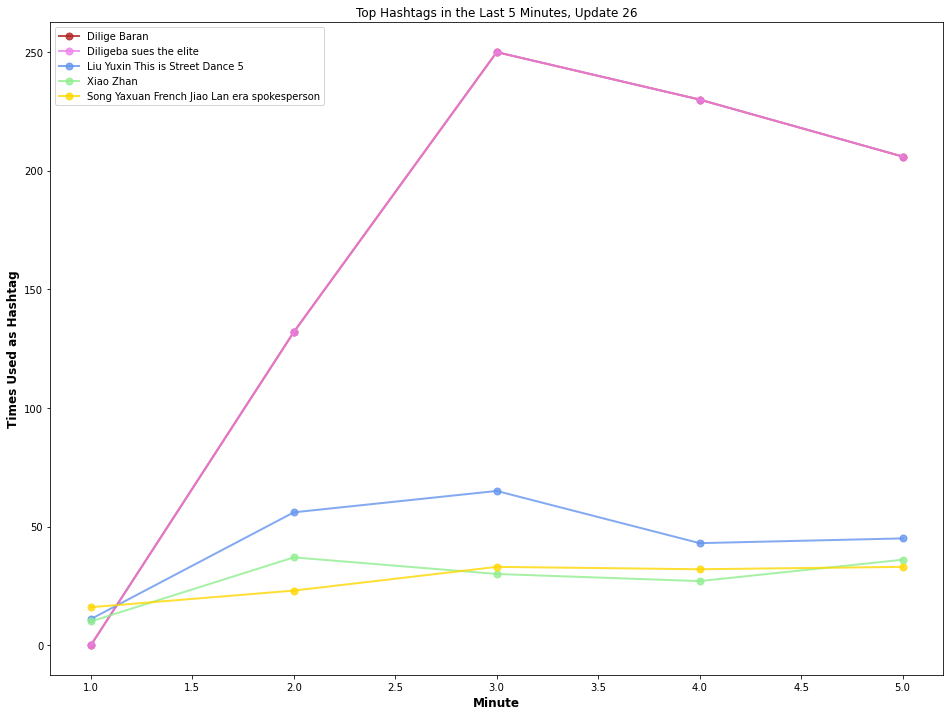

Update 27: [('迪丽热巴安旎', 1024), ('迪丽热巴公诉精英', 1024), ('刘雨昕这就是街舞5', 238), ('肖战', 155), ('宋亚轩法国娇兰时代代言人', 150), ('宋亚轩', 147), ('微博视界大会', 134), ('刘雨昕法国希思黎睿秀护发品牌代言人', 120), ('雷朋大中华区品牌代言人刘雨昕', 106), ('吴宣仪蒙面舞王', 104), ('吴宣仪五选一演唱会', 104), ('来袭', 85), ('刘宇0824生日快乐', 82), ('into1新歌天上不会掉馅饼上线', 77), ('into1天上不会掉馅饼好魔性', 76), ('时代少年团周边中转站', 74), ('微光荣耀入围作品', 67), ('肖战工作室', 64), ('护肤双效我都要', 64), ('天猫小黑盒', 61), ('左航', 56), ('成毅应渊帝君', 55), ('娇兰第二代双效精华', 52), ('时代少年团代言法国娇兰', 51), ('into1天上不会掉馅饼甩饼舞', 50), ('刘雨昕', 44), ('光遇陪玩', 42), ('鞠婧祎', 42), ('任嘉伦', 41), ('多在干什么', 39), ('santa', 38), ('每日一善', 37), ('微光荣耀入围影视音乐', 35), ('阳光信用', 34), ('sky光遇黑市', 34), ('sky光遇', 32), ('肖战玉骨遥', 30), ('肖战时影', 27), ('巴黎欧莱雅美发代言人杨洋', 27), ('热烈round1贴片预告', 25), ('微光荣耀入围人物', 24), ('严浩翔', 24), ('左航zh', 23), ('丁程鑫', 23), ('刘雨昕首张个人专辑xanadu', 22), ('成毅沉香如屑', 21), ('马嘉祺法国娇兰时代代言人', 20), ('jjy', 19), ('刘宇宁开始推理吧', 17), ('热爱', 15)]

Update 27: [('Dilige Baran', 1024), ('Diligeba sues the elite', 1024), ('Liu Yuxin This is Street Dance 5', 23

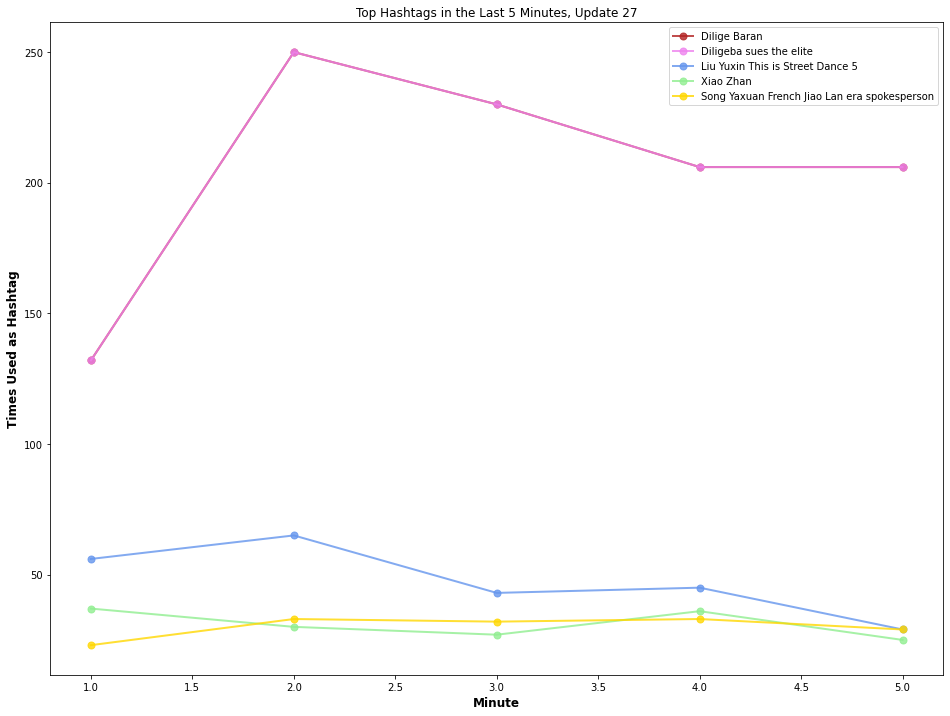

Update 28: [('迪丽热巴公诉精英', 1035), ('迪丽热巴安旎', 1034), ('刘雨昕这就是街舞5', 225), ('宋亚轩', 162), ('肖战', 158), ('宋亚轩法国娇兰时代代言人', 153), ('微博视界大会', 134), ('刘雨昕法国希思黎睿秀护发品牌代言人', 128), ('吴宣仪蒙面舞王', 89), ('吴宣仪五选一演唱会', 89), ('来袭', 87), ('雷朋大中华区品牌代言人刘雨昕', 87), ('刘宇0824生日快乐', 75), ('微光荣耀入围作品', 68), ('左航', 67), ('时代少年团周边中转站', 67), ('肖战工作室', 62), ('成毅应渊帝君', 60), ('护肤双效我都要', 56), ('天猫小黑盒', 55), ('into1新歌天上不会掉馅饼上线', 54), ('into1天上不会掉馅饼好魔性', 54), ('时代少年团代言法国娇兰', 49), ('鞠婧祎', 48), ('娇兰第二代双效精华', 47), ('刘雨昕', 45), ('阳光信用', 44), ('微光荣耀入围影视音乐', 44), ('光遇陪玩', 43), ('每日一善', 42), ('巴黎欧莱雅美发代言人杨洋', 36), ('任嘉伦', 35), ('sky光遇', 35), ('into1天上不会掉馅饼甩饼舞', 33), ('左航zh', 33), ('肖战玉骨遥', 32), ('严浩翔', 31), ('丁程鑫', 29), ('多在干什么', 28), ('sky光遇黑市', 27), ('santa', 27), ('成毅沉香如屑', 25), ('肖战时影', 22), ('刘雨昕首张个人专辑xanadu', 22), ('青年演员尹浩宇', 21), ('马嘉祺法国娇兰时代代言人', 20), ('jjy', 19), ('微光荣耀入围人物', 18), ('热烈round1贴片预告', 17), ('刘宇宁开始推理吧', 17)]

Update 28: [('Diligeba sues the elite', 1035), ('Dilige Baran', 1034), ('Liu Yuxin This is Street Dance 5', 

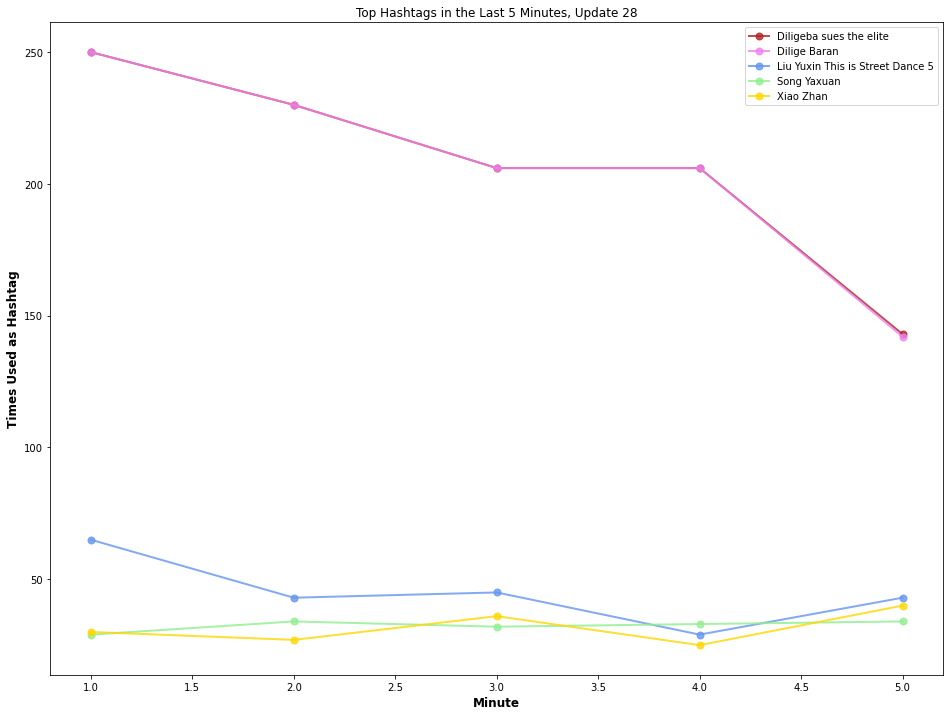

Update 29: [('迪丽热巴公诉精英', 909), ('迪丽热巴安旎', 908), ('刘雨昕这就是街舞5', 199), ('宋亚轩', 173), ('肖战', 154), ('宋亚轩法国娇兰时代代言人', 153), ('微博视界大会', 145), ('刘雨昕法国希思黎睿秀护发品牌代言人', 110), ('来袭', 89), ('雷朋大中华区品牌代言人刘雨昕', 79), ('微光荣耀入围作品', 71), ('刘宇0824生日快乐', 71), ('时代少年团周边中转站', 70), ('成毅应渊帝君', 69), ('吴宣仪蒙面舞王', 63), ('吴宣仪五选一演唱会', 63), ('肖战工作室', 59), ('护肤双效我都要', 53), ('左航', 51), ('天猫小黑盒', 51), ('时代少年团代言法国娇兰', 49), ('每日一善', 48), ('娇兰第二代双效精华', 47), ('光遇陪玩', 46), ('阳光信用', 45), ('刘雨昕', 44), ('微光荣耀入围影视音乐', 43), ('巴黎欧莱雅美发代言人杨洋', 42), ('严浩翔', 39), ('into1新歌天上不会掉馅饼上线', 38), ('into1天上不会掉馅饼好魔性', 38), ('鞠婧祎', 37), ('丁程鑫', 37), ('sky光遇黑市', 34), ('成毅沉香如屑', 33), ('任嘉伦', 31), ('肖战时影', 29), ('微光荣耀入围人物', 29), ('sky光遇', 28), ('into1天上不会掉馅饼甩饼舞', 25), ('肖战玉骨遥', 24), ('左航zh', 23), ('时代少年团', 23), ('2022', 22), ('多在干什么', 20), ('马嘉祺法国娇兰时代代言人', 20), ('沉香如屑', 20), ('santa', 19), ('微光荣耀五大类别推荐重磅开启', 17), ('热烈round1贴片预告', 17)]

Update 29: [('Diligeba sues the elite', 909), ('Dilige Baran', 908), ('Liu Yuxin This is Street Dance 5', 199), ('So

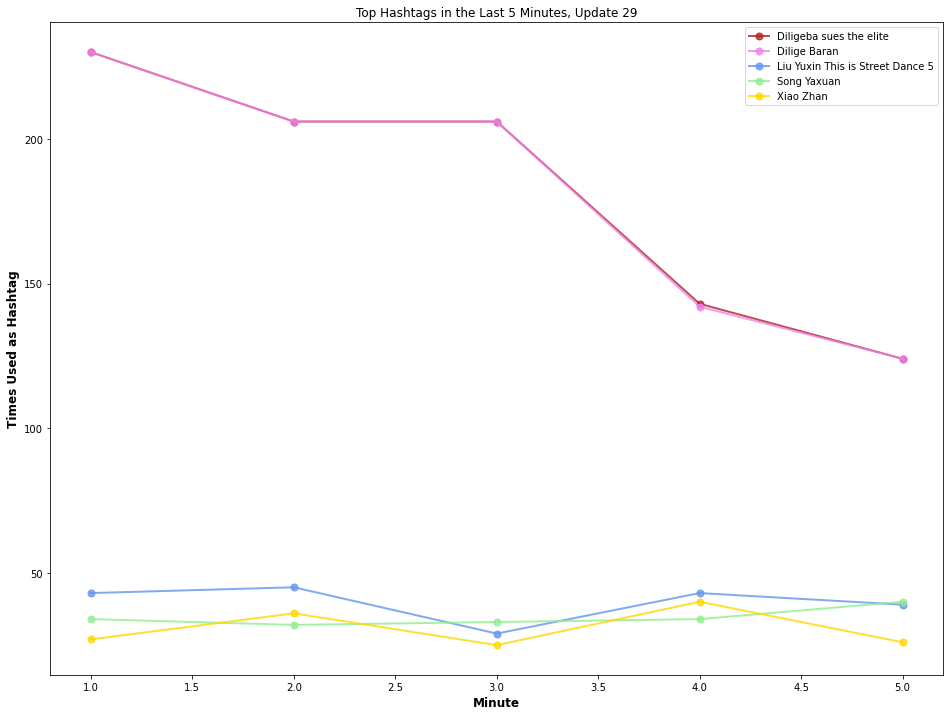

Update 30: [('迪丽热巴公诉精英', 827), ('迪丽热巴安旎', 826), ('刘雨昕这就是街舞5', 214), ('宋亚轩', 165), ('肖战', 153), ('微博视界大会', 138), ('宋亚轩法国娇兰时代代言人', 136), ('刘雨昕法国希思黎睿秀护发品牌代言人', 110), ('雷朋大中华区品牌代言人刘雨昕', 90), ('来袭', 79), ('刘宇0824生日快乐', 71), ('微光荣耀入围作品', 70), ('时代少年团周边中转站', 70), ('成毅应渊帝君', 66), ('时代少年团代言法国娇兰', 58), ('肖战工作室', 56), ('每日一善', 54), ('天猫小黑盒', 49), ('左航', 48), ('护肤双效我都要', 46), ('光遇陪玩', 45), ('吴宣仪蒙面舞王', 45), ('吴宣仪五选一演唱会', 45), ('刘雨昕', 44), ('阳光信用', 44), ('娇兰第二代双效精华', 40), ('巴黎欧莱雅美发代言人杨洋', 40), ('微光荣耀入围影视音乐', 40), ('sky光遇', 38), ('严浩翔', 38), ('鞠婧祎', 35), ('丁程鑫', 35), ('时代少年团', 35), ('成毅沉香如屑', 32), ('任嘉伦', 32), ('sky光遇黑市', 32), ('肖战时影', 29), ('微光荣耀入围人物', 23), ('肖战玉骨遥', 23), ('左航zh', 22), ('喻言寻找w计划', 20), ('王俊凯', 20), ('热爱', 18), ('jjy', 18), ('王者荣耀', 18), ('热烈round1贴片预告', 17), ('沉香如屑', 17), ('刘宇宁开始推理吧', 17), ('微光荣耀推荐', 16), ('王一博', 16)]

Update 30: [('Diligeba sues the elite', 827), ('Dilige Baran', 826), ('Liu Yuxin This is Street Dance 5', 214), ('Song Yaxuan', 165), ('Xiao Zhan', 153), ('Weibo Visi

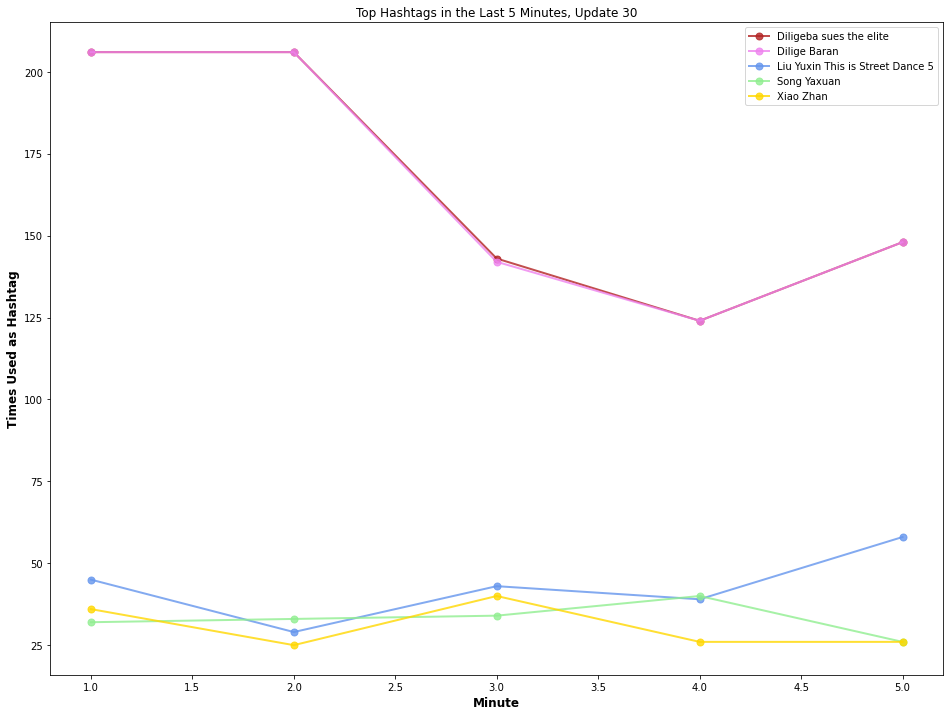

Update 31: [('迪丽热巴公诉精英', 816), ('迪丽热巴安旎', 815), ('刘雨昕这就是街舞5', 252), ('宋亚轩', 180), ('肖战', 154), ('宋亚轩法国娇兰时代代言人', 144), ('微博视界大会', 139), ('刘雨昕法国希思黎睿秀护发品牌代言人', 118), ('雷朋大中华区品牌代言人刘雨昕', 100), ('成毅应渊帝君', 80), ('来袭', 78), ('刘宇0824生日快乐', 78), ('微光荣耀入围作品', 76), ('时代少年团周边中转站', 70), ('左航', 58), ('时代少年团代言法国娇兰', 58), ('每日一善', 54), ('阳光信用', 51), ('肖战工作室', 50), ('天猫小黑盒', 47), ('光遇陪玩', 46), ('任嘉伦', 46), ('护肤双效我都要', 45), ('成毅沉香如屑', 42), ('时代少年团', 41), ('娇兰第二代双效精华', 40), ('刘雨昕', 37), ('热烈round1贴片预告', 36), ('左航zh', 33), ('鞠婧祎', 32), ('严浩翔', 32), ('微光荣耀入围影视音乐', 31), ('巴黎欧莱雅美发代言人杨洋', 30), ('肖战时影', 29), ('sky光遇', 29), ('丁程鑫', 28), ('赵露思月升沧海', 28), ('sky光遇黑市', 24), ('肖战玉骨遥', 24), ('赵露思程少商', 24), ('朱志鑫', 23), ('赵露思星汉灿烂', 23), ('2022', 22), ('心疼时代少年团', 21), ('喻言寻找w计划', 20), ('热爱', 18), ('微光荣耀入围人物', 17), ('微光荣耀五大类别推荐重磅开启', 17), ('沉香如屑', 17), ('刘雨昕康维他全球代言人', 17)]

Update 31: [('Diligeba sues the elite', 816), ('Dilige Baran', 815), ('Liu Yuxin This is Street Dance 5', 252), ('Song Yaxuan', 180), ('Xiao Zhan', 1

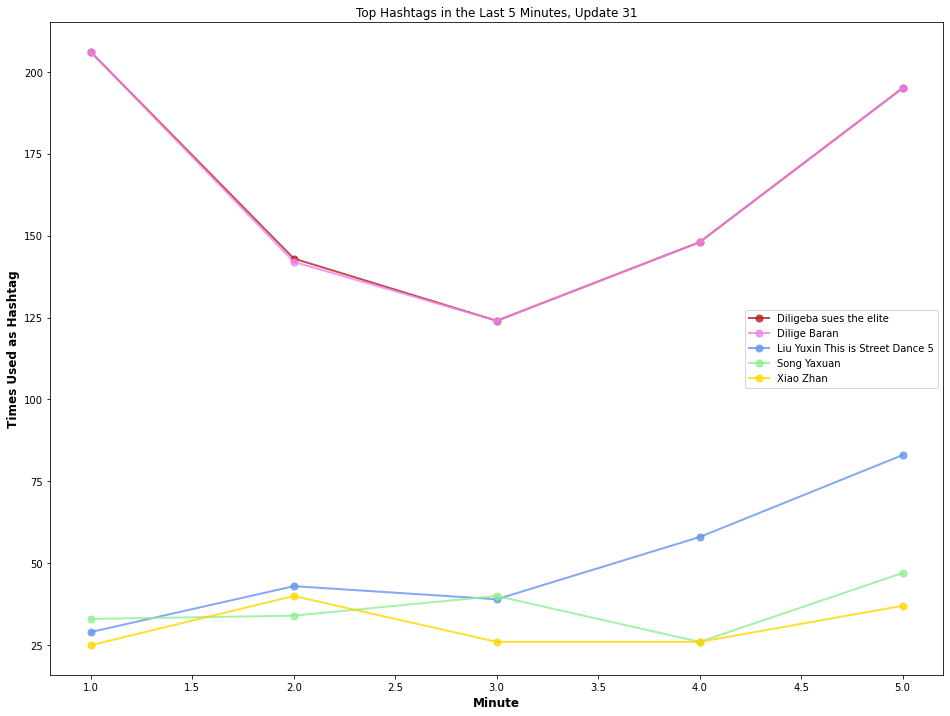

Update 32: [('迪丽热巴安旎', 801), ('迪丽热巴公诉精英', 801), ('刘雨昕这就是街舞5', 262), ('宋亚轩', 175), ('肖战', 155), ('宋亚轩法国娇兰时代代言人', 141), ('微博视界大会', 140), ('刘雨昕法国希思黎睿秀护发品牌代言人', 116), ('雷朋大中华区品牌代言人刘雨昕', 108), ('成毅应渊帝君', 95), ('来袭', 80), ('刘宇0824生日快乐', 77), ('微光荣耀入围作品', 74), ('时代少年团周边中转站', 66), ('左航', 61), ('成毅沉香如屑', 58), ('每日一善', 55), ('热烈round1贴片预告', 55), ('肖战工作室', 54), ('阳光信用', 49), ('时代少年团代言法国娇兰', 47), ('任嘉伦', 46), ('光遇陪玩', 38), ('鞠婧祎', 38), ('刘雨昕', 37), ('天猫小黑盒', 36), ('赵露思月升沧海', 36), ('左航zh', 35), ('巴黎欧莱雅美发代言人杨洋', 34), ('时代少年团', 34), ('护肤双效我都要', 33), ('严浩翔', 32), ('赵露思程少商', 32), ('赵露思星汉灿烂', 31), ('娇兰第二代双效精华', 30), ('微光荣耀入围影视音乐', 30), ('热爱', 27), ('微光荣耀入围人物', 25), ('青年演员尹浩宇', 25), ('沉香如屑', 25), ('肖战玉骨遥', 24), ('肖战肖春生', 24), ('肖战时影', 23), ('2022', 22), ('丁程鑫', 22), ('sky光遇黑市', 21), ('喻言寻找w计划', 20), ('sky光遇', 19), ('微光荣耀五大类别推荐重磅开启', 17), ('刘雨昕康维他全球代言人', 17)]

Update 32: [('Dilige Baran', 801), ('Diligeba sues the elite', 801), ('Liu Yuxin This is Street Dance 5', 262), ('Song Yaxuan', 175), ('Xiao Zhan',

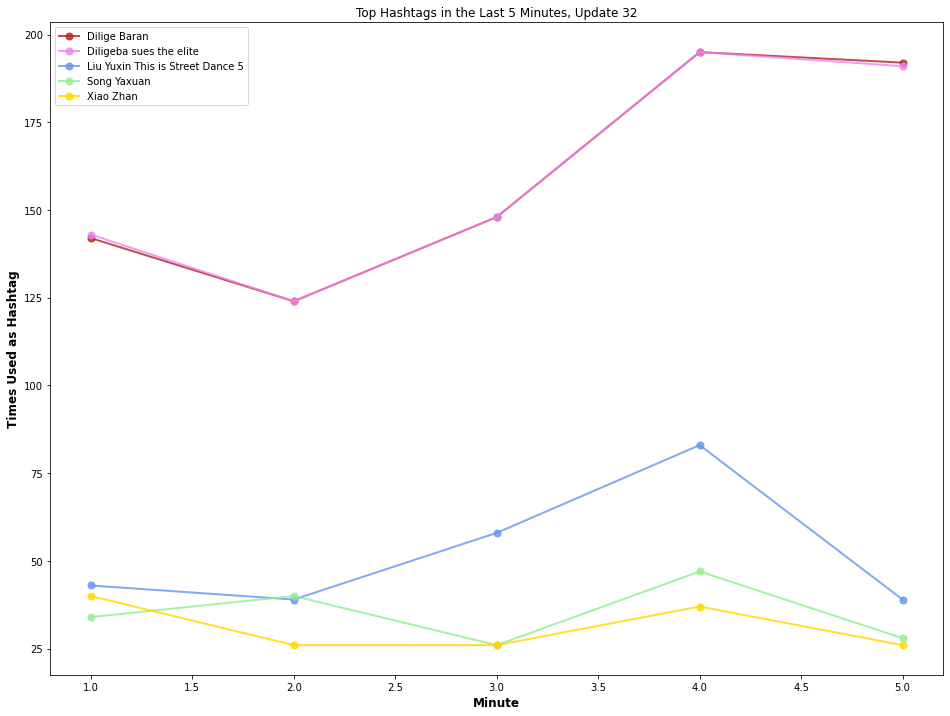

Update 33: [('迪丽热巴安旎', 852), ('迪丽热巴公诉精英', 850), ('刘雨昕这就是街舞5', 258), ('宋亚轩', 170), ('宋亚轩法国娇兰时代代言人', 145), ('肖战', 142), ('微博视界大会', 131), ('雷朋大中华区品牌代言人刘雨昕', 123), ('刘雨昕法国希思黎睿秀护发品牌代言人', 97), ('刘宇0824生日快乐', 90), ('成毅应渊帝君', 89), ('微光荣耀入围作品', 74), ('来袭', 69), ('时代少年团周边中转站', 69), ('左航', 57), ('每日一善', 57), ('热烈round1贴片预告', 57), ('成毅沉香如屑', 51), ('肖战工作室', 50), ('任嘉伦', 47), ('鞠婧祎', 43), ('刘雨昕', 38), ('阳光信用', 36), ('赵露思月升沧海', 36), ('光遇陪玩', 34), ('时代少年团代言法国娇兰', 34), ('左航zh', 32), ('赵露思程少商', 32), ('天猫小黑盒', 31), ('赵露思星汉灿烂', 31), ('沉香如屑', 30), ('护肤双效我都要', 28), ('热爱', 27), ('微光荣耀入围人物', 26), ('时代少年团', 26), ('巴黎欧莱雅美发代言人杨洋', 25), ('严浩翔', 25), ('2022', 23), ('微光荣耀五大类别推荐重磅开启', 23), ('刘耀文', 23), ('娇兰第二代双效精华', 21), ('微光荣耀入围影视音乐', 21), ('sky光遇黑市', 21), ('肖战玉骨遥', 21), ('jjy', 20), ('喻言寻找w计划', 19), ('肖战肖春生', 17), ('刘雨昕康维他全球代言人', 17), ('青年演员尹浩宇', 16), ('丁程鑫', 16)]

Update 33: [('Dilige Baran', 852), ('Diligeba sues the elite', 850), ('Liu Yuxin This is Street Dance 5', 258), ('Song Yaxuan', 170), ('Song Yaxuan Fre

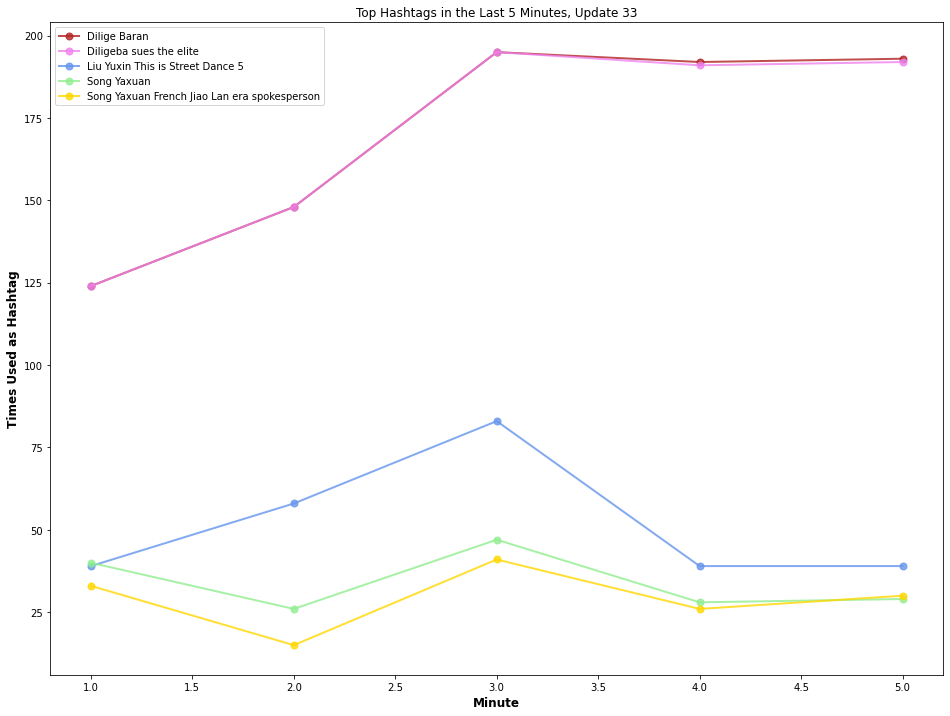

Update 34: [('迪丽热巴安旎', 744), ('迪丽热巴公诉精英', 742), ('刘雨昕这就是街舞5', 267), ('宋亚轩', 156), ('肖战', 146), ('宋亚轩法国娇兰时代代言人', 144), ('雷朋大中华区品牌代言人刘雨昕', 130), ('微博视界大会', 125), ('刘雨昕法国希思黎睿秀护发品牌代言人', 100), ('成毅应渊帝君', 94), ('刘宇0824生日快乐', 90), ('微光荣耀入围作品', 75), ('左航', 65), ('来袭', 63), ('热烈round1贴片预告', 60), ('时代少年团周边中转站', 59), ('成毅沉香如屑', 58), ('肖战工作室', 57), ('鞠婧祎', 50), ('任嘉伦', 49), ('每日一善', 44), ('赵露思月升沧海', 36), ('刘雨昕', 33), ('光遇陪玩', 32), ('天猫小黑盒', 32), ('左航zh', 32), ('赵露思程少商', 32), ('赵露思星汉灿烂', 31), ('肖战玉骨遥', 30), ('时代少年团代言法国娇兰', 29), ('阳光信用', 28), ('jjy', 27), ('沉香如屑', 26), ('时代少年团', 26), ('青年演员尹浩宇', 25), ('严浩翔', 24), ('微光荣耀推荐', 23), ('刘耀文', 23), ('微光荣耀入围人物', 22), ('护肤双效我都要', 22), ('朱志鑫', 22), ('热爱', 20), ('2022', 19), ('微光荣耀五大类别推荐重磅开启', 19), ('巴黎欧莱雅美发代言人杨洋', 19), ('微光荣耀入围影视音乐', 19), ('喻言寻找w计划', 19), ('肖战时影', 18), ('刘宇宁开始推理吧', 18), ('刘雨昕康维他全球代言人', 17)]

Update 34: [('Dilige Baran', 744), ('Diligeba sues the elite', 742), ('Liu Yuxin This is Street Dance 5', 267), ('Song Yaxuan', 156), ('Xiao Zhan', 146),

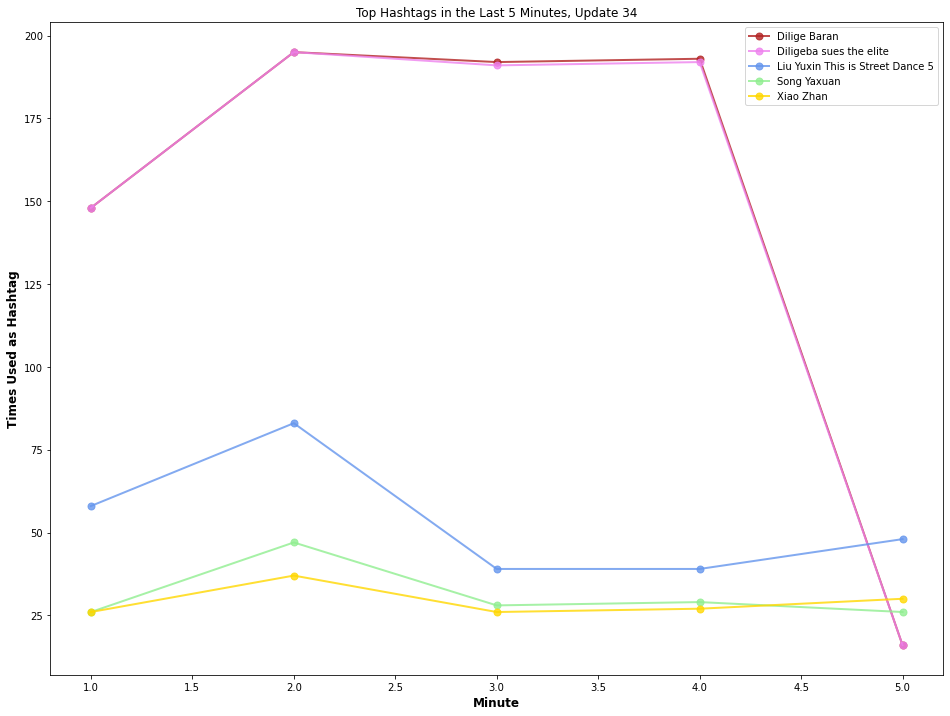

Update 35: [('迪丽热巴安旎', 726), ('迪丽热巴公诉精英', 724), ('刘雨昕这就是街舞5', 242), ('肖战', 151), ('宋亚轩', 149), ('宋亚轩法国娇兰时代代言人', 145), ('微博视界大会', 130), ('雷朋大中华区品牌代言人刘雨昕', 129), ('成毅应渊帝君', 103), ('刘宇0824生日快乐', 94), ('刘雨昕法国希思黎睿秀护发品牌代言人', 82), ('微光荣耀入围作品', 77), ('左航', 71), ('来袭', 71), ('热烈round1贴片预告', 69), ('肖战工作室', 59), ('成毅沉香如屑', 57), ('时代少年团周边中转站', 56), ('鞠婧祎', 49), ('任嘉伦', 46), ('每日一善', 45), ('刘雨昕', 44), ('左航zh', 35), ('光遇陪玩', 33), ('阳光信用', 33), ('沉香如屑', 28), ('jjy', 27), ('天猫小黑盒', 25), ('青年演员尹浩宇', 25), ('肖战时影', 24), ('肖战玉骨遥', 24), ('赵露思月升沧海', 24), ('喻言寻找w计划', 23), ('微光荣耀入围人物', 22), ('护肤双效我都要', 22), ('朱志鑫', 22), ('微光荣耀推荐', 21), ('微光荣耀入围影视音乐', 21), ('时代少年团代言法国娇兰', 20), ('赵露思程少商', 20), ('赵露思星汉灿烂', 20), ('2022', 19), ('微光荣耀五大类别推荐重磅开启', 19), ('巴黎欧莱雅美发代言人杨洋', 18), ('刘耀文', 18), ('刘宇宁开始推理吧', 18), ('马嘉祺', 17), ('刘雨昕康维他全球代言人', 17), ('sky光遇黑市', 16), ('into1尹浩宇队内海外人气断层top1', 16)]

Update 35: [('Dilige Baran', 726), ('Diligeba sues the elite', 724), ('Liu Yuxin This is Street Dance 5', 242), ('Xiao Zhan', 151), (

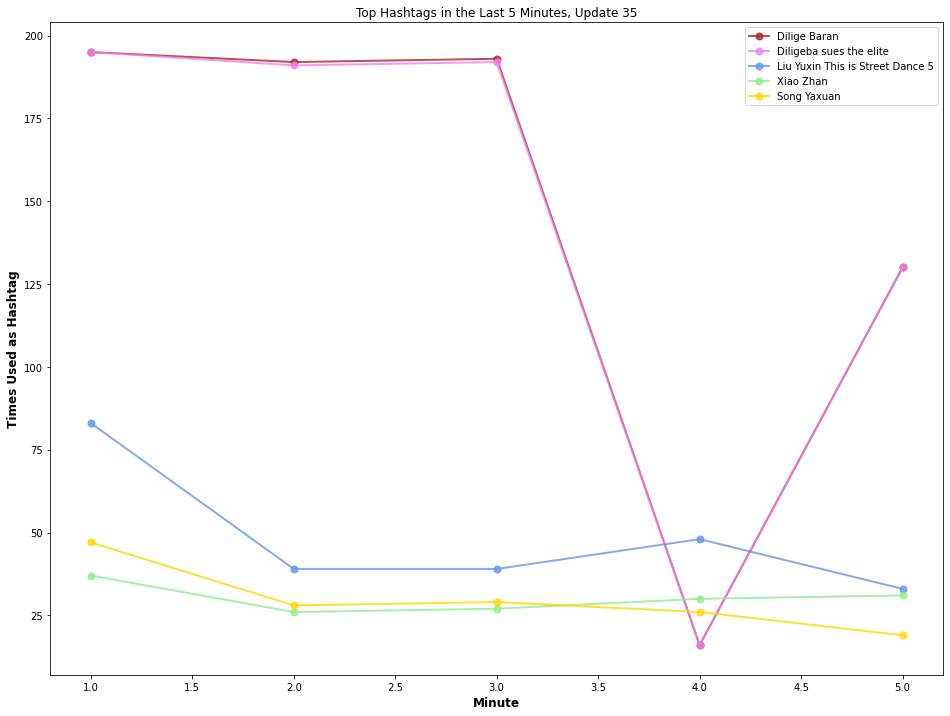

Update 36: [('迪丽热巴安旎', 783), ('迪丽热巴公诉精英', 781), ('刘雨昕这就是街舞5', 211), ('肖战', 154), ('微博视界大会', 131), ('宋亚轩法国娇兰时代代言人', 126), ('宋亚轩', 125), ('雷朋大中华区品牌代言人刘雨昕', 123), ('刘宇0824生日快乐', 107), ('成毅应渊帝君', 95), ('来袭', 77), ('左航', 75), ('刘雨昕法国希思黎睿秀护发品牌代言人', 74), ('微光荣耀入围作品', 70), ('时代少年团周边中转站', 60), ('肖战工作室', 57), ('成毅沉香如屑', 56), ('鞠婧祎', 53), ('热烈round1贴片预告', 50), ('每日一善', 45), ('刘雨昕', 45), ('任嘉伦', 39), ('左航zh', 36), ('jjy', 35), ('青年演员尹浩宇', 34), ('光遇陪玩', 33), ('微光荣耀入围人物', 31), ('微光荣耀入围影视音乐', 29), ('沉香如屑', 28), ('巴黎欧莱雅美发代言人杨洋', 27), ('阳光信用', 26), ('肖战时影', 25), ('sky光遇黑市', 24), ('肖战玉骨遥', 23), ('into1尹浩宇队内海外人气断层top1', 23), ('into1尹浩宇混血神颜门面ace', 23), ('into1尹浩宇killing', 23), ('尹浩宇是时尚达人', 23), ('掉系爱豆尹浩宇', 23), ('尹浩宇fashion同款科普', 23), ('微光荣耀推荐', 21), ('你是我的荣耀开播一周年', 18), ('刘耀文', 18), ('刘宇宁开始推理吧', 18), ('天猫小黑盒', 17), ('马嘉祺', 17), ('喻言寻找w计划', 16), ('时代少年团', 16), ('赵露思月升沧海', 16), ('肖战肖春生', 15)]

Update 36: [('Dilige Baran', 783), ('Diligeba sues the elite', 781), ('Liu Yuxin This is Street Dance 5', 211), ('

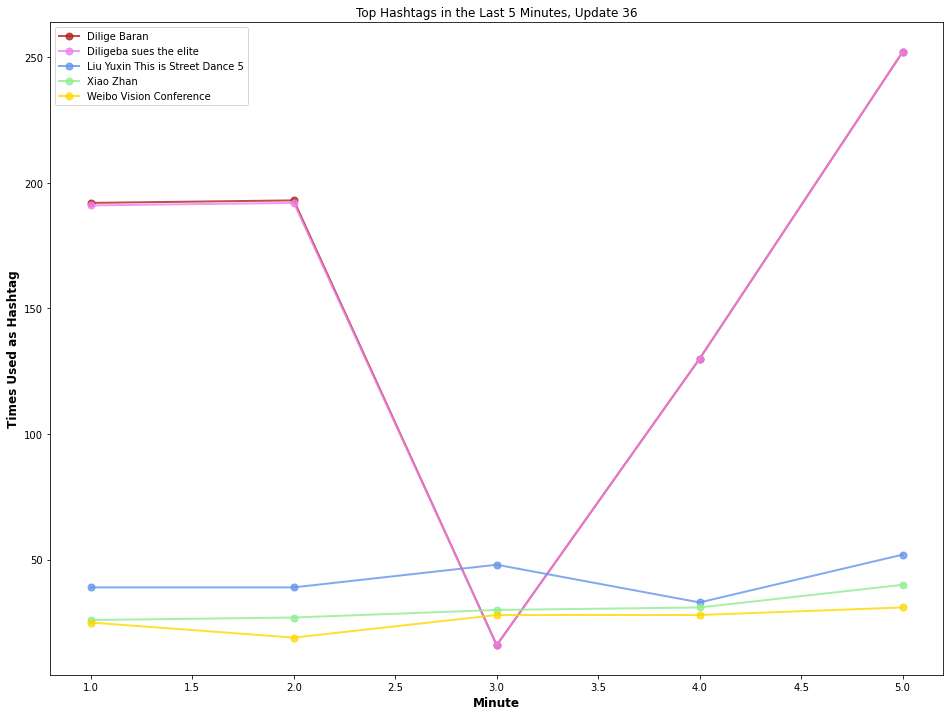

Update 37: [('迪丽热巴安旎', 835), ('迪丽热巴公诉精英', 834), ('刘雨昕这就是街舞5', 224), ('肖战', 159), ('宋亚轩法国娇兰时代代言人', 135), ('宋亚轩', 133), ('微博视界大会', 132), ('雷朋大中华区品牌代言人刘雨昕', 122), ('刘宇0824生日快乐', 103), ('成毅应渊帝君', 89), ('刘雨昕法国希思黎睿秀护发品牌代言人', 83), ('左航', 78), ('微光荣耀入围作品', 75), ('来袭', 73), ('时代少年团周边中转站', 65), ('肖战工作室', 56), ('成毅沉香如屑', 54), ('鞠婧祎', 43), ('任嘉伦', 43), ('刘雨昕', 43), ('热烈round1贴片预告', 43), ('光遇陪玩', 38), ('每日一善', 36), ('左航zh', 36), ('微光荣耀入围人物', 31), ('巴黎欧莱雅美发代言人杨洋', 30), ('微光荣耀推荐', 28), ('jjy', 28), ('沉香如屑', 27), ('肖战时影', 25), ('你是我的荣耀开播一周年', 25), ('青年演员尹浩宇', 24), ('肖战玉骨遥', 23), ('微光荣耀入围影视音乐', 22), ('sky光遇', 22), ('时代少年团', 21), ('朱志鑫', 18), ('天猫小黑盒', 17), ('2022', 17), ('微光荣耀五大类别推荐重磅开启', 17), ('马嘉祺', 17), ('成毅', 17), ('阳光信用', 16), ('sky光遇黑市', 16), ('喻言寻找w计划', 16), ('时代少年团代言法国娇兰', 14), ('严浩翔', 13), ('into1尹浩宇队内海外人气断层top1', 13), ('into1尹浩宇混血神颜门面ace', 13), ('into1尹浩宇killing', 13)]

Update 37: [('Dilige Baran', 835), ('Diligeba sues the elite', 834), ('Liu Yuxin This is Street Dance 5', 224), ('Xiao Zhan'

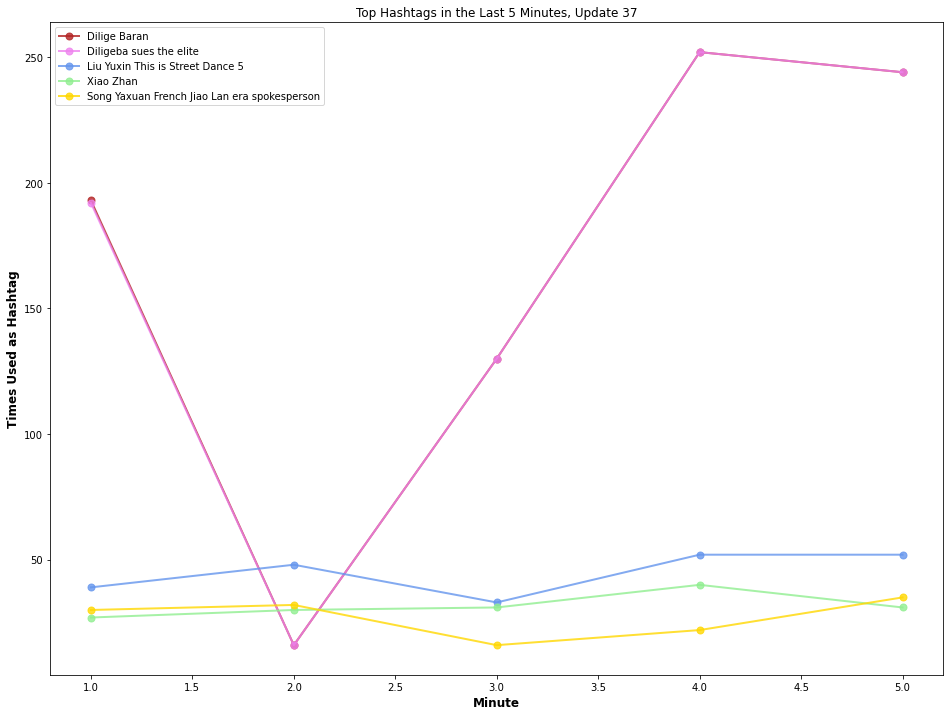

Update 38: [('迪丽热巴安旎', 826), ('迪丽热巴公诉精英', 826), ('刘雨昕这就是街舞5', 239), ('肖战', 164), ('宋亚轩', 149), ('宋亚轩法国娇兰时代代言人', 133), ('微博视界大会', 132), ('雷朋大中华区品牌代言人刘雨昕', 116), ('刘雨昕法国希思黎睿秀护发品牌代言人', 108), ('刘宇0824生日快乐', 104), ('成毅应渊帝君', 91), ('来袭', 78), ('左航', 74), ('微光荣耀入围作品', 70), ('时代少年团周边中转站', 62), ('肖战工作室', 60), ('成毅沉香如屑', 54), ('鞠婧祎', 53), ('任嘉伦', 45), ('刘雨昕', 43), ('巴黎欧莱雅美发代言人杨洋', 42), ('光遇陪玩', 40), ('肖战时影', 38), ('左航zh', 34), ('热烈round1贴片预告', 33), ('jjy', 33), ('微光荣耀入围人物', 31), ('肖战玉骨遥', 28), ('sky光遇', 28), ('沉香如屑', 27), ('时代少年团', 26), ('青年演员尹浩宇', 24), ('微光荣耀推荐', 23), ('微光荣耀入围影视音乐', 22), ('她是能词曲创作', 21), ('每日一善', 20), ('你是我的荣耀开播一周年', 20), ('肖战肖春生', 19), ('天猫小黑盒', 18), ('喻言寻找w计划', 17), ('countonlove倚爱之名', 17), ('自由释爱', 17), ('成毅', 17), ('sky光遇黑市', 16), ('任嘉伦陆炎', 16), ('互评', 15), ('时代少年团代言法国娇兰', 14), ('朱志鑫', 14), ('严浩翔', 13), ('into1尹浩宇队内海外人气断层top1', 13)]

Update 38: [('Dilige Baran', 826), ('Diligeba sues the elite', 826), ('Liu Yuxin This is Street Dance 5', 239), ('Xiao Zhan', 164), ('Song Yax

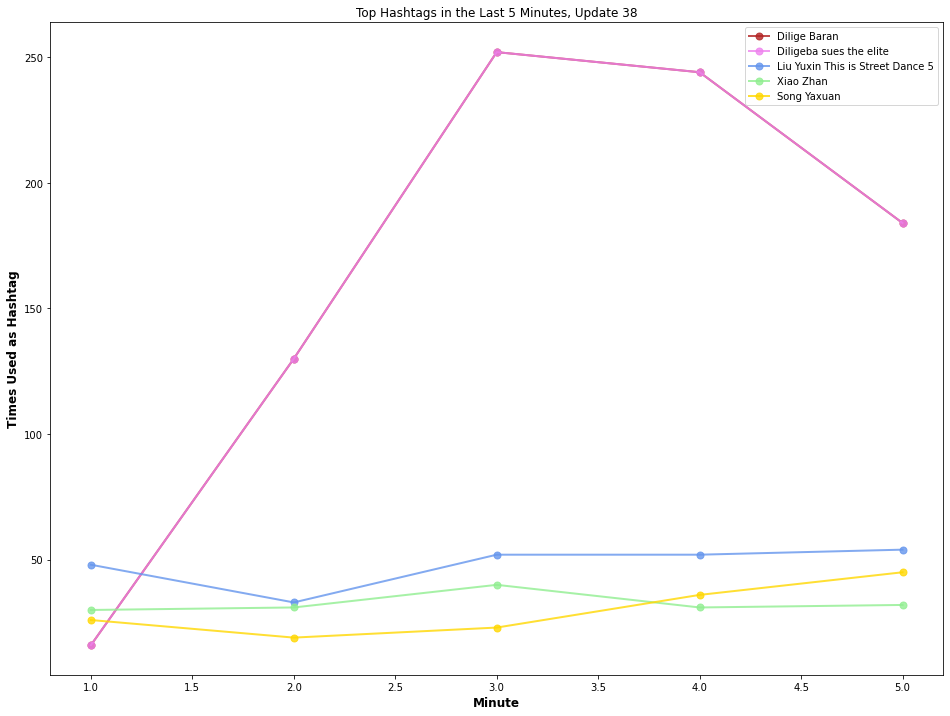

Update 39: [('迪丽热巴安旎', 982), ('迪丽热巴公诉精英', 982), ('刘雨昕这就是街舞5', 240), ('宋亚轩', 169), ('肖战', 165), ('宋亚轩法国娇兰时代代言人', 143), ('微博视界大会', 134), ('雷朋大中华区品牌代言人刘雨昕', 123), ('刘宇0824生日快乐', 116), ('刘雨昕法国希思黎睿秀护发品牌代言人', 100), ('成毅应渊帝君', 92), ('来袭', 84), ('左航', 72), ('时代少年团周边中转站', 65), ('微光荣耀入围作品', 64), ('肖战工作室', 58), ('任嘉伦', 56), ('成毅沉香如屑', 47), ('鞠婧祎', 46), ('刘雨昕', 42), ('巴黎欧莱雅美发代言人杨洋', 42), ('肖战时影', 39), ('微光荣耀入围人物', 39), ('光遇陪玩', 38), ('左航zh', 34), ('沉香如屑', 34), ('sky光遇', 34), ('每日一善', 33), ('jjy', 33), ('热烈round1贴片预告', 28), ('肖战玉骨遥', 28), ('任嘉伦陆炎', 27), ('喻言寻找w计划', 24), ('时代少年团', 24), ('马嘉祺', 23), ('成毅', 23), ('阳光信用', 21), ('她是能词曲创作', 21), ('任嘉伦无忧渡', 21), ('你是我的荣耀开播一周年', 20), ('countonlove倚爱之名', 17), ('自由释爱', 17), ('微光荣耀入围影视音乐', 16), ('sky光遇黑市', 16), ('任嘉伦请君', 16), ('天猫小黑盒', 15), ('时代少年团代言法国娇兰', 15), ('青年演员尹浩宇', 15), ('任嘉伦宣夜', 15), ('微博渔场', 15)]

Update 39: [('Dilige Baran', 982), ('Diligeba sues the elite', 982), ('Liu Yuxin This is Street Dance 5', 240), ('Song Yaxuan', 169), ('Xiao Zhan', 165), 

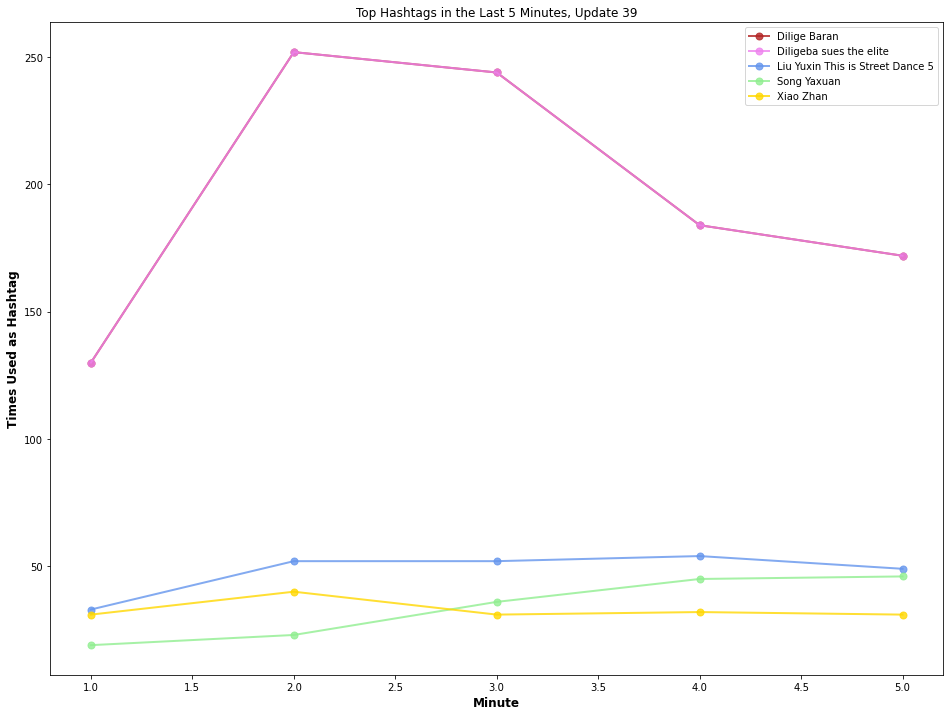

Update 40: [('迪丽热巴安旎', 1086), ('迪丽热巴公诉精英', 1086), ('刘雨昕这就是街舞5', 240), ('宋亚轩', 188), ('宋亚轩法国娇兰时代代言人', 167), ('肖战', 166), ('微博视界大会', 134), ('刘宇0824生日快乐', 130), ('雷朋大中华区品牌代言人刘雨昕', 123), ('刘雨昕法国希思黎睿秀护发品牌代言人', 99), ('成毅应渊帝君', 87), ('来袭', 85), ('时代少年团周边中转站', 69), ('左航', 65), ('微光荣耀入围作品', 63), ('肖战工作室', 59), ('任嘉伦', 56), ('鞠婧祎', 47), ('微光荣耀入围人物', 47), ('成毅沉香如屑', 46), ('肖战时影', 42), ('巴黎欧莱雅美发代言人杨洋', 42), ('光遇陪玩', 38), ('刘雨昕', 38), ('肖战玉骨遥', 38), ('沉香如屑', 35), ('jjy', 34), ('任嘉伦陆炎', 33), ('热烈round1贴片预告', 29), ('你是我的荣耀开播一周年', 29), ('马嘉祺', 29), ('sky光遇', 27), ('每日一善', 26), ('左航zh', 25), ('时代少年团', 24), ('喻言寻找w计划', 23), ('任嘉伦请君', 22), ('天猫小黑盒', 21), ('countonlove倚爱之名', 19), ('自由释爱', 19), ('朱志鑫', 18), ('时代少年团代言法国娇兰', 15), ('微光荣耀入围影视音乐', 15), ('青年演员尹浩宇', 15), ('任嘉伦宣夜', 15), ('互评', 15), ('成毅', 15), ('任嘉伦无忧渡', 15), ('微博渔场', 15), ('刘宇国风美少年', 15)]

Update 40: [('Dilige Baran', 1086), ('Diligeba sues the elite', 1086), ('Liu Yuxin This is Street Dance 5', 240), ('Song Yaxuan', 188), ('Song Yaxuan French Ji

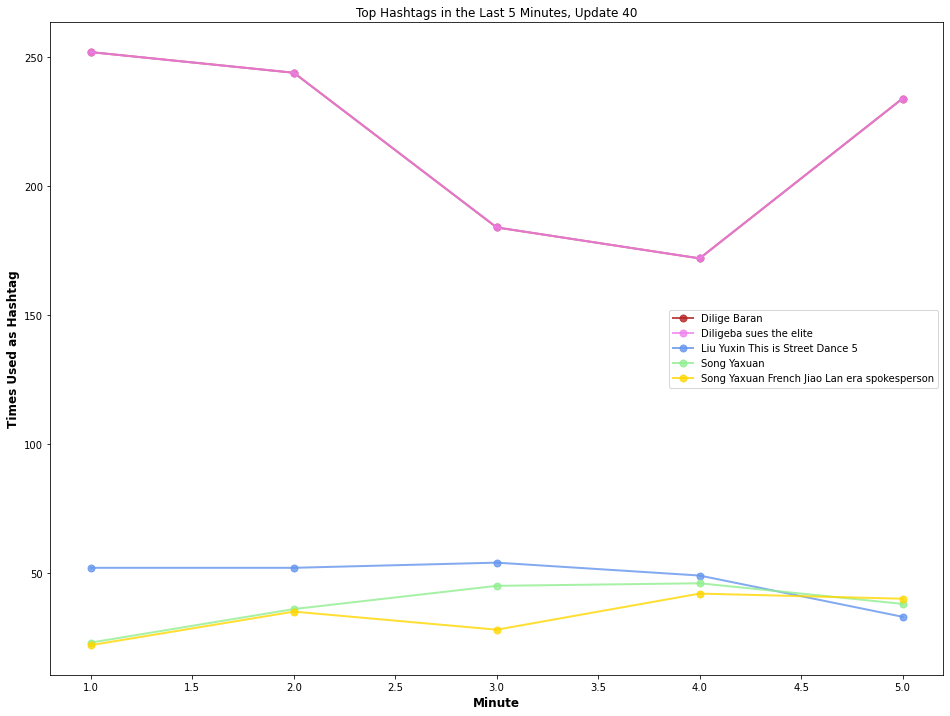

Update 41: [('迪丽热巴安旎', 920), ('迪丽热巴公诉精英', 920), ('刘雨昕这就是街舞5', 216), ('宋亚轩', 207), ('宋亚轩法国娇兰时代代言人', 192), ('肖战', 160), ('微博视界大会', 135), ('刘宇0824生日快乐', 120), ('雷朋大中华区品牌代言人刘雨昕', 106), ('成毅应渊帝君', 101), ('刘雨昕法国希思黎睿秀护发品牌代言人', 93), ('来袭', 80), ('肖战工作室', 67), ('时代少年团周边中转站', 62), ('微光荣耀入围作品', 61), ('任嘉伦', 57), ('左航', 54), ('微光荣耀入围人物', 48), ('成毅沉香如屑', 47), ('肖战时影', 44), ('沉香如屑', 43), ('刘雨昕', 42), ('肖战玉骨遥', 41), ('马嘉祺', 39), ('鞠婧祎', 35), ('巴黎欧莱雅美发代言人杨洋', 33), ('朱志鑫', 32), ('与高卿尘同观日暮星河', 32), ('每日一善', 30), ('天猫小黑盒', 29), ('热烈round1贴片预告', 29), ('光遇陪玩', 28), ('sky光遇', 27), ('任嘉伦陆炎', 27), ('jjy', 26), ('喻言寻找w计划', 23), ('时代少年团代言法国娇兰', 22), ('任嘉伦请君', 22), ('2022', 21), ('刘宇国风美少年', 21), ('高卿尘into1唯一高音主唱', 21), ('阳光信用', 20), ('微光荣耀五大类别推荐重磅开启', 20), ('左航zh', 19), ('countonlove倚爱之名', 19), ('自由释爱', 19), ('刘宇宁开始推理吧', 19), ('青年演员尹浩宇', 17), ('微光荣耀入围影视音乐', 16), ('时代少年团', 16)]

Update 41: [('Dilige Baran', 920), ('Diligeba sues the elite', 920), ('Liu Yuxin This is Street Dance 5', 216), ('Song Yaxuan', 207), ('

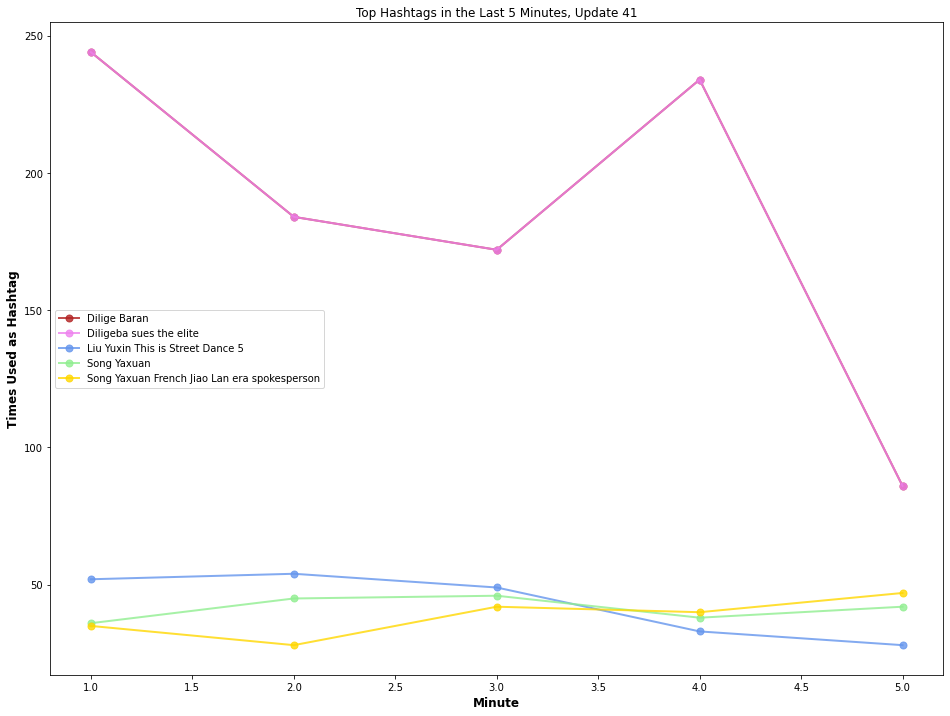

Update 42: [('迪丽热巴安旎', 676), ('迪丽热巴公诉精英', 676), ('宋亚轩', 206), ('宋亚轩法国娇兰时代代言人', 193), ('刘雨昕这就是街舞5', 188), ('肖战', 152), ('微博视界大会', 133), ('刘宇0824生日快乐', 118), ('雷朋大中华区品牌代言人刘雨昕', 104), ('成毅应渊帝君', 102), ('来袭', 83), ('刘雨昕法国希思黎睿秀护发品牌代言人', 78), ('肖战工作室', 67), ('时代少年团周边中转站', 65), ('微光荣耀入围作品', 57), ('任嘉伦', 51), ('肖战时影', 50), ('沉香如屑', 50), ('左航', 46), ('微光荣耀入围人物', 46), ('马嘉祺', 46), ('成毅沉香如屑', 45), ('刘雨昕', 45), ('肖战玉骨遥', 41), ('与高卿尘同观日暮星河', 39), ('天猫小黑盒', 35), ('光遇陪玩', 32), ('鞠婧祎', 28), ('巴黎欧莱雅美发代言人杨洋', 27), ('jjy', 26), ('朱志鑫', 26), ('青年演员尹浩宇', 25), ('微光荣耀入围影视音乐', 24), ('时代少年团代言法国娇兰', 23), ('每日一善', 23), ('喻言寻找w计划', 23), ('任嘉伦陆炎', 22), ('任嘉伦请君', 22), ('刘宇国风美少年', 21), ('高卿尘into1唯一高音主唱', 21), ('阳光信用', 20), ('countonlove倚爱之名', 19), ('自由释爱', 19), ('肖战bubly微笑趣泡代言人', 19), ('刘宇宁开始推理吧', 19), ('sky光遇', 18), ('不可错过的亚洲帅哥高卿尘', 18), ('热烈round1贴片预告', 17), ('2022', 16), ('微光荣耀五大类别推荐重磅开启', 15)]

Update 42: [('Dilige Baran', 676), ('Diligeba sues the elite', 676), ('Song Yaxuan', 206), ('Song Yaxuan French Jiao La

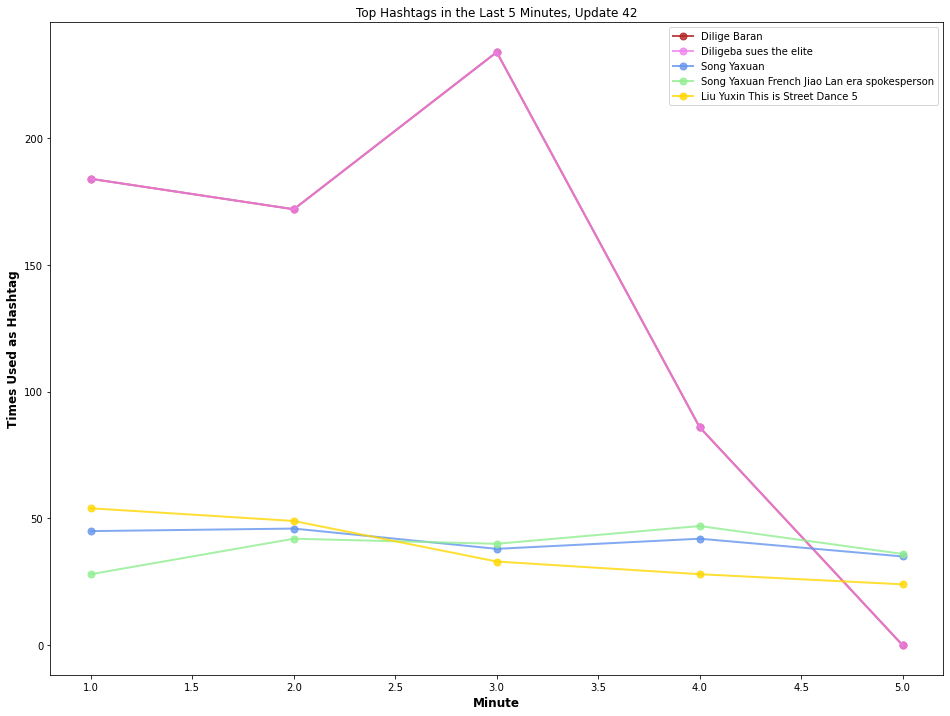

Update 43: [('迪丽热巴安旎', 492), ('迪丽热巴公诉精英', 492), ('刘雨昕这就是街舞5', 197), ('宋亚轩法国娇兰时代代言人', 191), ('宋亚轩', 190), ('肖战', 152), ('微博视界大会', 135), ('雷朋大中华区品牌代言人刘雨昕', 113), ('刘宇0824生日快乐', 103), ('成毅应渊帝君', 98), ('来袭', 80), ('刘雨昕法国希思黎睿秀护发品牌代言人', 70), ('时代少年团周边中转站', 67), ('肖战工作室', 66), ('微光荣耀入围作品', 58), ('与高卿尘同观日暮星河', 56), ('沉香如屑', 51), ('微光荣耀入围人物', 49), ('左航', 46), ('刘雨昕', 46), ('马嘉祺', 46), ('肖战时影', 45), ('任嘉伦', 41), ('成毅沉香如屑', 40), ('肖战玉骨遥', 38), ('天猫小黑盒', 36), ('青年演员尹浩宇', 36), ('朱志鑫', 33), ('时代少年团代言法国娇兰', 30), ('每日一善', 30), ('高卿尘into1唯一高音主唱', 30), ('不可错过的亚洲帅哥高卿尘', 29), ('巴黎欧莱雅美发代言人杨洋', 27), ('光遇陪玩', 24), ('微光荣耀入围影视音乐', 24), ('热烈round1贴片预告', 24), ('肖战bubly微笑趣泡代言人', 21), ('刘宇国风美少年', 21), ('赵露思月升沧海', 21), ('阳光信用', 20), ('刘宇宁开始推理吧', 19), ('高卿尘盛夏胶片感大片', 19), ('贺峻霖', 18), ('任嘉伦陆炎', 17), ('into1尹浩宇队内海外人气断层top1', 17), ('into1尹浩宇混血神颜门面ace', 17), ('into1尹浩宇killing', 17), ('尹浩宇是时尚达人', 17), ('掉系爱豆尹浩宇', 17), ('尹浩宇fashion同款科普', 17)]

Update 43: [('Dilige Baran', 492), ('Diligeba sues the elite', 492), ('Liu Yuxi

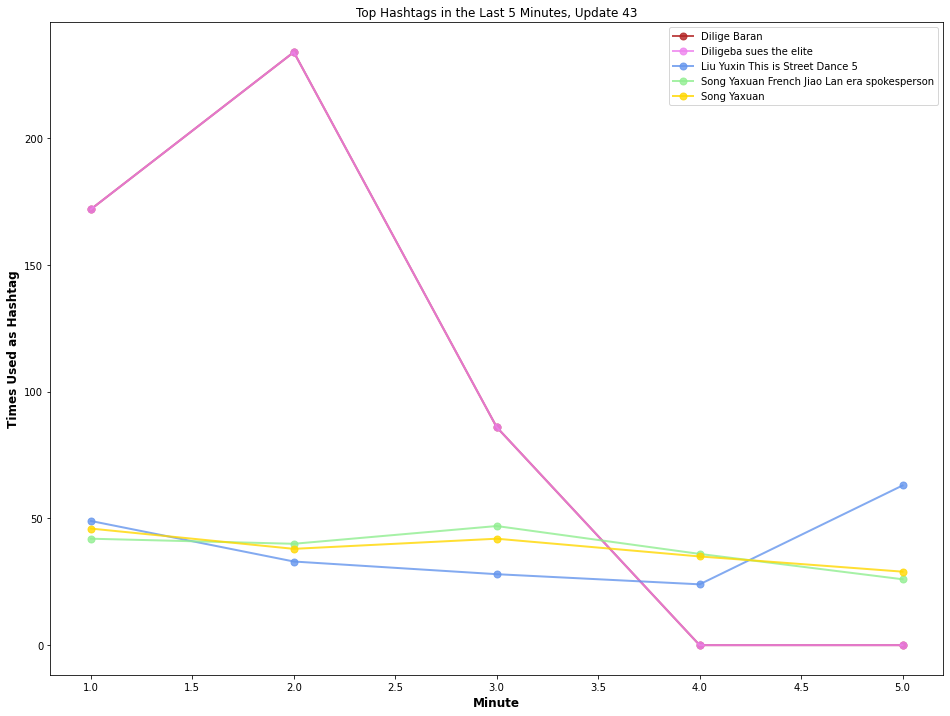

Update 44: [('迪丽热巴安旎', 320), ('迪丽热巴公诉精英', 320), ('刘雨昕这就是街舞5', 202), ('宋亚轩法国娇兰时代代言人', 186), ('宋亚轩', 186), ('肖战', 146), ('微博视界大会', 130), ('雷朋大中华区品牌代言人刘雨昕', 111), ('刘宇0824生日快乐', 101), ('成毅应渊帝君', 100), ('来袭', 76), ('刘雨昕法国希思黎睿秀护发品牌代言人', 76), ('微光荣耀入围作品', 65), ('肖战工作室', 63), ('时代少年团周边中转站', 63), ('与高卿尘同观日暮星河', 63), ('左航', 62), ('刘雨昕', 52), ('沉香如屑', 51), ('青年演员尹浩宇', 50), ('肖战时影', 41), ('微光荣耀入围人物', 39), ('天猫小黑盒', 36), ('不可错过的亚洲帅哥高卿尘', 35), ('巴黎欧莱雅美发代言人杨洋', 34), ('马嘉祺', 33), ('成毅沉香如屑', 32), ('高卿尘into1唯一高音主唱', 30), ('肖战玉骨遥', 29), ('赵露思月升沧海', 29), ('朱志鑫', 26), ('into1尹浩宇队内海外人气断层top1', 26), ('into1尹浩宇混血神颜门面ace', 26), ('into1尹浩宇killing', 26), ('尹浩宇是时尚达人', 26), ('掉系爱豆尹浩宇', 26), ('尹浩宇fashion同款科普', 26), ('每日一善', 25), ('光遇陪玩', 24), ('微光荣耀入围影视音乐', 24), ('任嘉伦', 22), ('赵露思程少商', 22), ('肖战bubly微笑趣泡代言人', 21), ('张泽禹', 21), ('sky光遇黑市', 21), ('时代少年团代言法国娇兰', 20), ('刘宇宁开始推理吧', 20), ('高卿尘盛夏胶片感大片', 19), ('阳光信用', 18), ('左航zh', 18)]

Update 44: [('Dilige Baran', 320), ('Diligeba sues the elite', 320), ('Liu Yuxin This

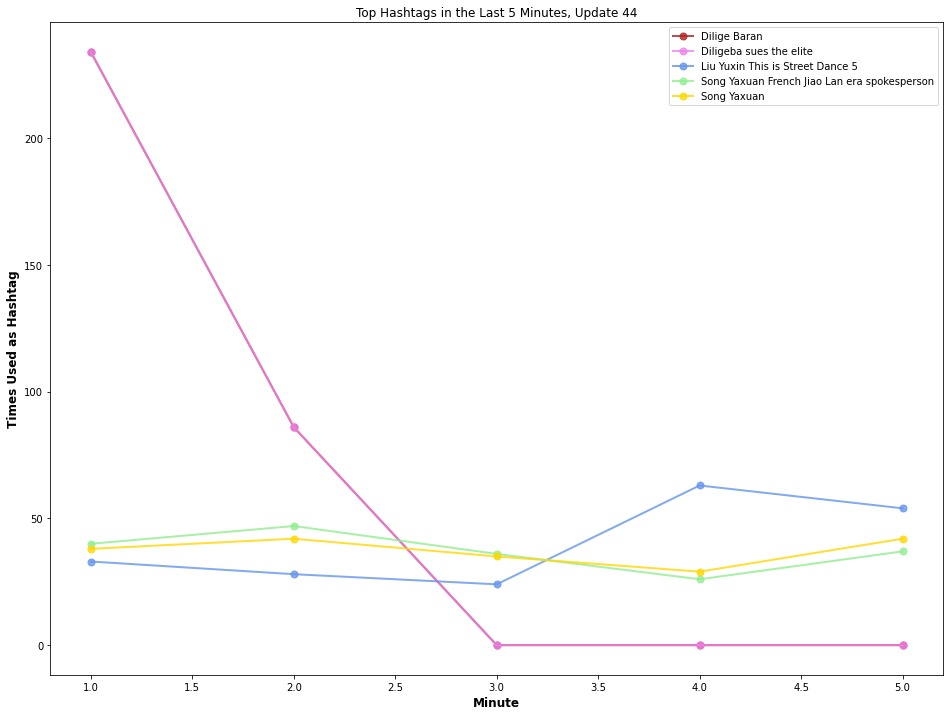

Update 45: [('刘雨昕这就是街舞5', 225), ('宋亚轩', 177), ('宋亚轩法国娇兰时代代言人', 172), ('肖战', 150), ('微博视界大会', 127), ('雷朋大中华区品牌代言人刘雨昕', 117), ('成毅应渊帝君', 99), ('刘雨昕法国希思黎睿秀护发品牌代言人', 93), ('迪丽热巴安旎', 86), ('迪丽热巴公诉精英', 86), ('刘宇0824生日快乐', 77), ('来袭', 70), ('青年演员尹浩宇', 65), ('肖战工作室', 64), ('左航', 62), ('与高卿尘同观日暮星河', 62), ('微光荣耀入围作品', 60), ('时代少年团周边中转站', 60), ('刘雨昕', 53), ('巴黎欧莱雅美发代言人杨洋', 50), ('沉香如屑', 47), ('不可错过的亚洲帅哥高卿尘', 46), ('肖战时影', 43), ('赵露思月升沧海', 41), ('微光荣耀入围人物', 39), ('into1尹浩宇队内海外人气断层top1', 38), ('into1尹浩宇混血神颜门面ace', 38), ('into1尹浩宇killing', 38), ('尹浩宇是时尚达人', 38), ('掉系爱豆尹浩宇', 38), ('尹浩宇fashion同款科普', 38), ('赵露思程少商', 32), ('天猫小黑盒', 30), ('张泽禹', 30), ('肖战玉骨遥', 29), ('肖战bubly微笑趣泡代言人', 29), ('任嘉伦', 28), ('高卿尘盛夏胶片感大片', 27), ('每日一善', 25), ('马嘉祺', 25), ('高卿尘into1唯一高音主唱', 23), ('成毅沉香如屑', 22), ('刘耀文', 22), ('朱志鑫', 21), ('sky光遇黑市', 21), ('时代少年团代言法国娇兰', 20), ('崔然竣', 20), ('阳光信用', 18), ('热烈round1贴片预告', 18), ('左航zh', 18)]

Update 45: [('Liu Yuxin This is Street Dance 5', 225), ('Song Yaxuan', 177), ('Song Yaxuan Fr

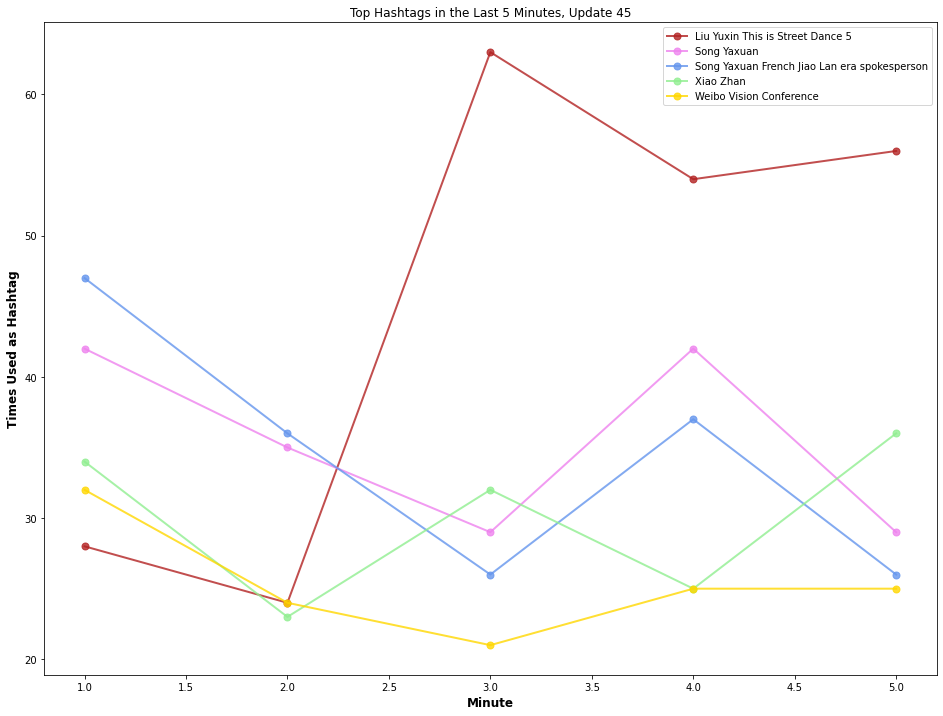

Update 46: [('刘雨昕这就是街舞5', 260), ('宋亚轩', 162), ('宋亚轩法国娇兰时代代言人', 152), ('肖战', 151), ('雷朋大中华区品牌代言人刘雨昕', 144), ('微博视界大会', 117), ('刘雨昕法国希思黎睿秀护发品牌代言人', 98), ('成毅应渊帝君', 88), ('刘宇0824生日快乐', 74), ('巴黎欧莱雅美发代言人杨洋', 74), ('青年演员尹浩宇', 74), ('来袭', 64), ('时代少年团周边中转站', 64), ('肖战工作室', 60), ('左航', 58), ('微光荣耀入围作品', 54), ('赵露思月升沧海', 53), ('与高卿尘同观日暮星河', 52), ('into1尹浩宇队内海外人气断层top1', 52), ('into1尹浩宇混血神颜门面ace', 52), ('into1尹浩宇killing', 52), ('尹浩宇是时尚达人', 52), ('掉系爱豆尹浩宇', 52), ('尹浩宇fashion同款科普', 52), ('刘雨昕', 51), ('沉香如屑', 46), ('赵露思程少商', 42), ('迪丽热巴安旎', 42), ('迪丽热巴公诉精英', 42), ('肖战时影', 40), ('不可错过的亚洲帅哥高卿尘', 39), ('微光荣耀入围人物', 38), ('天猫小黑盒', 28), ('热烈round1贴片预告', 28), ('欧莱雅生姜洗护', 28), ('任嘉伦', 27), ('赵露思星汉灿烂', 27), ('高卿尘盛夏胶片感大片', 27), ('马嘉祺', 24), ('每日一善', 23), ('肖战bubly微笑趣泡代言人', 22), ('刘耀文', 22), ('高卿尘into1唯一高音主唱', 21), ('sky光遇黑市', 21), ('成毅沉香如屑', 18), ('朱志鑫', 18), ('贺峻霖', 18), ('肖战玉骨遥', 17), ('张泽禹', 17), ('光遇陪玩', 16)]

Update 46: [('Liu Yuxin This is Street Dance 5', 260), ('Song Yaxuan', 162), ('Song Yaxuan Fre

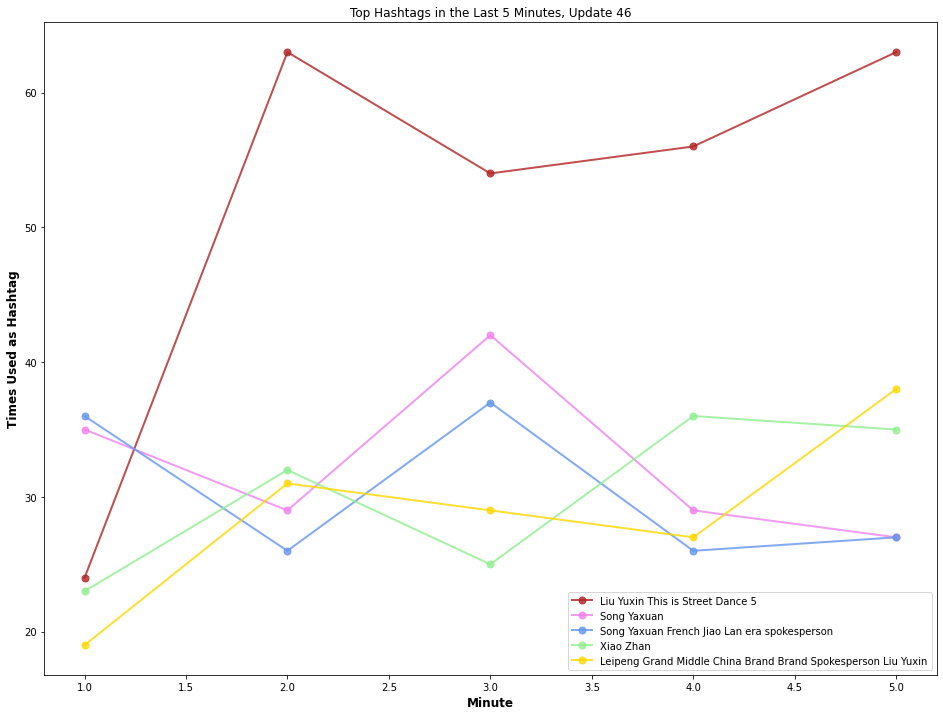

Update 47: [('迪丽热巴安旎', 292), ('迪丽热巴公诉精英', 292), ('刘雨昕这就是街舞5', 276), ('宋亚轩', 167), ('肖战', 163), ('宋亚轩法国娇兰时代代言人', 156), ('雷朋大中华区品牌代言人刘雨昕', 151), ('微博视界大会', 115), ('刘雨昕法国希思黎睿秀护发品牌代言人', 102), ('成毅应渊帝君', 81), ('刘宇0824生日快乐', 77), ('青年演员尹浩宇', 73), ('巴黎欧莱雅美发代言人杨洋', 67), ('微光荣耀入围作品', 60), ('肖战工作室', 60), ('左航', 59), ('时代少年团周边中转站', 59), ('来袭', 58), ('与高卿尘同观日暮星河', 58), ('into1尹浩宇队内海外人气断层top1', 54), ('into1尹浩宇混血神颜门面ace', 54), ('into1尹浩宇killing', 54), ('尹浩宇是时尚达人', 54), ('掉系爱豆尹浩宇', 54), ('尹浩宇fashion同款科普', 54), ('刘雨昕', 48), ('不可错过的亚洲帅哥高卿尘', 41), ('赵露思月升沧海', 41), ('肖战时影', 34), ('赵露思程少商', 33), ('微光荣耀入围人物', 32), ('沉香如屑', 32), ('每日一善', 30), ('任嘉伦', 29), ('热烈round1贴片预告', 28), ('欧莱雅生姜洗护', 28), ('朱志鑫', 24), ('高卿尘盛夏胶片感大片', 24), ('喻言寻找w计划', 24), ('天猫小黑盒', 22), ('刘耀文', 22), ('鞠婧祎', 21), ('高卿尘into1唯一高音主唱', 21), ('sky光遇黑市', 21), ('赵露思星汉灿烂', 18), ('肖战玉骨遥', 17), ('马嘉祺', 17), ('张泽禹', 17), ('王俊凯', 17), ('时代少年团', 16)]

Update 47: [('Dilige Baran', 292), ('Diligeba sues the elite', 292), ('Liu Yuxin This is Street Danc

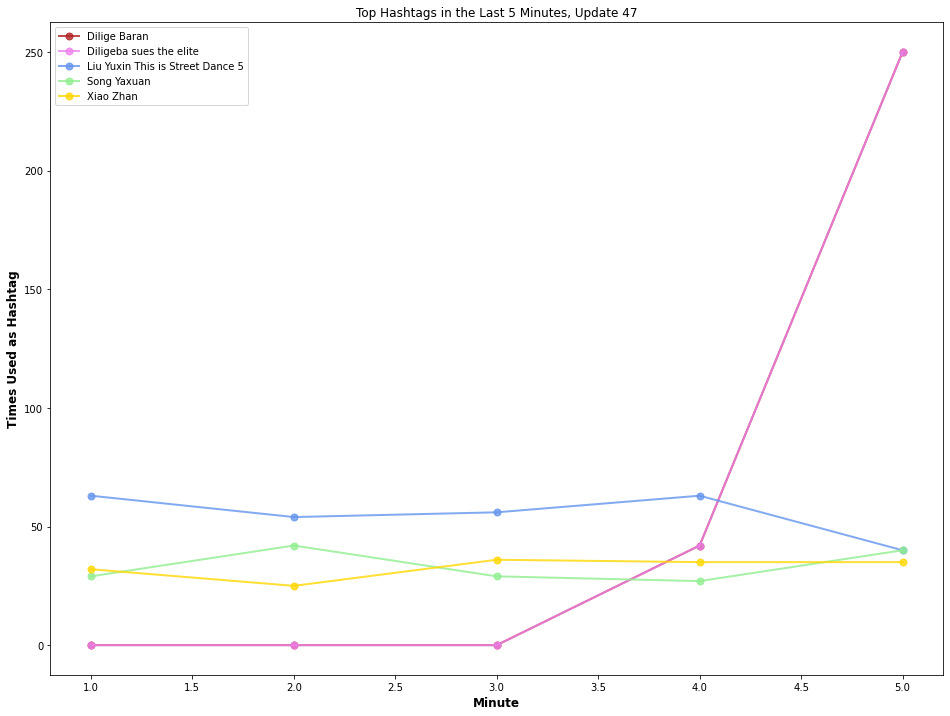

Update 48: [('迪丽热巴公诉精英', 551), ('迪丽热巴安旎', 550), ('刘雨昕这就是街舞5', 253), ('肖战', 181), ('宋亚轩', 162), ('宋亚轩法国娇兰时代代言人', 159), ('雷朋大中华区品牌代言人刘雨昕', 136), ('微博视界大会', 115), ('刘雨昕法国希思黎睿秀护发品牌代言人', 102), ('成毅应渊帝君', 94), ('刘宇0824生日快乐', 80), ('青年演员尹浩宇', 78), ('肖战工作室', 69), ('来袭', 63), ('微光荣耀入围作品', 62), ('巴黎欧莱雅美发代言人杨洋', 62), ('左航', 61), ('into1尹浩宇队内海外人气断层top1', 58), ('into1尹浩宇混血神颜门面ace', 58), ('into1尹浩宇killing', 58), ('尹浩宇是时尚达人', 58), ('掉系爱豆尹浩宇', 58), ('尹浩宇fashion同款科普', 58), ('时代少年团周边中转站', 57), ('与高卿尘同观日暮星河', 49), ('不可错过的亚洲帅哥高卿尘', 40), ('刘雨昕', 39), ('任嘉伦', 37), ('肖战时影', 35), ('沉香如屑', 32), ('赵露思月升沧海', 32), ('喻言寻找w计划', 31), ('热烈round1贴片预告', 29), ('马嘉祺', 26), ('赵露思程少商', 26), ('刘宇宁开始推理吧', 24), ('张泽禹', 24), ('每日一善', 23), ('微光荣耀入围人物', 22), ('刘耀文', 22), ('天猫小黑盒', 21), ('高卿尘盛夏胶片感大片', 21), ('严浩翔', 21), ('欧莱雅生姜洗护', 21), ('力丸仲夏如梦大片', 20), ('成毅沉香如屑', 19), ('光遇陪玩', 19), ('左航zh', 18), ('肖战bubly微笑趣泡代言人', 18), ('赵露思星汉灿烂', 18)]

Update 48: [('Diligeba sues the elite', 551), ('Dilige Baran', 550), ('Liu Yuxin This is Stre

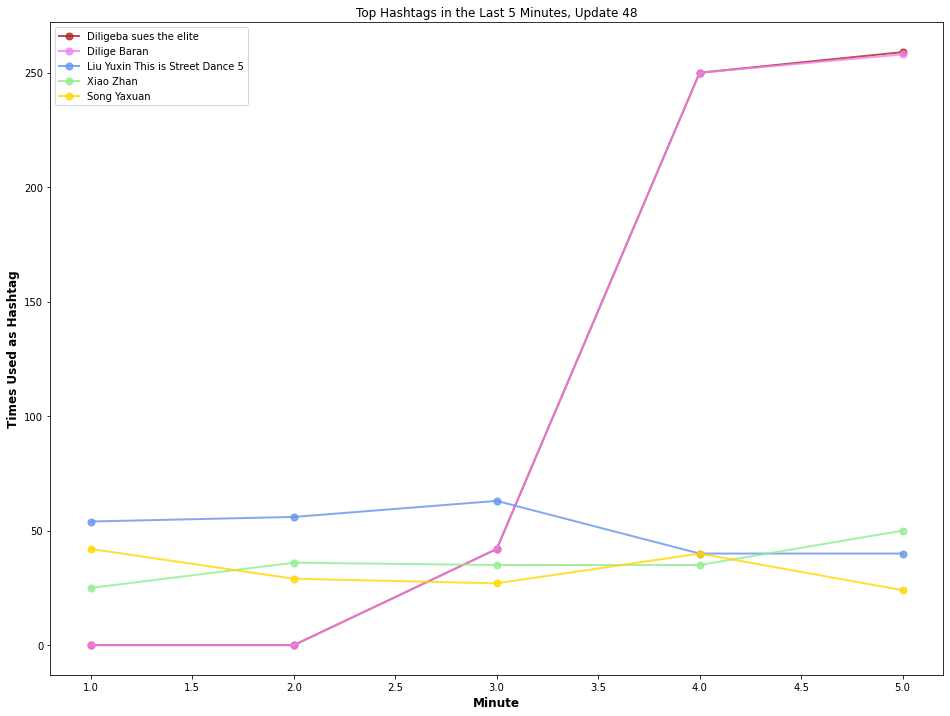

Update 49: [('迪丽热巴公诉精英', 802), ('迪丽热巴安旎', 800), ('刘雨昕这就是街舞5', 227), ('肖战', 190), ('宋亚轩法国娇兰时代代言人', 152), ('宋亚轩', 151), ('雷朋大中华区品牌代言人刘雨昕', 121), ('微博视界大会', 114), ('成毅应渊帝君', 91), ('刘雨昕法国希思黎睿秀护发品牌代言人', 90), ('青年演员尹浩宇', 77), ('肖战工作室', 72), ('刘宇0824生日快乐', 72), ('与高卿尘同观日暮星河', 63), ('来袭', 60), ('微光荣耀入围作品', 59), ('into1尹浩宇队内海外人气断层top1', 59), ('into1尹浩宇混血神颜门面ace', 59), ('into1尹浩宇killing', 59), ('尹浩宇是时尚达人', 59), ('掉系爱豆尹浩宇', 59), ('尹浩宇fashion同款科普', 59), ('时代少年团周边中转站', 56), ('巴黎欧莱雅美发代言人杨洋', 55), ('左航', 49), ('任嘉伦', 42), ('刘雨昕', 40), ('不可错过的亚洲帅哥高卿尘', 40), ('朱志鑫', 35), ('喻言寻找w计划', 31), ('热烈round1贴片预告', 29), ('肖战时影', 28), ('严浩翔', 27), ('成毅沉香如屑', 26), ('马嘉祺', 26), ('微光荣耀入围人物', 24), ('高卿尘into1唯一高音主唱', 24), ('心疼时代少年团', 24), ('赵露思月升沧海', 24), ('bubly微笑趣泡', 24), ('肖战bubly微笑趣泡代言人', 23), ('张泽禹', 22), ('高卿尘盛夏胶片感大片', 21), ('欧莱雅生姜洗护', 21), ('鞠婧祎', 20), ('沉香如屑', 20), ('赵露思程少商', 20), ('力丸仲夏如梦大片', 20), ('时代少年团', 19), ('赵露思星汉灿烂', 18)]

Update 49: [('Diligeba sues the elite', 802), ('Dilige Baran', 800), ('Liu Yuxin 

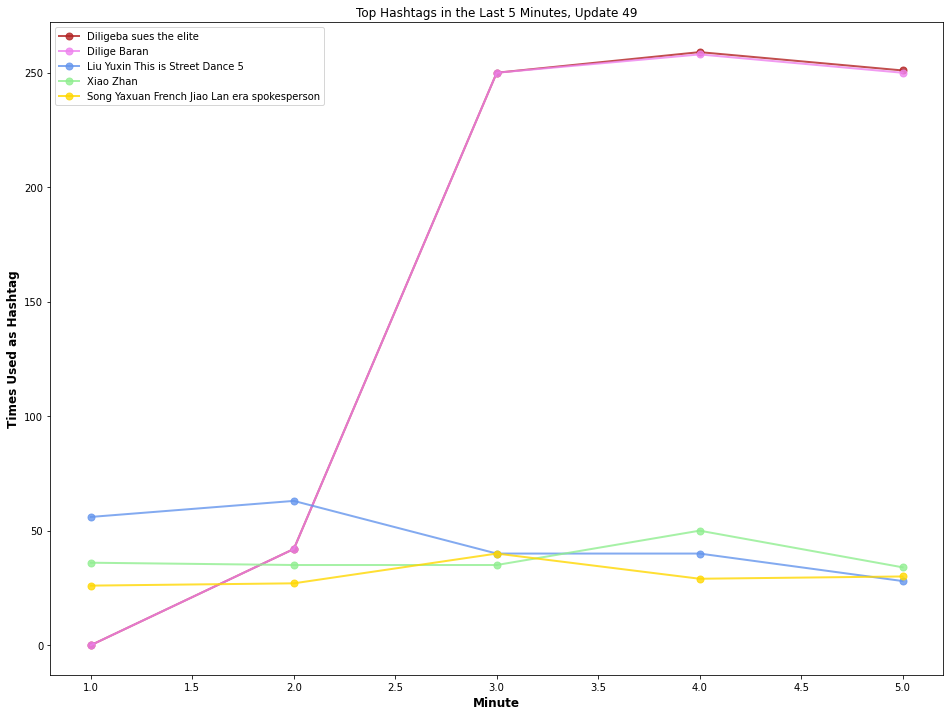

Update 50: [('迪丽热巴公诉精英', 1044), ('迪丽热巴安旎', 1042), ('刘雨昕这就是街舞5', 228), ('肖战', 185), ('宋亚轩', 170), ('宋亚轩法国娇兰时代代言人', 161), ('雷朋大中华区品牌代言人刘雨昕', 126), ('微博视界大会', 113), ('成毅应渊帝君', 91), ('刘雨昕法国希思黎睿秀护发品牌代言人', 83), ('青年演员尹浩宇', 82), ('刘宇0824生日快乐', 78), ('肖战工作室', 71), ('into1尹浩宇队内海外人气断层top1', 65), ('into1尹浩宇混血神颜门面ace', 65), ('into1尹浩宇killing', 65), ('尹浩宇是时尚达人', 65), ('掉系爱豆尹浩宇', 65), ('尹浩宇fashion同款科普', 65), ('微光荣耀入围作品', 64), ('与高卿尘同观日暮星河', 62), ('来袭', 61), ('时代少年团周边中转站', 58), ('左航', 55), ('刘雨昕', 43), ('巴黎欧莱雅美发代言人杨洋', 42), ('不可错过的亚洲帅哥高卿尘', 41), ('任嘉伦', 39), ('朱志鑫', 35), ('成毅沉香如屑', 34), ('严浩翔', 34), ('时代少年团', 32), ('热烈round1贴片预告', 28), ('时代少年团代言法国娇兰', 25), ('高卿尘into1唯一高音主唱', 24), ('bubly微笑趣泡', 24), ('刘宇宁开始推理吧', 23), ('心疼时代少年团', 23), ('天猫小黑盒', 22), ('沉香如屑', 22), ('喻言寻找w计划', 22), ('鞠婧祎', 20), ('高卿尘盛夏胶片感大片', 20), ('力丸仲夏如梦大片', 20), ('光遇陪玩', 19), ('马嘉祺', 18), ('肖战时影', 17), ('成毅', 17), ('微光荣耀入围人物', 16), ('2022', 16)]

Update 50: [('Diligeba sues the elite', 1044), ('Dilige Baran', 1042), ('Liu Yuxin This i

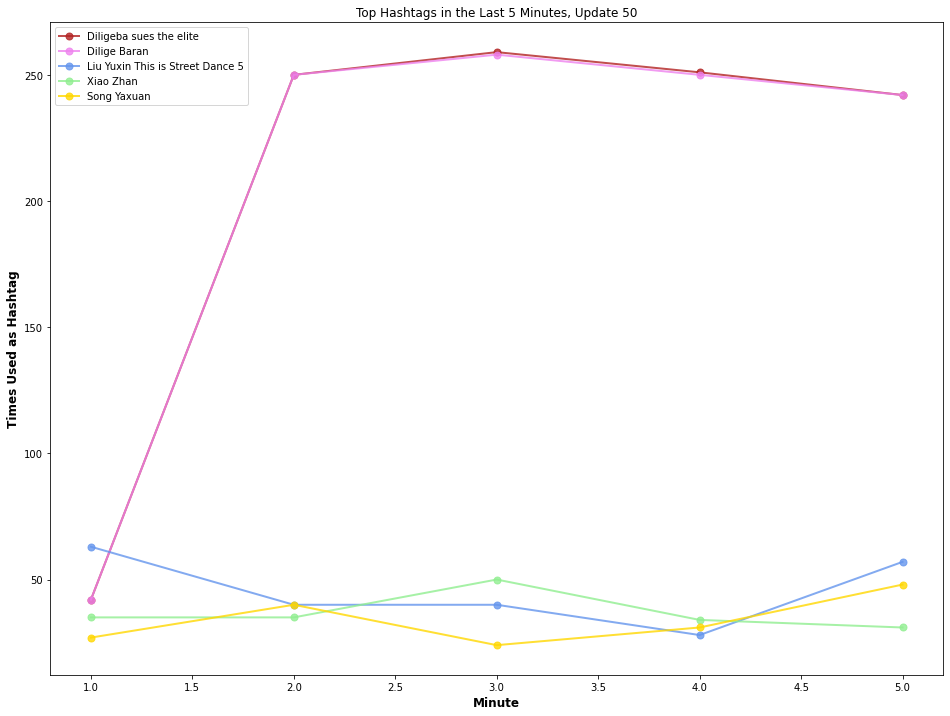

Update 51: [('迪丽热巴公诉精英', 1252), ('迪丽热巴安旎', 1250), ('刘雨昕这就是街舞5', 228), ('肖战', 182), ('宋亚轩', 170), ('宋亚轩法国娇兰时代代言人', 164), ('雷朋大中华区品牌代言人刘雨昕', 118), ('微博视界大会', 116), ('成毅应渊帝君', 99), ('刘雨昕法国希思黎睿秀护发品牌代言人', 93), ('刘宇0824生日快乐', 76), ('青年演员尹浩宇', 73), ('微光荣耀入围作品', 70), ('肖战工作室', 68), ('与高卿尘同观日暮星河', 65), ('来袭', 62), ('into1尹浩宇队内海外人气断层top1', 62), ('into1尹浩宇混血神颜门面ace', 62), ('into1尹浩宇killing', 62), ('尹浩宇是时尚达人', 62), ('掉系爱豆尹浩宇', 62), ('尹浩宇fashion同款科普', 62), ('左航', 61), ('时代少年团周边中转站', 52), ('严浩翔', 43), ('任嘉伦', 42), ('不可错过的亚洲帅哥高卿尘', 41), ('刘雨昕', 40), ('成毅沉香如屑', 36), ('心疼时代少年团', 35), ('时代少年团', 32), ('巴黎欧莱雅美发代言人杨洋', 30), ('时代少年团代言法国娇兰', 25), ('热烈round1贴片预告', 25), ('高卿尘into1唯一高音主唱', 25), ('朱志鑫', 24), ('bubly微笑趣泡', 24), ('左航zh', 22), ('微光荣耀入围影视音乐', 22), ('张泽禹', 20), ('高卿尘盛夏胶片感大片', 20), ('杨洋0909生日快乐', 20), ('光遇陪玩', 19), ('刘耀文', 19), ('成毅', 17), ('天猫小黑盒', 16), ('刘宇宁开始推理吧', 16), ('热爱', 16), ('沉香如屑', 15), ('肖战bubly微笑趣泡代言人', 15)]

Update 51: [('Diligeba sues the elite', 1252), ('Dilige Baran', 1250), ('Liu Yux

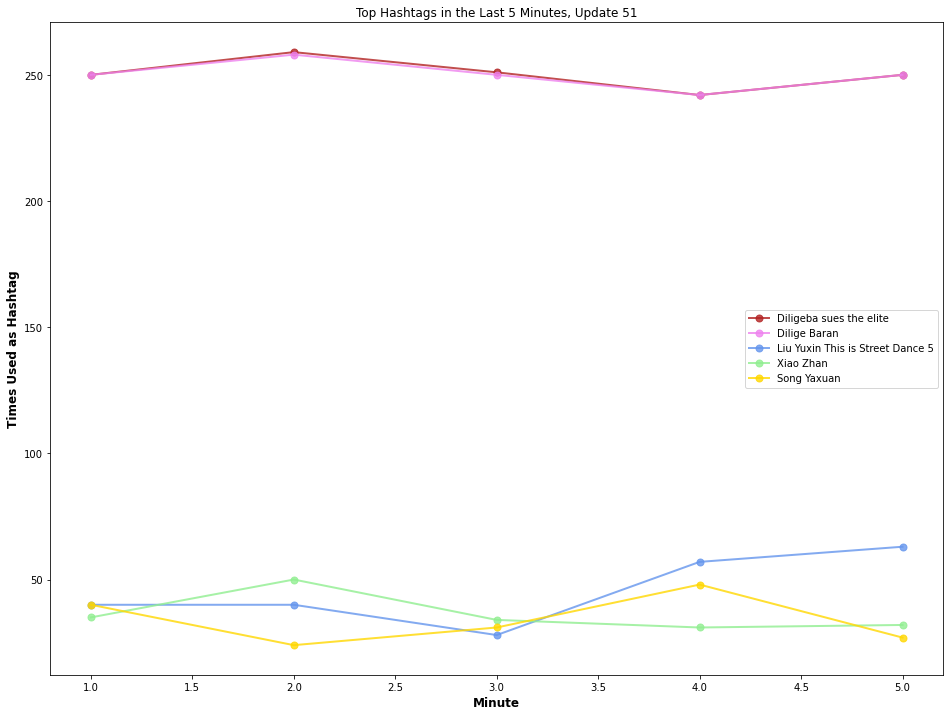

Update 52: [('迪丽热巴公诉精英', 1160), ('迪丽热巴安旎', 1158), ('刘雨昕这就是街舞5', 231), ('肖战', 180), ('宋亚轩', 155), ('宋亚轩法国娇兰时代代言人', 140), ('微博视界大会', 118), ('雷朋大中华区品牌代言人刘雨昕', 114), ('刘雨昕法国希思黎睿秀护发品牌代言人', 104), ('成毅应渊帝君', 102), ('刘宇0824生日快乐', 73), ('肖战工作室', 72), ('青年演员尹浩宇', 67), ('微光荣耀入围作品', 65), ('来袭', 63), ('左航', 62), ('与高卿尘同观日暮星河', 61), ('into1尹浩宇队内海外人气断层top1', 51), ('into1尹浩宇混血神颜门面ace', 51), ('into1尹浩宇killing', 51), ('尹浩宇是时尚达人', 51), ('掉系爱豆尹浩宇', 51), ('尹浩宇fashion同款科普', 51), ('时代少年团周边中转站', 49), ('热烈round1贴片预告', 42), ('任嘉伦', 39), ('刘雨昕', 39), ('严浩翔', 37), ('成毅沉香如屑', 36), ('心疼时代少年团', 35), ('不可错过的亚洲帅哥高卿尘', 35), ('巴黎欧莱雅美发代言人杨洋', 30), ('微光荣耀入围影视音乐', 29), ('左航zh', 28), ('刘宇宁开始推理吧', 26), ('高卿尘into1唯一高音主唱', 25), ('刘耀文', 25), ('朱志鑫', 24), ('光遇陪玩', 23), ('时代少年团', 23), ('沉香如屑', 22), ('2022', 22), ('微光荣耀五大类别推荐重磅开启', 22), ('张泽禹', 20), ('杨洋0909生日快乐', 20), ('马嘉祺', 18), ('微光荣耀推荐', 18), ('时代少年团代言法国娇兰', 17), ('成毅', 17), ('天猫小黑盒', 16)]

Update 52: [('Diligeba sues the elite', 1160), ('Dilige Baran', 1158), ('Liu Yuxin Thi

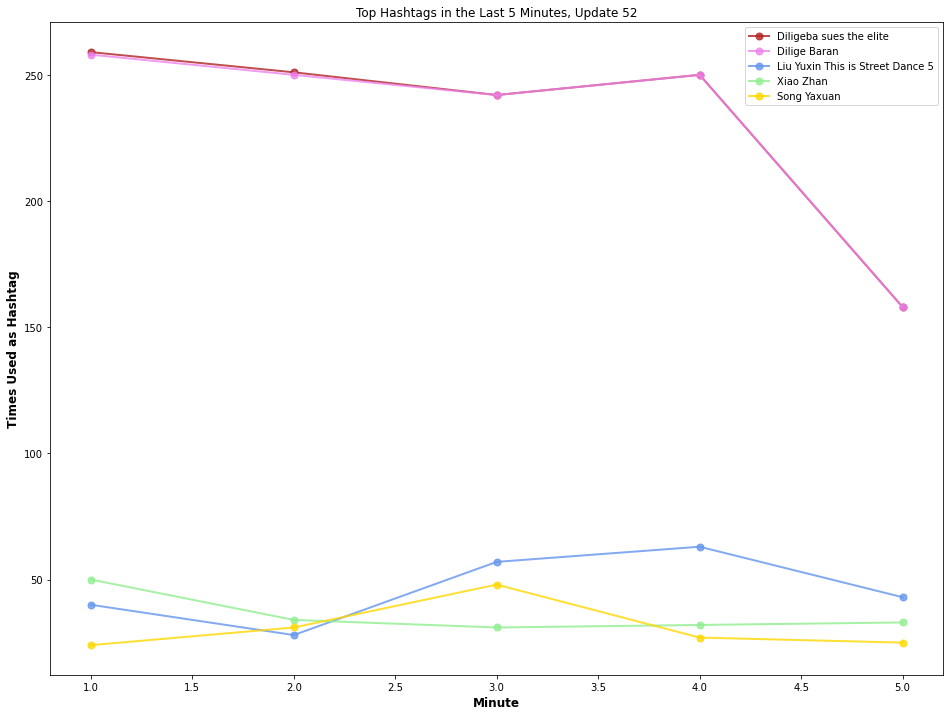

Update 53: [('迪丽热巴公诉精英', 901), ('迪丽热巴安旎', 900), ('刘雨昕这就是街舞5', 242), ('宋亚轩', 169), ('肖战', 162), ('宋亚轩法国娇兰时代代言人', 138), ('雷朋大中华区品牌代言人刘雨昕', 127), ('微博视界大会', 124), ('刘雨昕法国希思黎睿秀护发品牌代言人', 101), ('成毅应渊帝君', 95), ('刘宇0824生日快乐', 74), ('肖战工作室', 67), ('微光荣耀入围作品', 65), ('左航', 62), ('青年演员尹浩宇', 61), ('来袭', 60), ('与高卿尘同观日暮星河', 53), ('时代少年团周边中转站', 52), ('刘雨昕', 47), ('into1尹浩宇队内海外人气断层top1', 46), ('into1尹浩宇混血神颜门面ace', 46), ('into1尹浩宇killing', 46), ('尹浩宇是时尚达人', 46), ('掉系爱豆尹浩宇', 46), ('尹浩宇fashion同款科普', 46), ('热烈round1贴片预告', 43), ('任嘉伦', 39), ('不可错过的亚洲帅哥高卿尘', 36), ('严浩翔', 35), ('刘耀文', 34), ('朱志鑫', 33), ('巴黎欧莱雅美发代言人杨洋', 31), ('左航zh', 30), ('微光荣耀入围影视音乐', 30), ('2022', 28), ('光遇陪玩', 27), ('刘宇宁开始推理吧', 26), ('心疼时代少年团', 26), ('高卿尘into1唯一高音主唱', 25), ('微光荣耀推荐', 25), ('成毅沉香如屑', 23), ('时代少年团', 23), ('微光荣耀入围人物', 22), ('微光荣耀五大类别推荐重磅开启', 22), ('杨洋0909生日快乐', 20), ('马嘉祺', 19), ('时代少年团代言法国娇兰', 17), ('高卿尘盛夏胶片感大片', 17), ('成毅', 17), ('沉香如屑', 16)]

Update 53: [('Diligeba sues the elite', 901), ('Dilige Baran', 900), ('Liu Yuxi

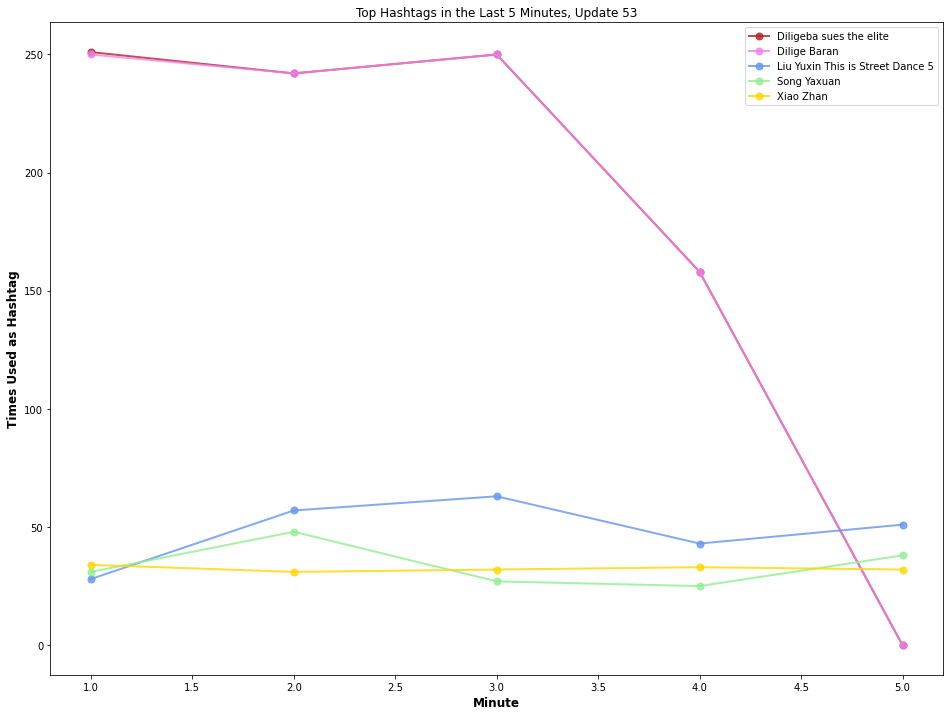

Update 54: [('迪丽热巴安旎', 650), ('迪丽热巴公诉精英', 650), ('刘雨昕这就是街舞5', 257), ('宋亚轩', 165), ('肖战', 158), ('宋亚轩法国娇兰时代代言人', 145), ('雷朋大中华区品牌代言人刘雨昕', 137), ('微博视界大会', 118), ('刘雨昕法国希思黎睿秀护发品牌代言人', 108), ('成毅应渊帝君', 98), ('刘宇0824生日快乐', 74), ('左航', 71), ('肖战工作室', 63), ('微光荣耀入围作品', 61), ('来袭', 60), ('热烈round1贴片预告', 58), ('时代少年团周边中转站', 57), ('青年演员尹浩宇', 48), ('任嘉伦', 41), ('刘雨昕', 41), ('左航zh', 40), ('刘耀文', 40), ('光遇陪玩', 38), ('与高卿尘同观日暮星河', 38), ('巴黎欧莱雅美发代言人杨洋', 36), ('into1尹浩宇队内海外人气断层top1', 36), ('into1尹浩宇混血神颜门面ace', 36), ('into1尹浩宇killing', 36), ('尹浩宇是时尚达人', 36), ('掉系爱豆尹浩宇', 36), ('尹浩宇fashion同款科普', 36), ('刘宇宁开始推理吧', 34), ('不可错过的亚洲帅哥高卿尘', 30), ('严浩翔', 30), ('成毅沉香如屑', 27), ('微光荣耀推荐', 25), ('沉香如屑', 23), ('微光荣耀入围影视音乐', 23), ('阳光信用', 21), ('时代少年团', 20), ('2022', 20), ('杨洋0909生日快乐', 20), ('马嘉祺', 19), ('心疼时代少年团', 18), ('高卿尘盛夏胶片感大片', 17), ('成毅', 17), ('鞠婧祎', 15), ('微光荣耀入围人物', 15), ('朱志鑫', 15), ('喻言寻找w计划', 15)]

Update 54: [('Dilige Baran', 650), ('Diligeba sues the elite', 650), ('Liu Yuxin This is Street Dance 5'

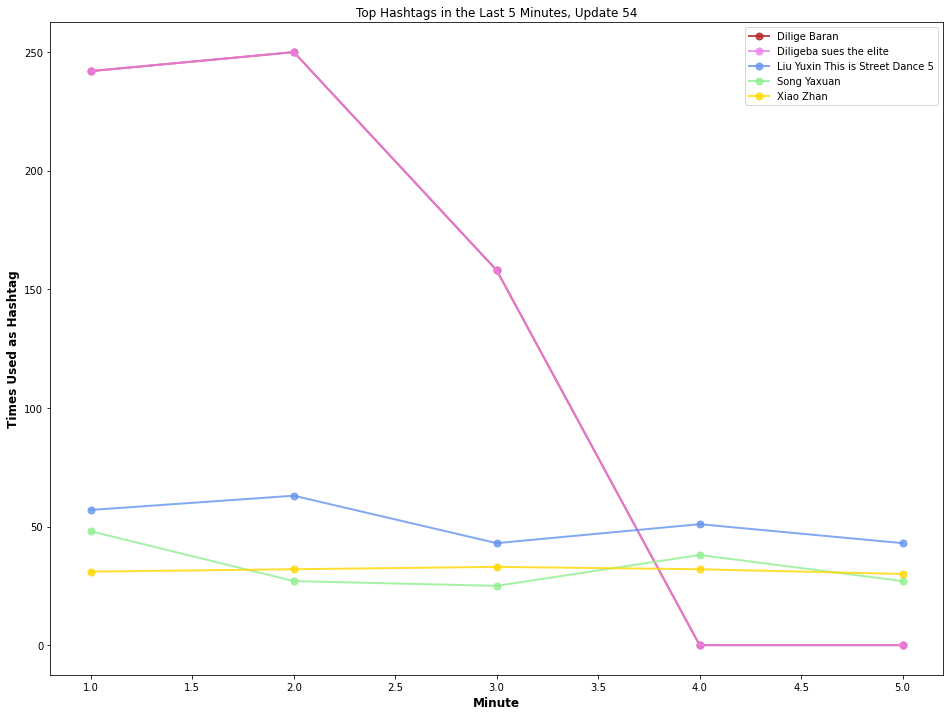

Update 55: [('迪丽热巴安旎', 408), ('迪丽热巴公诉精英', 408), ('刘雨昕这就是街舞5', 229), ('肖战', 145), ('宋亚轩', 145), ('宋亚轩法国娇兰时代代言人', 139), ('雷朋大中华区品牌代言人刘雨昕', 122), ('微博视界大会', 116), ('成毅应渊帝君', 100), ('刘雨昕法国希思黎睿秀护发品牌代言人', 99), ('刘宇0824生日快乐', 78), ('热烈round1贴片预告', 69), ('左航', 65), ('肖战工作室', 60), ('来袭', 55), ('微光荣耀入围作品', 55), ('时代少年团周边中转站', 53), ('刘雨昕', 41), ('光遇陪玩', 39), ('任嘉伦', 38), ('巴黎欧莱雅美发代言人杨洋', 37), ('左航zh', 37), ('刘耀文', 37), ('刘宇宁开始推理吧', 33), ('与高卿尘同观日暮星河', 31), ('微光荣耀入围影视音乐', 29), ('成毅沉香如屑', 28), ('青年演员尹浩宇', 28), ('微光荣耀推荐', 28), ('严浩翔', 23), ('喻言寻找w计划', 23), ('王一博电影热烈', 23), ('鞠婧祎', 22), ('微光荣耀入围人物', 22), ('阳光信用', 21), ('每日一善', 20), ('2022', 20), ('马嘉祺', 19), ('欧莱雅生姜洗护', 19), ('心疼时代少年团', 18), ('不可错过的亚洲帅哥高卿尘', 18), ('into1尹浩宇队内海外人气断层top1', 18), ('into1尹浩宇混血神颜门面ace', 18), ('into1尹浩宇killing', 18), ('尹浩宇是时尚达人', 18), ('掉系爱豆尹浩宇', 18), ('尹浩宇fashion同款科普', 18), ('into1天上不会掉馅饼甩饼舞', 17), ('朱志鑫', 15), ('沉香如屑', 14)]

Update 55: [('Dilige Baran', 408), ('Diligeba sues the elite', 408), ('Liu Yuxin This is Street Da

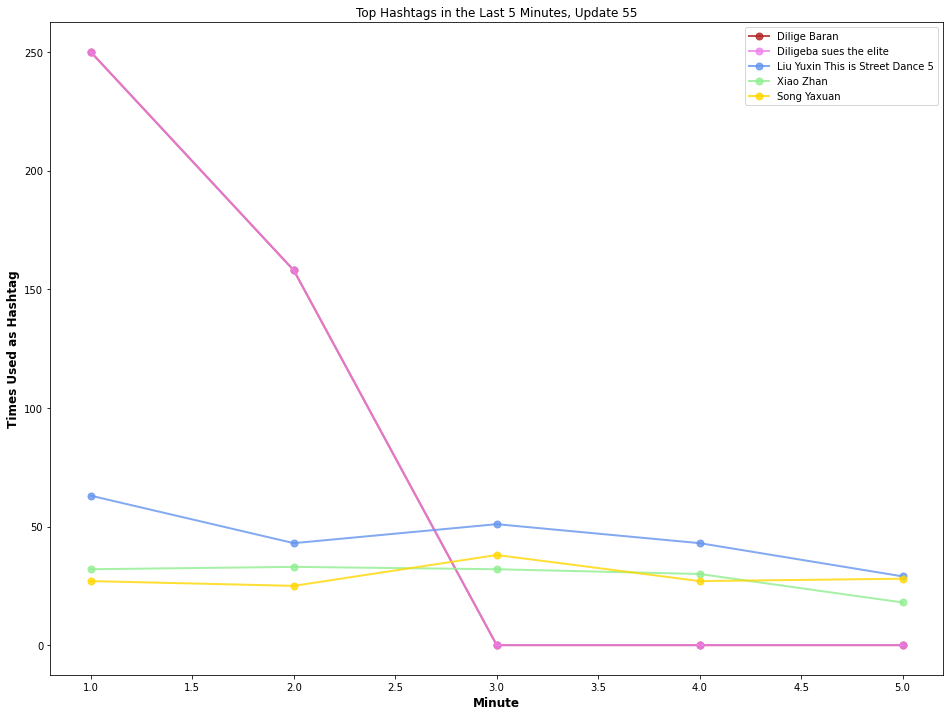

KeyboardInterrupt: 

In [7]:
# Put counters from every minute into queue and every minute the oldest counter will be taken out
# Display the sum of all counters every 5 minutes (use most_common)

chnQueue = deque()
engQueue = deque()

chnQueueSum = Counter()
engQueueSum = Counter() 

for i in range(5):
    chnCounter = Counter(convert_counter_to_dict(pull_count().most_common(50)))
    chnQueue.append(chnCounter)
    chnQueueSum += chnCounter
    
    engCounter = Counter()
    url = 'http://35.243.155.154:8080/api/translate'
    for word in chnCounter:
        myObj = {"q": word,"source":"zh-Hans","target":"en"}
        r = requests.post(url, json=myObj)
        try:
            engWord = json.loads(r.text)['translatedText']
            engCounter += Counter({engWord: chnCounter[word]})
        except KeyError:
            engCounter += Counter({word: chnCounter[word]})
    engQueue.append(engCounter)
    engQueueSum += engCounter

print('Initial: ' + str(chnQueueSum.most_common(50)) + '\n')
print('Initial: ' + str(engQueueSum.most_common(50)))

# Line graph:
# Note: yVals is formatted as [(x, [a, b, c, d, e]), ...] where x is a word, and [a, b, c, d, e] are the frequencies each minute
yVals = []
for i in range(5):
    y = []
    targetWord = engQueueSum.most_common(5)[i][0]
    for c in engQueue:
        if targetWord in c:
            y.append(c[targetWord])
        else:
            y.append(0)
    yVals.append((targetWord, y))
    
# Data
df=pd.DataFrame({'x_values': [1, 2, 3, 4, 5], 'y1_values': yVals[0][1],  'y2_values': yVals[1][1], 'y3_values': yVals[2][1], 'y4_values': yVals[3][1], 'y5_values': yVals[4][1]})

# graph size
plt.rcParams["figure.figsize"] = (16,12)

# multiple line plots
plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='firebrick', markersize=7, color='firebrick', linewidth=2, alpha=0.8, label=yVals[0][0])
plt.plot( 'x_values', 'y2_values', data=df, marker='o', markerfacecolor='violet', markersize=7, color='violet', linewidth=2, alpha=0.8, label=yVals[1][0])
plt.plot( 'x_values', 'y3_values', data=df, marker='o', markerfacecolor='cornflowerblue', markersize=7, color='cornflowerblue', linewidth=2, alpha=0.8, label=yVals[2][0])
plt.plot( 'x_values', 'y4_values', data=df, marker='o', markerfacecolor='lightgreen', markersize=7, color='lightgreen', linewidth=2, alpha=0.8, label=yVals[3][0])
plt.plot( 'x_values', 'y5_values', data=df, marker='o', markerfacecolor='gold', markersize=7, color='gold', linewidth=2, alpha=0.8, label=yVals[4][0])

# show title
plt.title('Top Hashtags in the Last 5 Minutes, Initial')

# show legend
plt.legend()

# show x label
plt.xlabel('Minute', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')


# show y label
plt.ylabel('Times Used as Hashtag', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')

# show graph
plt.show()

# Updating the word count
# Can be replaced with any loop condition

timesUpdated = 0
while True:
    # Updating Chinese queue
    chnQueueSum -= chnQueue[0]
    chnCounter = Counter(convert_counter_to_dict(pull_count().most_common(50)))
    chnQueueSum += chnCounter
    chnQueue.popleft()
    chnQueue.append(chnCounter)
    
    # Updating English queue
    engQueueSum -= engQueue[0]
    engCounter = Counter()
    url = 'http://35.243.155.154:8080/api/translate'
    for word in chnCounter:
        myObj = {"q": word,"source":"zh-Hans","target":"en"}
        r = requests.post(url, json=myObj)
        try:
            engWord = json.loads(r.text)['translatedText']
            engCounter += Counter({engWord: chnCounter[word]})
        except KeyError:
            engCounter += Counter({word: chnCounter[word]})
    engQueueSum += engCounter
    engQueue.popleft()
    engQueue.append(engCounter)
    
    timesUpdated += 1
    print('Update ' + str(timesUpdated) + ': ' + str(chnQueueSum.most_common(50)) + '\n')
    print('Update ' + str(timesUpdated) + ': ' + str(engQueueSum.most_common(50)))
    
    # Line graph:
    # Note: yVals is formatted as [(x, [a, b, c, d, e]), ...] where x is a word, and [a, b, c, d, e] are the frequencies each minute
    yVals = []
    for i in range(5):
        y = []
        targetWord = engQueueSum.most_common(5)[i][0]
        for c in engQueue:
            if targetWord in c:
                y.append(c[targetWord])
            else:
                y.append(0)
        yVals.append((targetWord, y))

    # Data
    df=pd.DataFrame({'x_values': [1, 2, 3, 4, 5], 'y1_values': yVals[0][1],  'y2_values': yVals[1][1], 'y3_values': yVals[2][1], 'y4_values': yVals[3][1], 'y5_values': yVals[4][1]})

    # graph size
    plt.rcParams["figure.figsize"] = (16,12)

    # multiple line plots
    plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='firebrick', markersize=7, color='firebrick', linewidth=2, alpha=0.8, label=yVals[0][0])
    plt.plot( 'x_values', 'y2_values', data=df, marker='o', markerfacecolor='violet', markersize=7, color='violet', linewidth=2, alpha=0.8, label=yVals[1][0])
    plt.plot( 'x_values', 'y3_values', data=df, marker='o', markerfacecolor='cornflowerblue', markersize=7, color='cornflowerblue', linewidth=2, alpha=0.8, label=yVals[2][0])
    plt.plot( 'x_values', 'y4_values', data=df, marker='o', markerfacecolor='lightgreen', markersize=7, color='lightgreen', linewidth=2, alpha=0.8, label=yVals[3][0])
    plt.plot( 'x_values', 'y5_values', data=df, marker='o', markerfacecolor='gold', markersize=7, color='gold', linewidth=2, alpha=0.8, label=yVals[4][0])

    # show title
    plt.title('Top Hashtags in the Last 5 Minutes, Update ' + str(timesUpdated))

    # show legend
    plt.legend()

    # show x label
    plt.xlabel('Minute', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')


    # show y label
    plt.ylabel('Times Used as Hashtag', fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')

    # show graph
    plt.show()
